<a href="https://colab.research.google.com/github/Hassan48khan/SavorNet-Adaptive-Attention-Fusion-for-Ethiopian-Cuisine-Classification/blob/main/Full%20pipline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to  ZIP file in Drive
zip_path = '/content/drive/MyDrive/Ethiopianfoodclassification.zip'

# Directory to extract the dataset
extract_path = '/content/Ethiopianfoodclassification'

# Create the directory (if it doesn't exist)

os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully!")

Dataset unzipped successfully!


In [ ]:
!ls '/content/Ethiopianfoodclassification/enhancedataethfood'

README..txt  test  train  valid


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# No augmentation needed (already done in Roboflow)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/train',
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
'/content/Ethiopianfoodclassification/enhancedataethfood/valid',
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical'
)


Found 2319 images belonging to 11 classes.
Found 165 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create test generator (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/test',
    target_size=(512, 512),       # Match RoboFlow's size
    batch_size=32,
    class_mode='categorical',
    shuffle=False                 # Critical for correct labels
)

Found 154 images belonging to 11 classes.


Found 2319 images belonging to 11 classes.
Found 165 images belonging to 11 classes.
Found 154 images belonging to 11 classes.
Class Names: ['beyaynetu', 'chechebsa', 'doro_wat', 'firfir', 'genfo', 'kikil', 'kitfo', 'shekla_tibs', 'shiro_wat', 'tihlo', 'tire_siga']


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2168 - loss: 79.7087 - precision: 0.1790 - recall: 0.3581

73/73 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.2183 - loss: 79.5630 - precision: 0.1800 - recall: 0.3600 - val_accuracy: 0.6242 - val_loss: 49.1580 - val_precision: 0.4061 - val_recall: 0.8121 - learning_rate: 3.0000e-04
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6313 - loss: 42.0945 - precision: 0.3918 - recall: 0.7835

73/73 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6319 - loss: 42.0166 - precision: 0.3920 - recall: 0.7839 - val_accuracy: 0.7636 - val_loss: 27.0209 - val_precision: 0.4333 - val_recall: 0.8667 - learning_rate: 3.0000e-04
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7489 - loss: 23.1387 - precision: 0.4486 - recall: 0.8973

73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7493 - loss: 23.1021 - precision: 0.4487 - recall: 0.8974 - val_accuracy: 0.7879 - val_loss: 16.3284 - val_precision: 0.4424 - val_recall: 0.8848 - learning_rate: 3.0000e-04
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8356 - loss: 14.0334 - precision: 0.4638 - recall: 0.9276

73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8357 - loss: 14.0119 - precision: 0.4639 - recall: 0.9278 - val_accuracy: 0.8061 - val_loss: 10.2472 - val_precision: 0.4455 - val_recall: 0.8909 - learning_rate: 3.0000e-04
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8776 - loss: 8.3391 - precision: 0.4808 - recall: 0.9615 - val_accuracy: 0.8182 - val_loss: 6.3305 - val_precision: 0.4394 - val_recall: 0.8788 - learning_rate: 3.0000e-04
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8906 - loss: 5.0719 - precision: 0.4803 - recall: 0.9606 - val_accuracy: 0.7515 - val_loss: 4.2084 - val_precision: 0.4424 - val_recall: 0.8848 - learning_rate: 3.0000e-04
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9040 - loss: 3.2794 - precision: 0.4840 - recall: 0.9680 - val_accuracy: 0.7515 - val_loss: 2.9386 - val_precision: 0.4394 - val_recall: 0.8788 - learning_rate: 3.0000e-04
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 

73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9169 - loss: 2.2406 - precision: 0.4866 - recall: 0.9731 - val_accuracy: 0.8182 - val_loss: 2.1316 - val_precision: 0.4515 - val_recall: 0.9030 - learning_rate: 3.0000e-04
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9189 - loss: 1.6906 - precision: 0.4858 - recall: 0.9716 - val_accuracy: 0.7939 - val_loss: 1.7324 - val_precision: 0.4485 - val_recall: 0.8970 - learning_rate: 3.0000e-04
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9273 - loss: 1.3193 - precision: 0.4900 - recall: 0.9801 - val_accuracy: 0.8182 - val_loss: 1.4729 - val_precision: 0.4485 - val_recall: 0.8970 - learning_rate: 3.0000e-04
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9202 - loss: 1.1399 - precision: 0.4865 - recall: 0.9729

73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9202 - loss: 1.1400 - precision: 0.4865 - recall: 0.9729 - val_accuracy: 0.8485 - val_loss: 1.3771 - val_precision: 0.4545 - val_recall: 0.9091 - learning_rate: 3.0000e-04
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9297 - loss: 1.0282 - precision: 0.4889 - recall: 0.9778

73/73 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9297 - loss: 1.0282 - precision: 0.4889 - recall: 0.9778 - val_accuracy: 0.8667 - val_loss: 1.1912 - val_precision: 0.4606 - val_recall: 0.9212 - learning_rate: 3.0000e-04
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9270 - loss: 1.0068 - precision: 0.4887 - recall: 0.9775 - val_accuracy: 0.7758 - val_loss: 1.3740 - val_precision: 0.4515 - val_recall: 0.9030 - learning_rate: 3.0000e-04
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9310 - loss: 0.9386 - precision: 0.4879 - recall: 0.9758 - val_accuracy: 0.8242 - val_loss: 1.2231 - val_precision: 0.4455 - val_recall: 0.8909 - learning_rate: 3.0000e-04
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9288 - loss: 0.9039 - precision: 0.4900 - recall: 0.9799

73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9287 - loss: 0.9041 - precision: 0.4899 - recall: 0.9799 - val_accuracy: 0.8424 - val_loss: 1.1702 - val_precision: 0.4636 - val_recall: 0.9273 - learning_rate: 3.0000e-04
Epoch 16/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9230 - loss: 0.8929 - precision: 0.4897 - recall: 0.9794

73/73 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9229 - loss: 0.8930 - precision: 0.4897 - recall: 0.9794 - val_accuracy: 0.8364 - val_loss: 1.1368 - val_precision: 0.4697 - val_recall: 0.9394 - learning_rate: 3.0000e-04
Epoch 17/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9221 - loss: 0.8654 - precision: 0.4889 - recall: 0.9778 - val_accuracy: 0.8121 - val_loss: 1.2111 - val_precision: 0.4515 - val_recall: 0.9030 - learning_rate: 3.0000e-04
Epoch 18/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9146 - loss: 0.8585 - precision: 0.4893 - recall: 0.9786 - val_accuracy: 0.8424 - val_loss: 1.1201 - val_precision: 0.4455 - val_recall: 0.8909 - learning_rate: 3.0000e-04
Epoch 19/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9325 - loss: 0.8360 - precision: 0.4891 - recall: 0.9783 - val_accuracy: 0.8121 - val_loss: 1.2365 - val_precision: 0.4424 - val_recall: 0.8848 - learning_rate: 3.0000e-04
Epoch 20/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accura

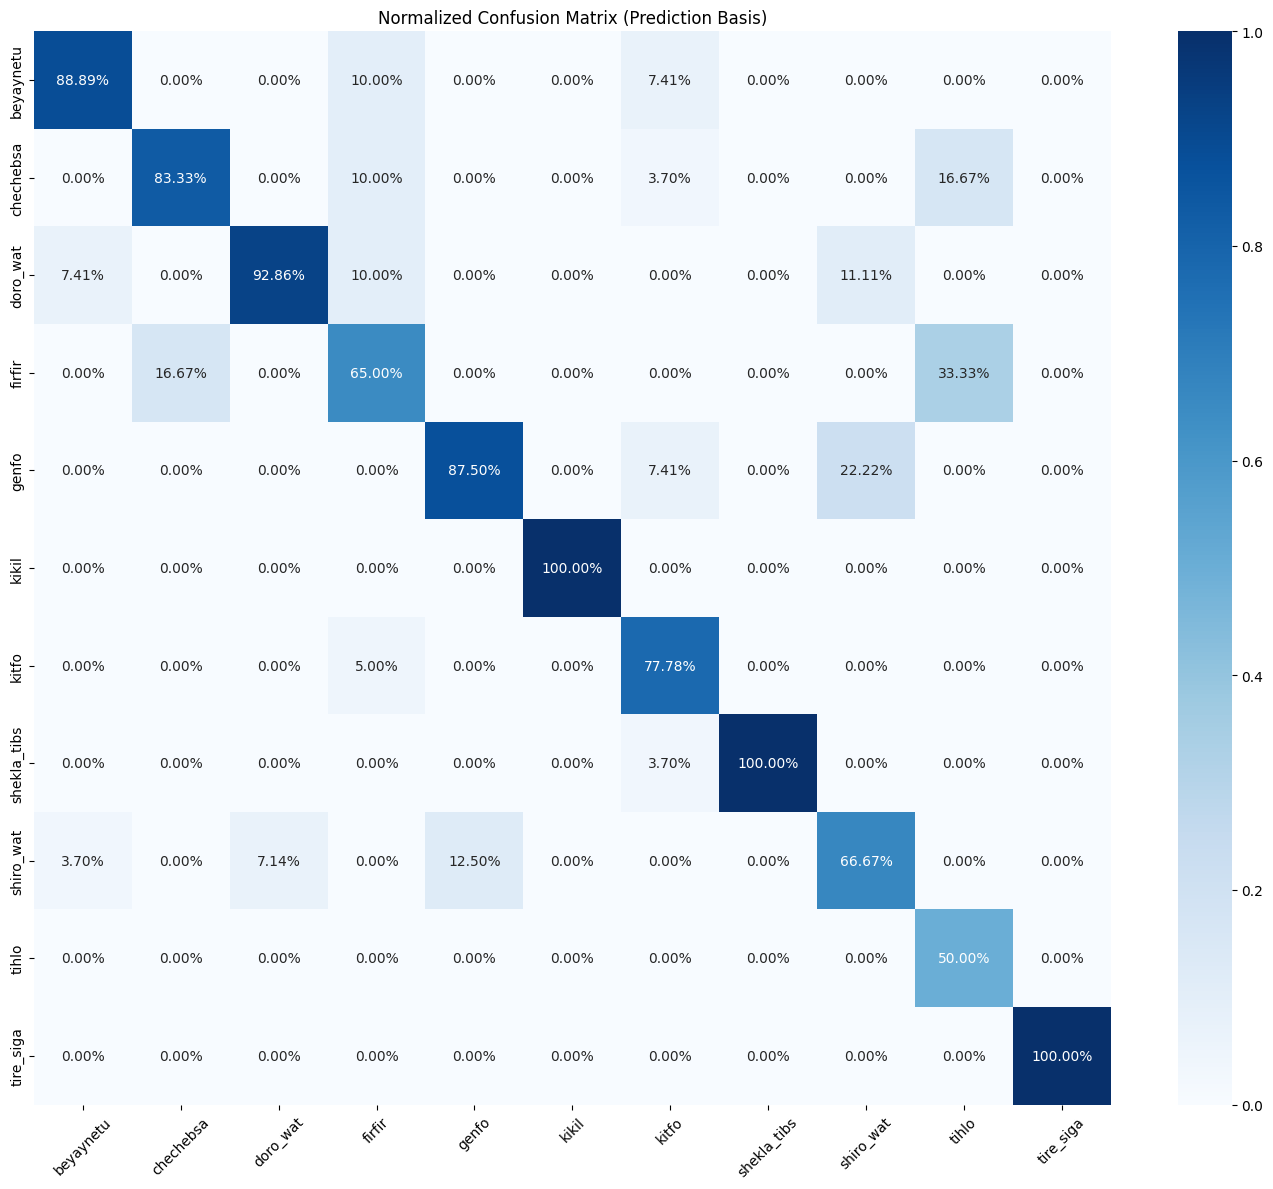

[INFO] Final model saved!


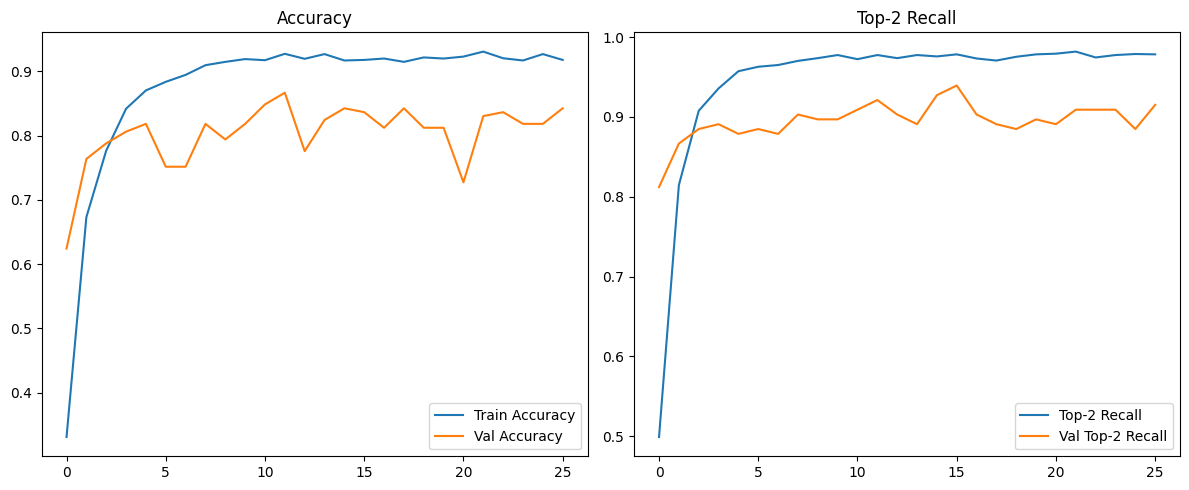

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint,
    Callback
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import os

# ============ DYNAMIC DATA AUGMENTATION ============
train_datagen = ImageDataGenerator(
   rescale=1./255,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Resizing the input images to 512x512
train_generator = train_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/train',
    target_size=(512, 512),  # Resize images to 512x512
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/valid',
    target_size=(512, 512),  # Resize images to 512x512
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/test',
    target_size=(512, 512),  # Resize images to 512x512
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)

# ============ BUILD MODEL ============
def build_model():
    base_model = DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(512, 512, 3),  # Input shape matches resized images
        pooling='avg'
    )
    base_model.trainable = False

    model = Sequential([
        base_model,
        Dense(512, activation='swish', kernel_regularizer=l2(0.1)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='swish', kernel_regularizer=l2(0.05)),
        Dense(len(class_names), activation='softmax')
    ])

    # Use a fixed float lr so it's mutable
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=3e-4,
        clipnorm=1.0
    )

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Recall(name='recall', top_k=2),
            tf.keras.metrics.Precision(name='precision', top_k=2)
        ]
    )
    return model

# ============ EXPONENTIAL DECAY CALLBACK ============
exp_decay = ExponentialDecay(
    initial_learning_rate=3e-4,
    decay_steps=2000,
    decay_rate=0.95,
    staircase=True
)

class ExponentialDecayCallback(Callback):
    def on_batch_end(self, batch, logs=None):
        # compute new LR and assign it
        new_lr = exp_decay(self.model.optimizer.iterations)
        self.model.optimizer.learning_rate.assign(new_lr)

# ============ CLASS WEIGHTING ============
def get_class_weights(generator, boost_map=None):
    weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(generator.classes),
        y=generator.classes
    )
    class_weights = dict(enumerate(weights))

    if boost_map:
        for cls, mult in boost_map.items():
            idx = class_names.index(cls)
            class_weights[idx] *= mult

    return class_weights

boosted_classes = {
    'chechebsa': 2.5,
    'firfir':    1.8,
    'tihlo':     4.0
}

# ============ TRAIN ============
model = build_model()

callbacks = [
    EarlyStopping(monitor='val_recall', patience=10, mode='max', restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1, min_lr=1e-6),
    ModelCheckpoint('best_model.h5', monitor='val_recall', mode='max', save_best_only=True),
    ExponentialDecayCallback()
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    class_weight=get_class_weights(train_generator, boosted_classes),
    callbacks=callbacks
)

# ============ EVALUATE ============
def evaluate_model(model, test_gen, class_names):
    test_gen.reset()
    y_true = test_gen.classes
    y_pred = model.predict(test_gen).argmax(axis=1)

    print("\n[STANDARD EVALUATION]")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    # Top-2 Accuracy
    y_probs = model.predict(test_gen)
    top2 = np.sum([
        y_true[i] in np.argsort(y_probs[i])[-2:] for i in range(len(y_true))
    ])
    print(f"\nTop-2 Accuracy: {top2 / len(y_true):.2%}")

    # Class Performance
    weak = list(boosted_classes.keys())
    print("\n[CLASS PERFORMANCE ANALYSIS]")
    for cls in weak:
        idx = class_names.index(cls)
        mask = (y_true == idx)
        precision = np.mean(y_pred[mask] == idx)
        recall    = np.sum((y_pred == idx) & mask) / np.sum(mask)
        print(f"{cls:<10} | Precision: {precision:.2%} | Recall: {recall:.2%} | Samples: {np.sum(mask)}")

    # Confusion Matrix
    plt.figure(figsize=(14, 12))
    cm = confusion_matrix(y_true, y_pred, normalize='pred')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Normalized Confusion Matrix (Prediction Basis)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

evaluate_model(model, test_generator, class_names)

# ============ SAVE MODEL ============
model.save("final1_ethiopian_food_model.h5")
print("[INFO] Final model saved!")

# ============ VISUALIZE TRAINING ============
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],    label="Train Accuracy")
plt.plot(history.history['val_accuracy'],label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['recall'],     label="Top-2 Recall")
plt.plot(history.history['val_recall'], label="Val Top-2 Recall")
plt.legend()
plt.title("Top-2 Recall")

plt.tight_layout()
plt.show()


✅ DenseNet121 model loaded
5/5 ━━━━━━━━━━━━━━━━━━━━ 164s 30s/step


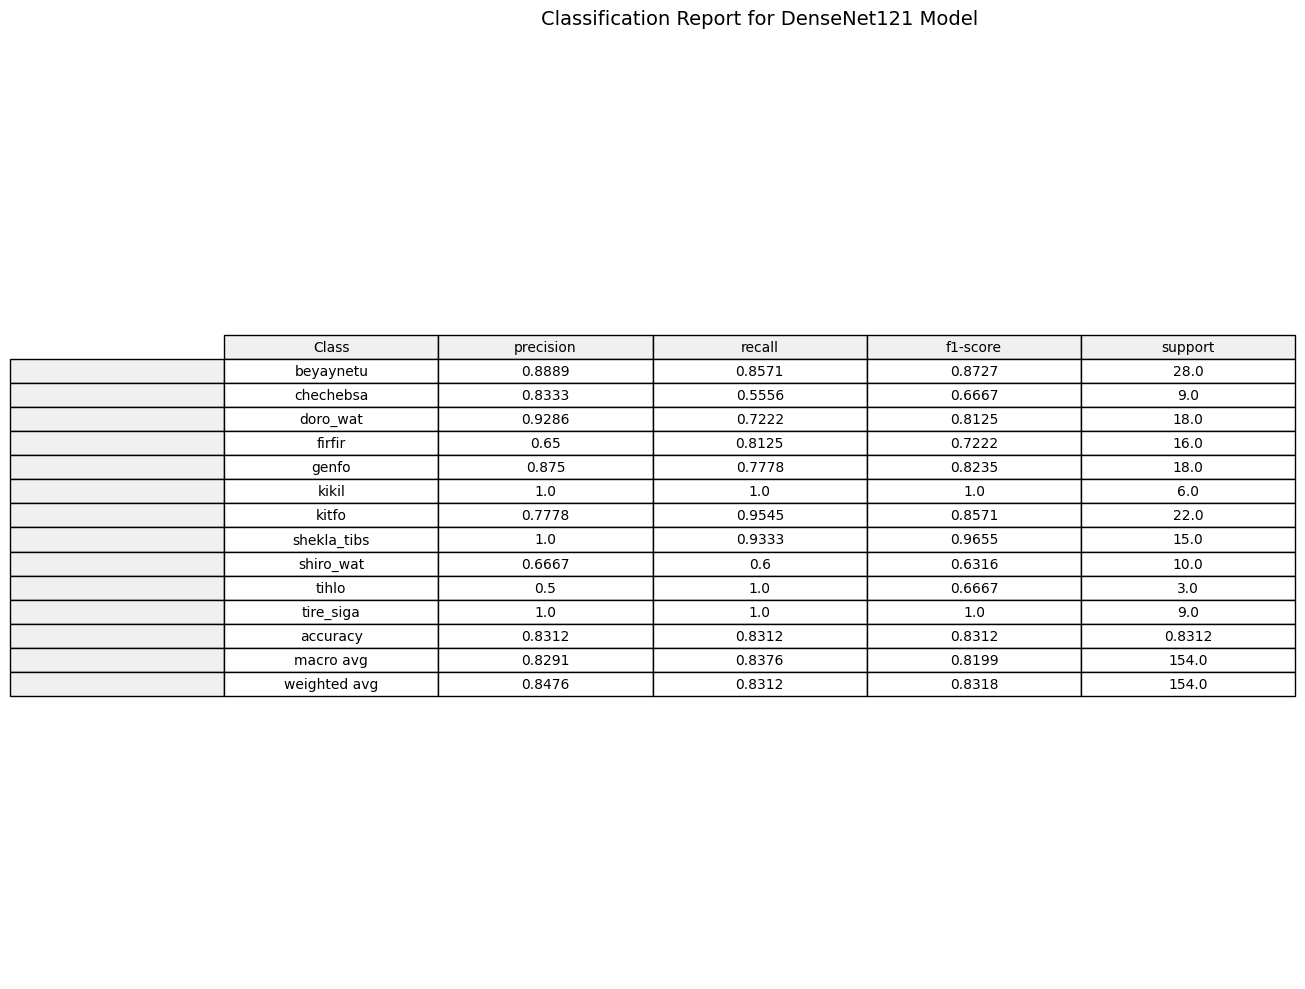

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Load the model ===
model = load_model('/content/drive/MyDrive/dense_final_model.h5', compile=False)
print("✅ DenseNet121 model loaded")

# === Predict on test data ===
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# === Get true labels ===
y_true = test_generator.classes

# === Get class labels ===
class_labels = list(test_generator.class_indices.keys())

# === Generate classification report ===
report_dict = classification_report(
    y_true, y_pred, target_names=class_labels, output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

# === Format DataFrame ===
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Class'}, inplace=True)
numeric_cols = report_df.columns.difference(['Class'])
report_df[numeric_cols] = report_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
report_df[numeric_cols] = report_df[numeric_cols].round(4)

# === Visualization as table with class labels in row and column ===
plt.figure(figsize=(14, 10))
plt.axis('off')

# Build table with both row and column labels
cell_text = []
row_labels = report_df['Class'].tolist()
col_labels = ['Class'] + report_df.columns[1:].tolist()

for i in range(len(report_df)):
    row = [row_labels[i]] + [str(report_df.iloc[i, j]) for j in range(1, len(report_df.columns))]
    cell_text.append(row)

tbl = plt.table(
    cellText=cell_text,
    colLabels=col_labels,
    cellLoc='center',
    loc='center',
    colColours=['#f0f0f0'] * len(col_labels),
    rowColours=['#f0f0f0'] * len(cell_text)
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.title('Classification Report for DenseNet121 Model', fontsize=14, pad=20)
plt.tight_layout()

# === Save and show ===
plt.savefig('/content/drive/MyDrive/densenet121_classification_report.png',
            dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# === Optional: Save CSV ===
report_df.to_csv('/content/drive/MyDrive/densenet121_classification_report.csv', index=False)


In [ ]:
import json

# Save the history to a JSON file
history_dict = history.history  # history.history is a dictionary containing metrics
with open("training_history.json", "w") as f:
    json.dump(history_dict, f)

print("[INFO] Training history saved!")


[INFO] Training history saved!


In [ ]:
import json
import os

   # Save the history to a JSON file in your Google Drive
save_path = os.path.join('/content/drive/MyDrive', 'dense_training_history.json')  # I added 'dense_' to the filename to distinguish it
with open(save_path, "w") as f:
    json.dump(history, f)  # Save 'history' directly, not 'history.history'

print("[INFO] Training history saved to Google Drive!")

[INFO] Training history saved to Google Drive!


In [ ]:
# Load the training history from the JSON file
with open("training_history.json", "r") as f:
    loaded_history = json.load(f)

print(loaded_history)


In [ ]:
# . Save final model
model.save('/content/drive/MyDrive/dense_final_model.h5')
print("✅ Final model and training history saved to Google Drive")

✅ Final model and training history saved to Google Drive


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/dense_final_model.h5'
model = load_model(model_path)

# call model.summary()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,698,509 (29.37 MB)

 Trainable params: 659,979 (2.52 MB)

 Non-trainable params: 7,038,528 (26.85 MB)

 Optimizer params: 2 (12.00 B)

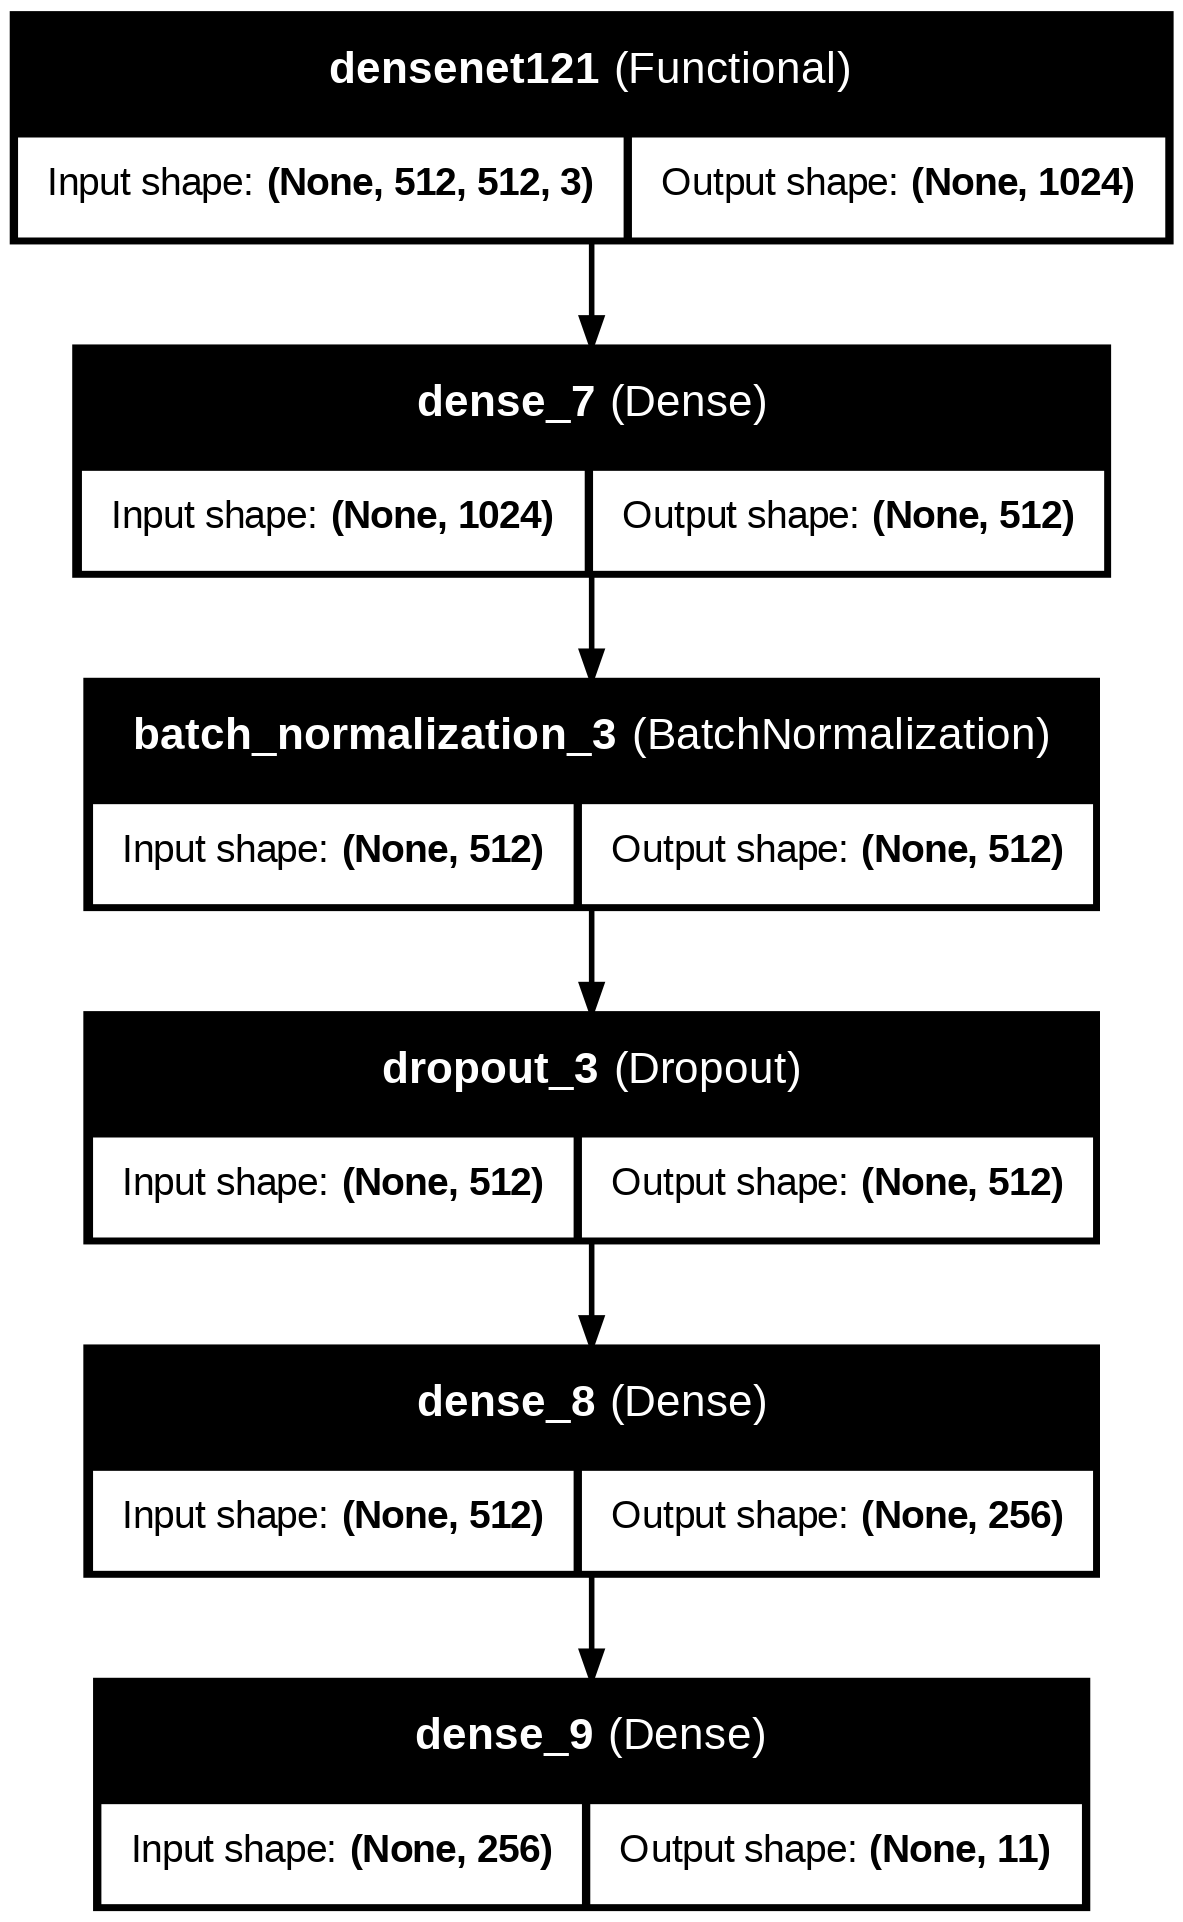

In [ ]:
!pip install pydot graphviz
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Load your model as before
model_path = '/content/drive/MyDrive/dense_final_model.h5'
model = tf.keras.models.load_model(model_path)

# Save the model summary to a file
tf.keras.utils.plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
Image(filename='model_summary.png')

In [ ]:
import numpy as np

# True labels
y_true = test_generator.classes

# Predict probabilities
y_pred = model.predict(test_generator)

# Predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step


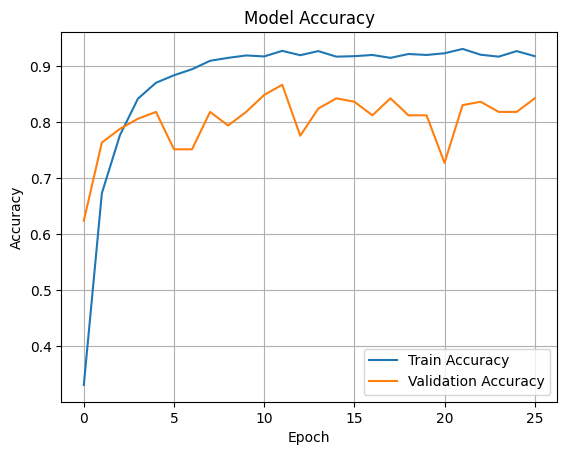

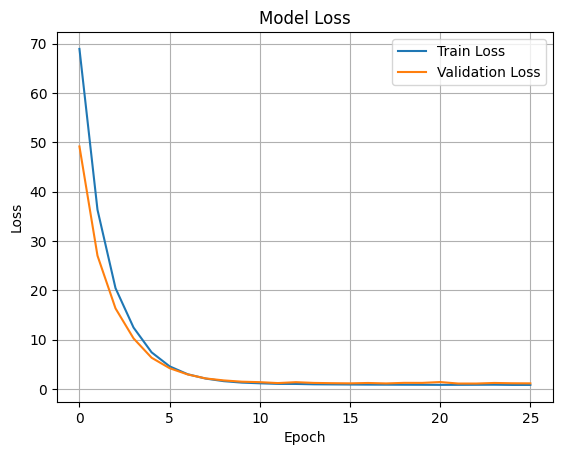

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 'history' object saved, otherwise skip

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


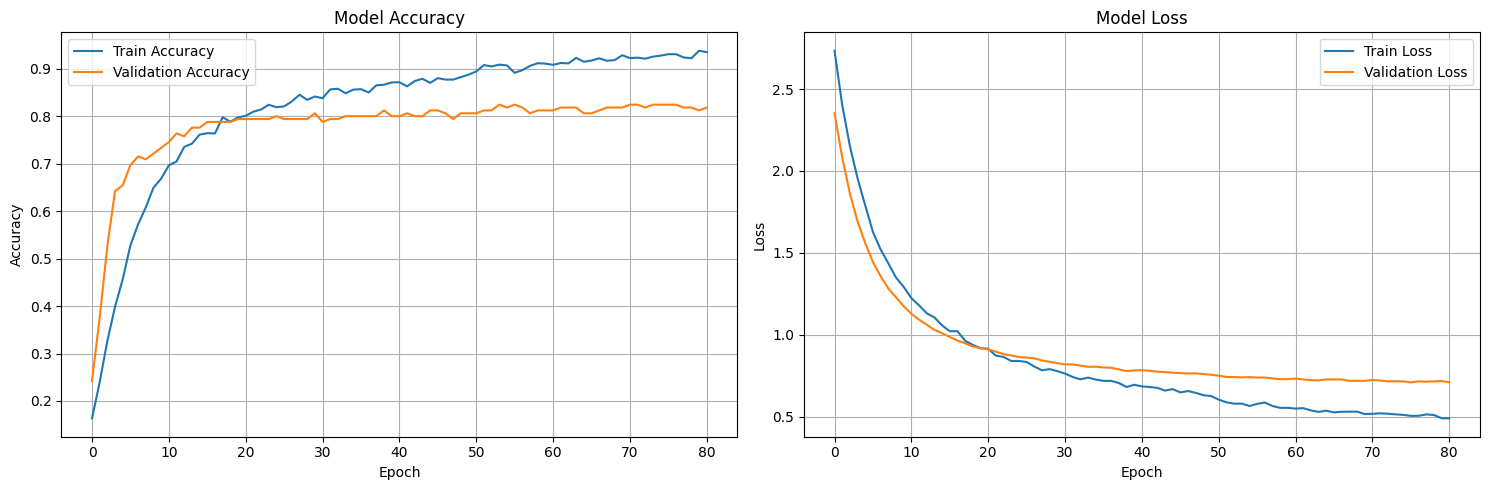

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Accuracy on the first subplot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss on the second subplot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

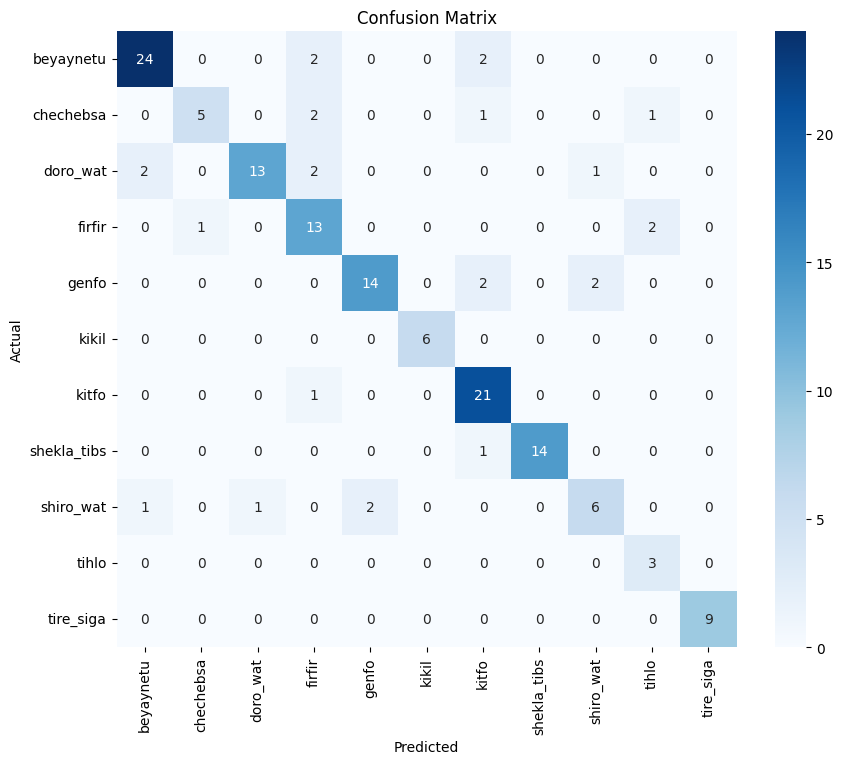

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)


              precision    recall  f1-score   support

   beyaynetu       0.89      0.86      0.87        28
   chechebsa       0.83      0.56      0.67         9
    doro_wat       0.93      0.72      0.81        18
      firfir       0.65      0.81      0.72        16
       genfo       0.88      0.78      0.82        18
       kikil       1.00      1.00      1.00         6
       kitfo       0.78      0.95      0.86        22
 shekla_tibs       1.00      0.93      0.97        15
   shiro_wat       0.67      0.60      0.63        10
       tihlo       0.50      1.00      0.67         3
   tire_siga       1.00      1.00      1.00         9

    accuracy                           0.83       154
   macro avg       0.83      0.84      0.82       154
weighted avg       0.85      0.83      0.83       154



In [ ]:
from sklearn.metrics import top_k_accuracy_score

# Calculate Top-2 Accuracy
top2_acc = top_k_accuracy_score(y_true, y_pred, k=2)
print(f"Top-2 Accuracy: {top2_acc * 100:.2f}%")


Top-2 Accuracy: 93.51%


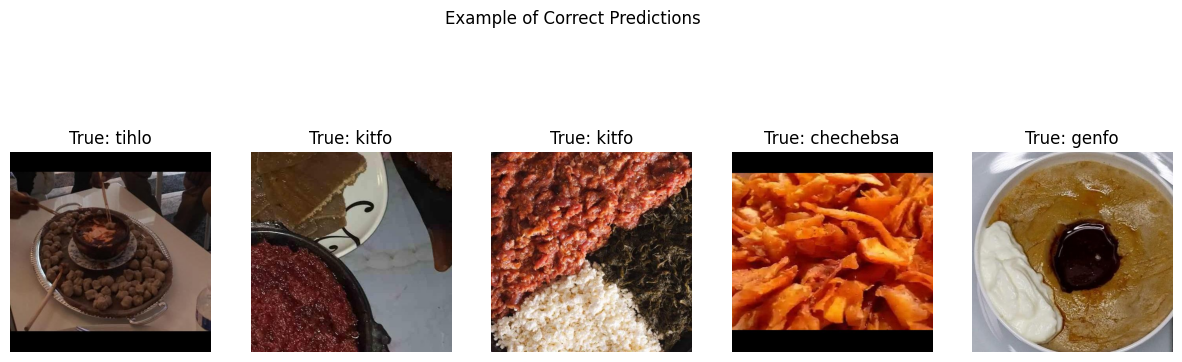

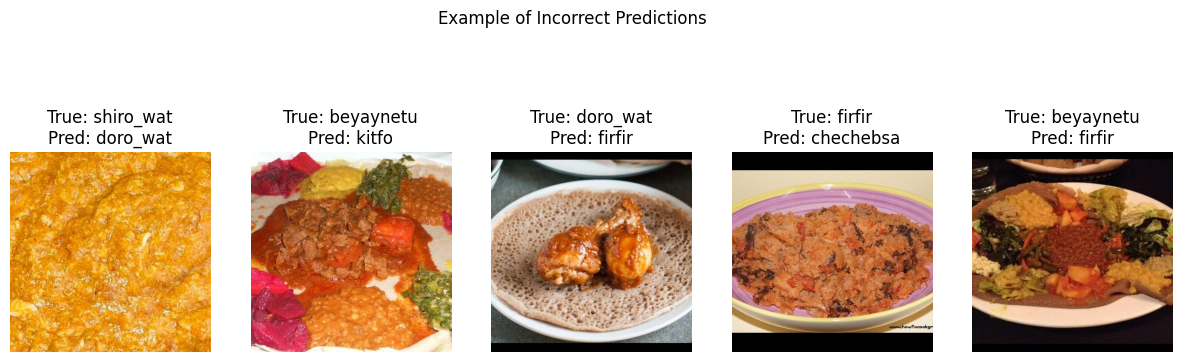

In [ ]:
import random
import os

# Get filenames
filenames = test_generator.filenames
directory = test_generator.directory

# Find correct and incorrect indices
correct = np.where(y_true == y_pred_classes)[0]
incorrect = np.where(y_true != y_pred_classes)[0]

# Plot Correct Predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random.sample(list(correct), 5)):
    img_path = os.path.join(directory, filenames[idx])
    img = plt.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {list(test_generator.class_indices.keys())[y_true[idx]]}")
    plt.axis('off')
plt.suptitle("Example of Correct Predictions")
plt.show()

# Plot Incorrect Predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random.sample(list(incorrect), 5)):
    img_path = os.path.join(directory, filenames[idx])
    img = plt.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {list(test_generator.class_indices.keys())[y_true[idx]]}\nPred: {list(test_generator.class_indices.keys())[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Example of Incorrect Predictions")
plt.show()


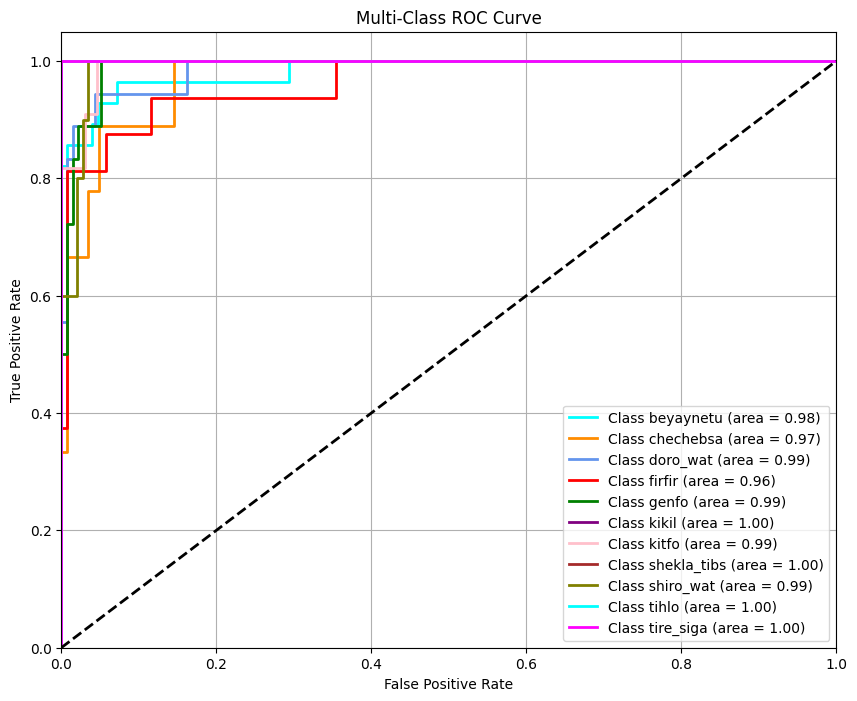

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Number of classes
n_classes = len(test_generator.class_indices)

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'pink', 'brown', 'olive', 'cyan', 'magenta'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {list(test_generator.class_indices.keys())[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Random prediction line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


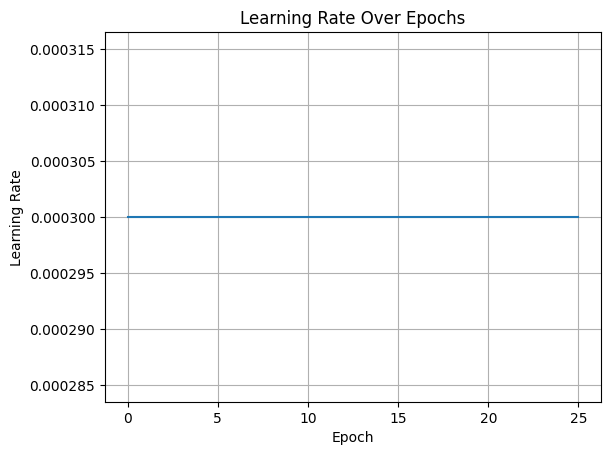

In [ ]:
# Plot Learning Rate changes if history has 'learning_rate'
if 'learning_rate' in history.history:
    plt.plot(history.history['learning_rate'])
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.show()
else:
    print("Learning rate history not found in history.history")


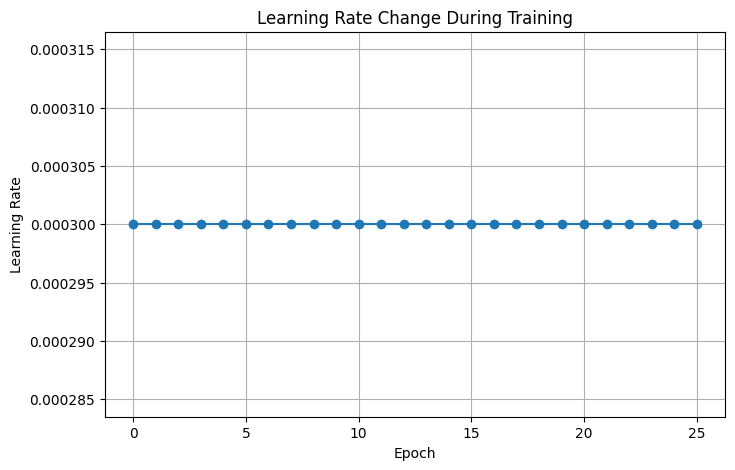

In [ ]:
# --- Plot Learning Rate over Epochs ---

# Extract learning rates recorded during training
lrs = history.history.get('learning_rate')

if lrs is None:
    # fallback if learning_rate was not tracked
    lrs = [model.optimizer.learning_rate.numpy()] * len(history.history['loss'])

plt.figure(figsize=(8, 5))
plt.plot(lrs, marker='o')
plt.title('Learning Rate Change During Training')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step


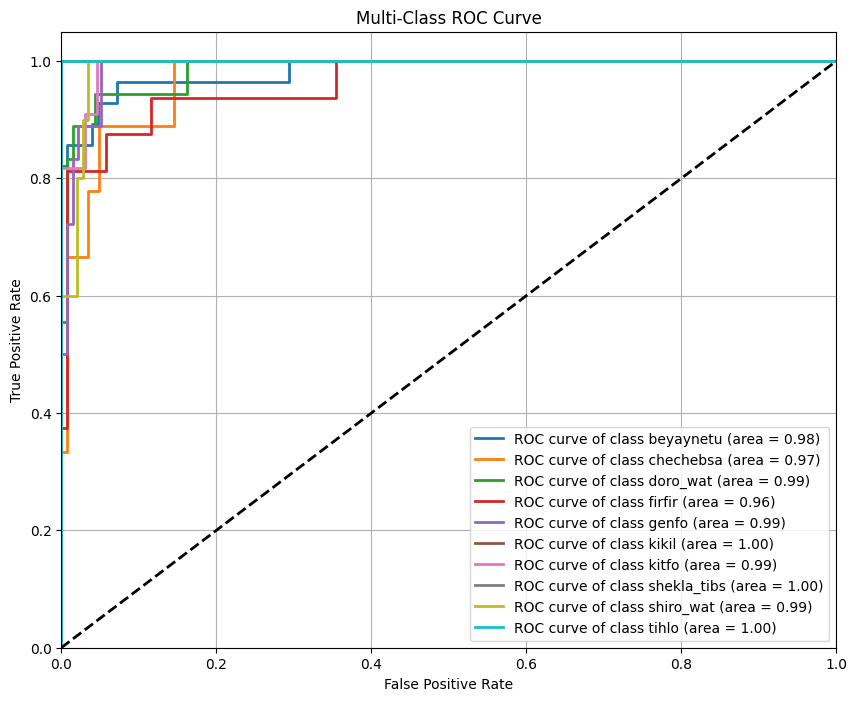

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# --- ROC Curve for Multi-Class ---
# First get the true labels and prediction probabilities
test_generator.reset()
y_true = test_generator.classes
y_score = model.predict(test_generator)

# Binarize the output labels for ROC computation
y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = plt.cm.tab10.colors  # get 10 different colors

for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal Line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


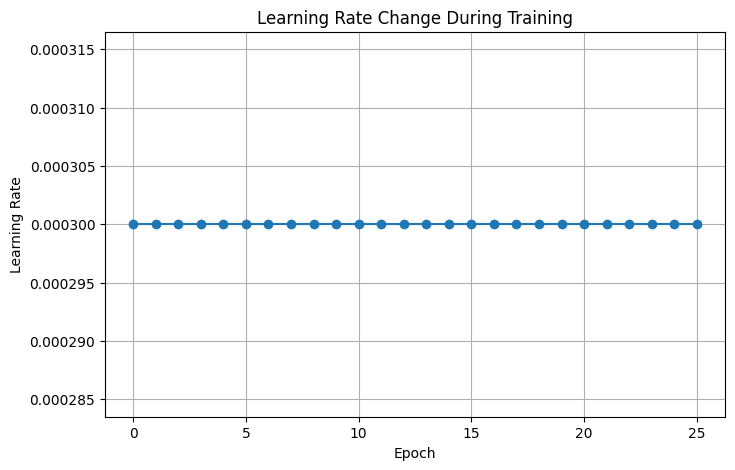

In [ ]:
# --- Plot and Save Learning Rate Curve ---

# Extract learning rates
lrs = history.history.get('learning_rate')
if lrs is None:
    lrs = [model.optimizer.learning_rate.numpy()] * len(history.history['loss'])

plt.figure(figsize=(8, 5))
plt.plot(lrs, marker='o')
plt.title('Learning Rate Change During Training')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.savefig('learning_rate_curve.png', dpi=300)  # <-- SAVE diagram here
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step


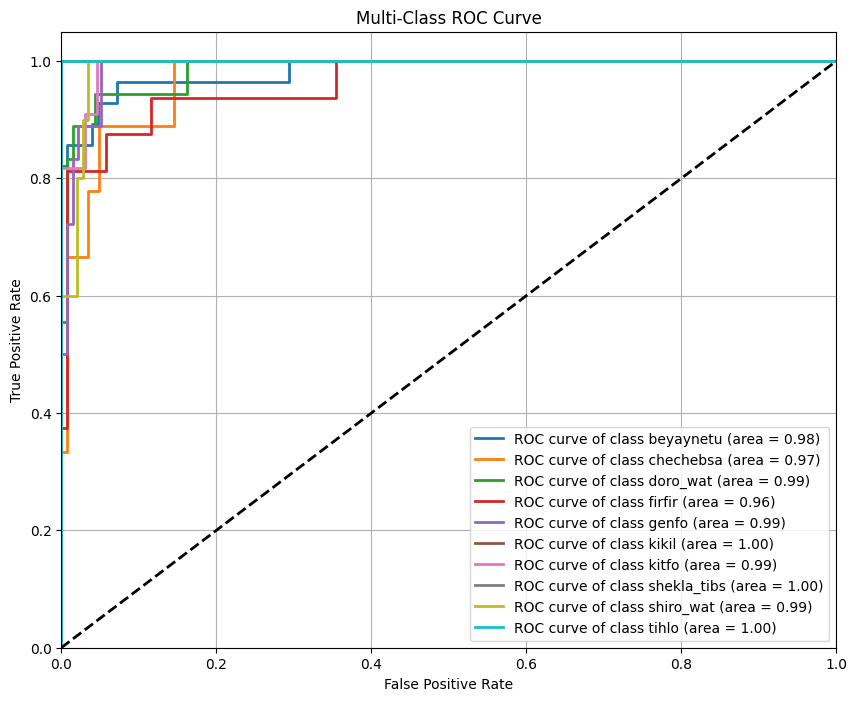

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Plot and Save ROC Curve ---

# Prepare labels
test_generator.reset()
y_true = test_generator.classes
y_score = model.predict(test_generator)

y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

colors = plt.cm.tab10.colors  # colorful lines

for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('multi_class_roc_curve.png', dpi=300)  # <-- SAVE diagram here
plt.show()


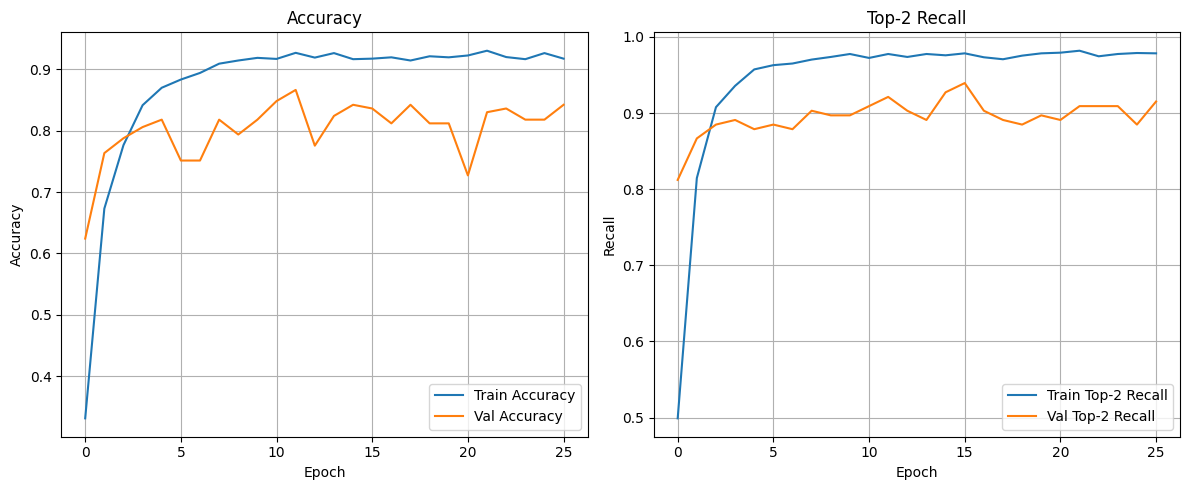

In [ ]:
# --- Plot and Save Accuracy and Recall Curves ---

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Recall plot
plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label="Train Top-2 Recall")
plt.plot(history.history['val_recall'], label="Val Top-2 Recall")
plt.legend()
plt.title("Top-2 Recall")
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.grid(True)

plt.tight_layout()
plt.savefig('accuracy_recall_curves.png', dpi=300)  # <-- SAVE diagram here
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


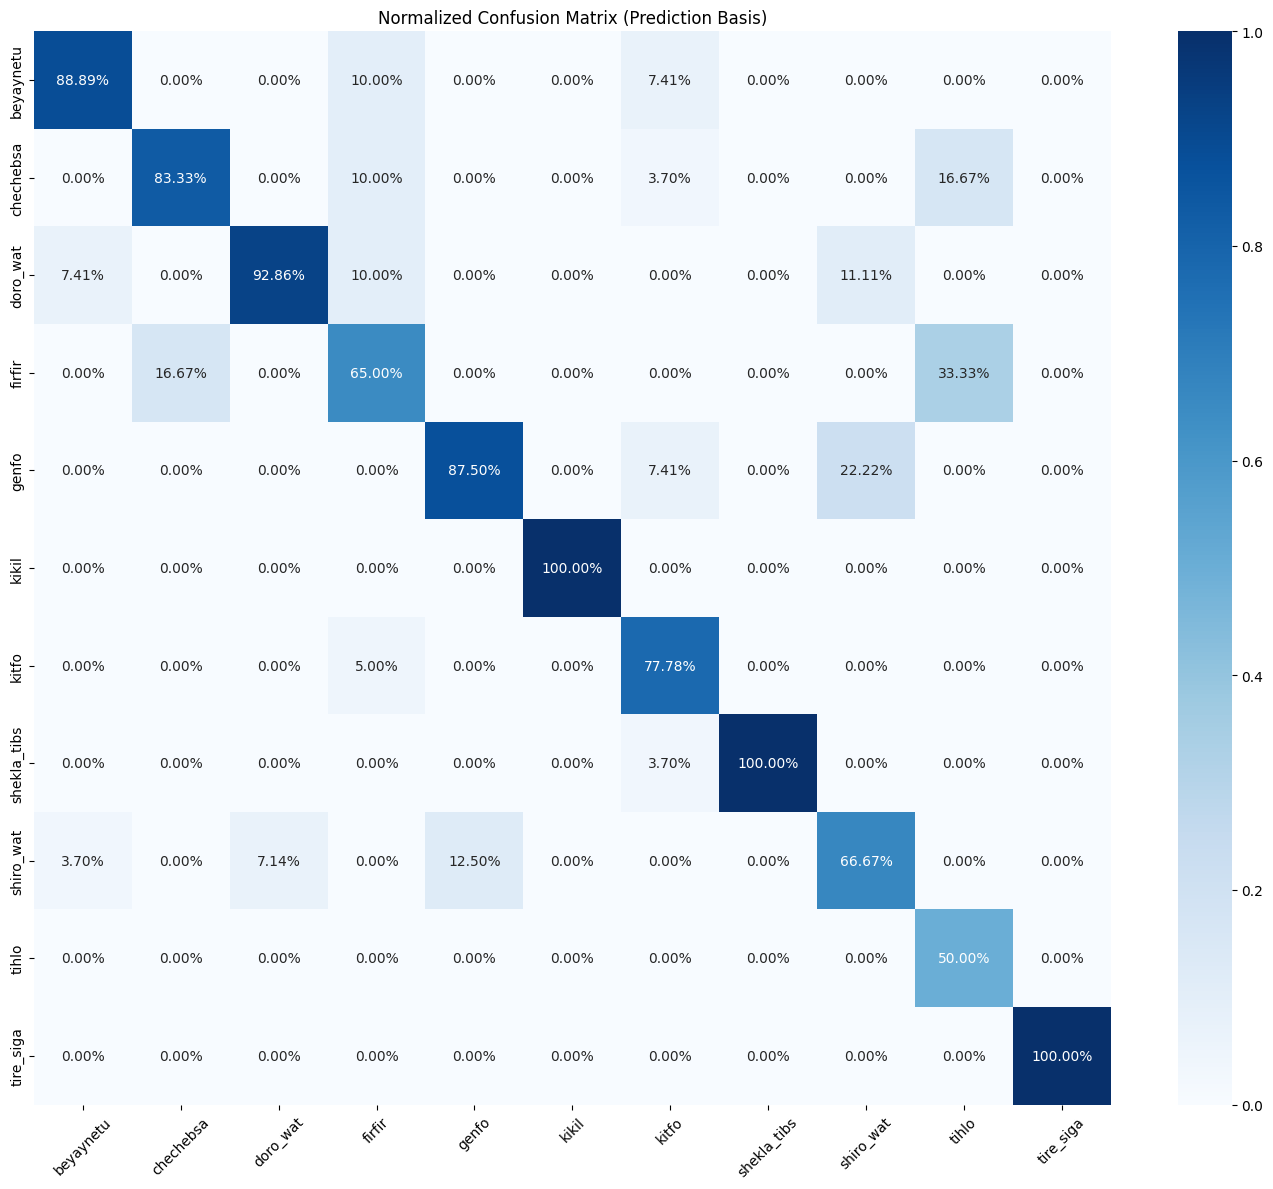

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- Plot and Save Confusion Matrix ---

y_pred = model.predict(test_generator).argmax(axis=1)
y_true = test_generator.classes

plt.figure(figsize=(14, 12))
cm = confusion_matrix(y_true, y_pred, normalize='pred')
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix (Prediction Basis)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)  # <-- SAVE diagram here
plt.show()


In [ ]:
from google.colab import files
files.download('learning_rate_curve.png')
files.download('multi_class_roc_curve.png')
files.download('accuracy_recall_curves.png')
files.download('confusion_matrix.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 432ms/step
              precision  recall  f1-score   support
beyaynetu        0.8889  0.8571    0.8727   28.0000
chechebsa        0.8333  0.5556    0.6667    9.0000
doro_wat         0.9286  0.7222    0.8125   18.0000
firfir           0.6500  0.8125    0.7222   16.0000
genfo            0.8750  0.7778    0.8235   18.0000
kikil            1.0000  1.0000    1.0000    6.0000
kitfo            0.7778  0.9545    0.8571   22.0000
shekla_tibs      1.0000  0.9333    0.9655   15.0000
shiro_wat        0.6667  0.6000    0.6316   10.0000
tihlo            0.5000  1.0000    0.6667    3.0000
tire_siga        1.0000  1.0000    1.0000    9.0000
accuracy         0.8312  0.8312    0.8312    0.8312
macro avg        0.8291  0.8376    0.8199  154.0000
weighted avg     0.8476  0.8312    0.8318  154.0000


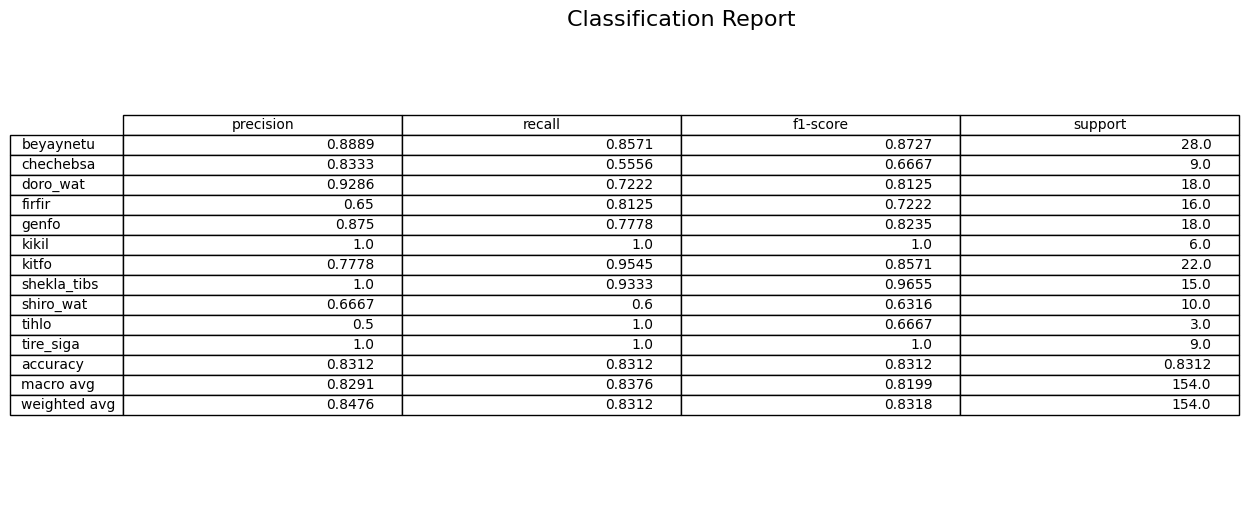

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# --- Get Predictions Again (if needed) ---
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# --- Create Classification Report Dictionary ---
report_dict = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True,
    digits=4
)

# --- Convert to DataFrame ---
report_df = pd.DataFrame(report_dict).transpose()

# --- Optional: Round Numbers ---
report_df = report_df.round(4)

# --- Display the table ---
print(report_df)

# --- Save to CSV (optional if you want it) ---
report_df.to_csv('classification_report.csv')

# --- Save the Table as Image ---
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Classification Report', fontsize=16)
plt.savefig('classification_report_table.png', dpi=300, bbox_inches='tight')  # <-- SAVE as image
plt.show()


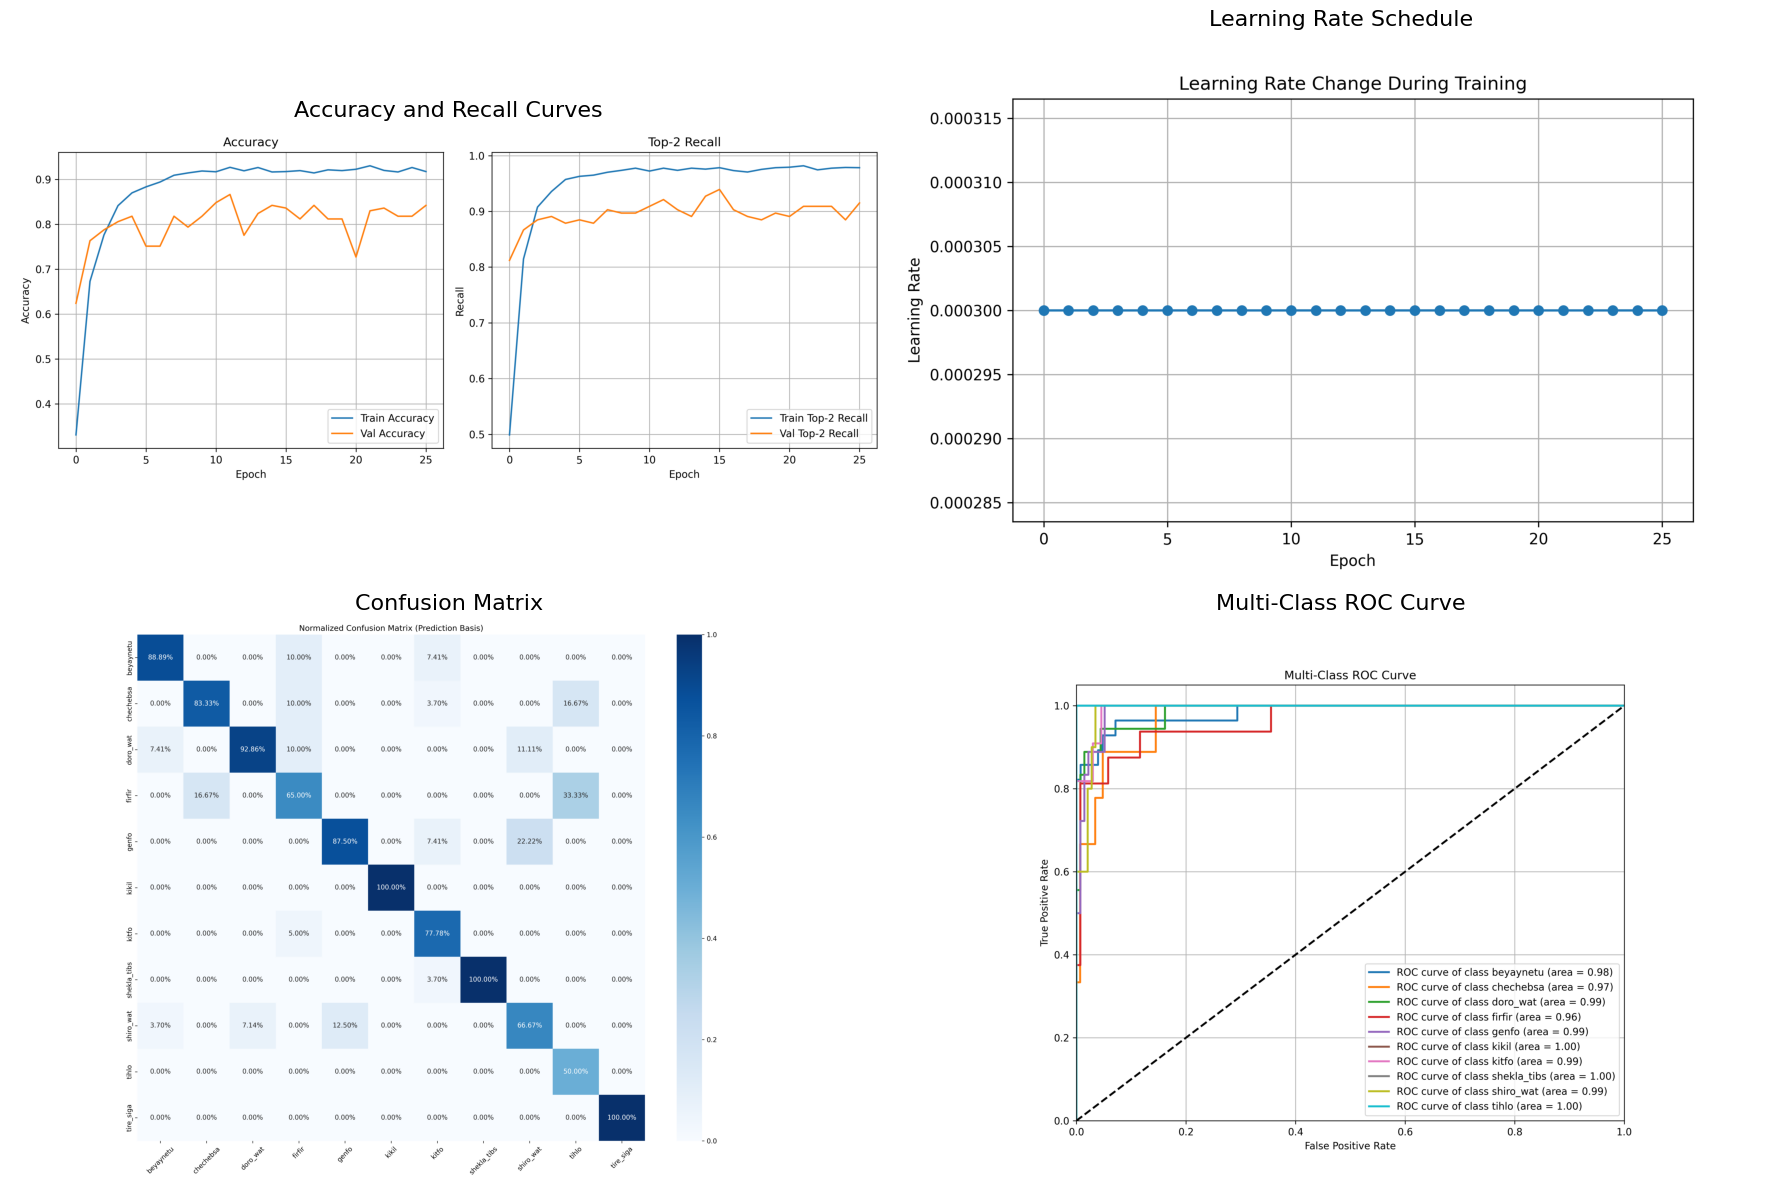

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# --- Load the saved plots ---
acc_recall_img = mpimg.imread('accuracy_recall_curves.png')
lr_curve_img   = mpimg.imread('learning_rate_curve.png')
conf_matrix_img = mpimg.imread('confusion_matrix.png')
roc_curve_img  = mpimg.imread('multi_class_roc_curve.png')

# --- Create a Big Figure ---
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# --- Add Each Plot ---
axs[0, 0].imshow(acc_recall_img)
axs[0, 0].axis('off')
axs[0, 0].set_title('Accuracy and Recall Curves', fontsize=16)

axs[0, 1].imshow(lr_curve_img)
axs[0, 1].axis('off')
axs[0, 1].set_title('Learning Rate Schedule', fontsize=16)

axs[1, 0].imshow(conf_matrix_img)
axs[1, 0].axis('off')
axs[1, 0].set_title('Confusion Matrix', fontsize=16)

axs[1, 1].imshow(roc_curve_img)
axs[1, 1].axis('off')
axs[1, 1].set_title('Multi-Class ROC Curve', fontsize=16)

plt.tight_layout()
plt.savefig('summary_figure.png', dpi=300, bbox_inches='tight')  # <-- SAVE the full summary
plt.show()


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.1445 - loss: 2.8589 - recall: 0.0118 - val_accuracy: 0.2424 - val_loss: 2.3524 - val_recall: 0.0061
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.2208 - loss: 2.4861 - recall: 0.0206 - val_accuracy: 0.3758 - val_loss: 2.0832 - val_recall: 0.0303
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.3040 - loss: 2.2110 - recall: 0.0522 - val_accuracy: 0.5273 - val_loss: 1.8635 - val_recall: 0.0545
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.3714 - loss: 2.0058 - recall: 0.0787 - val_accuracy: 0.6424 - val_loss: 1.6924 - val_recall: 0.0848
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4310 - loss: 1.8555 - recall: 0.1112 - val_accuracy: 0.6545 - val_loss: 1.5602 - val_recall: 0.1273
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5188 - loss: 1.6569 - recall: 0.1714 - val_accuracy: 0.6970

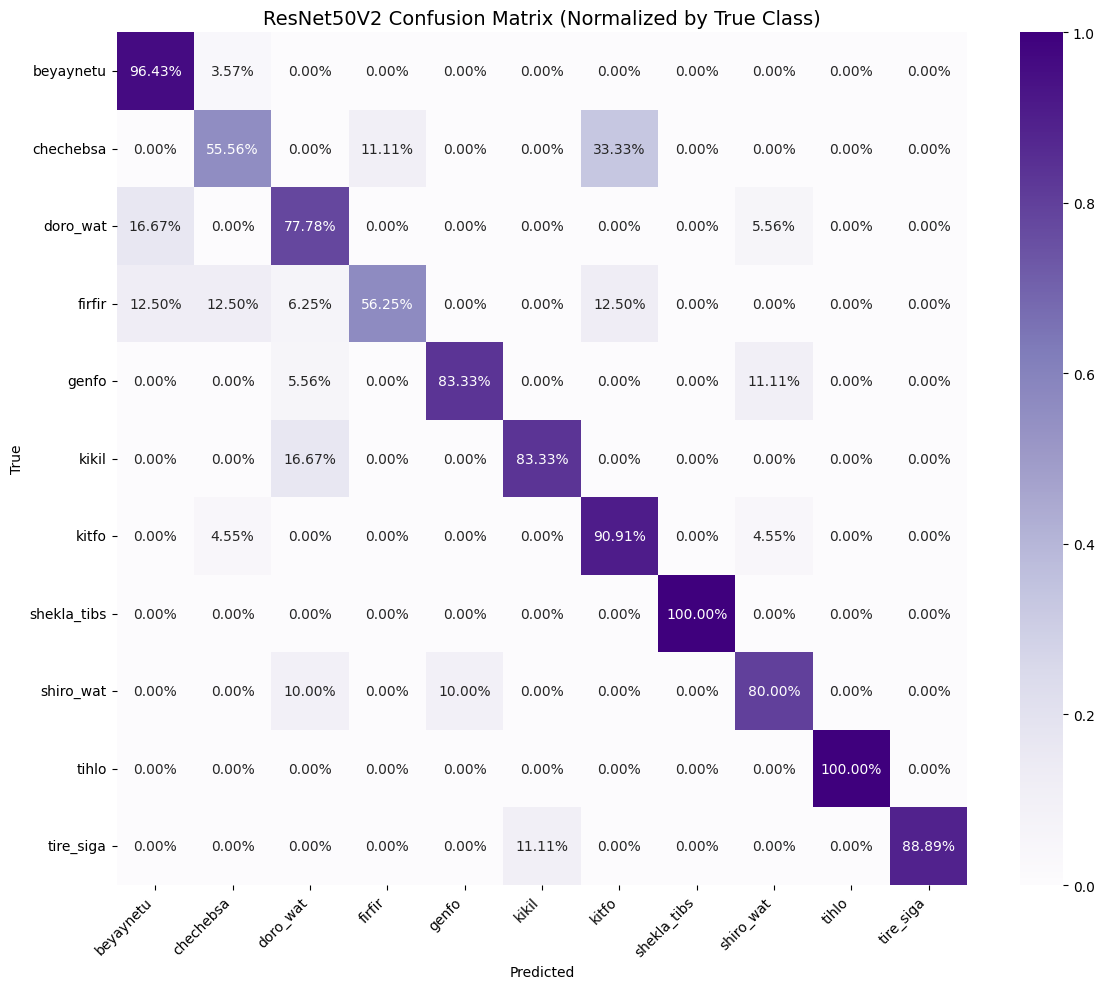

✅ Final model and training history saved to Google Drive


In [ ]:
from tensorflow.keras.metrics import Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50V2
import pandas as pd
import json

# ============ DYNAMIC DATA AUGMENTATION ============
train_datagen = ImageDataGenerator(
   rescale=1./255,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# 1. Rebuild Model with Regularization
base_model = ResNet50V2(
    weights='imagenet',
    include_top=False,
    input_shape=(512, 512, 3)
)
base_model.trainable = False  # Freeze base layers first

model_resnet = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),  # Critical change
    tf.keras.layers.Dense(11, activation='softmax',
                         kernel_regularizer=l2(0.01))  # L2 regularization
])

# 2. Compile with Lower Learning Rate and Add Recall Metric
model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Reduced from default 1e-3
    loss='categorical_crossentropy',
    metrics=['accuracy', Recall()]  # Add Recall here
)

# 3. Train with Early Stopping
history = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5,
                            restore_best_weights=True)]
)

# 4. Evaluate (Your Existing Code with Improvements)
test_generator.reset()
y_true = test_generator.classes
y_pred_proba = model_resnet.predict(test_generator)
y_pred = np.argmax(y_pred_proba, axis=1)

print(f"\nResNet50V2 Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# Get class names from train_generator
class_names = list(train_generator.class_indices.keys())  # Define class_names

# Enhanced Classification Report
print("\nClassification Report (After Fix):")
print(classification_report(y_true, y_pred,
                          target_names=class_names,
                          digits=4))

# Normalized Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    confusion_matrix(y_true, y_pred) / confusion_matrix(y_true, y_pred).sum(axis=1)[:, np.newaxis],
    annot=True, fmt=".2%", cmap="Purples",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("ResNet50V2 Confusion Matrix (Normalized by True Class)", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('resnet50v2_cm_fixed.png', dpi=300)
plt.show()

# 5. Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv('/content/drive/MyDrive/resnet50v2_training3_history.csv', index=False)

with open('/content/drive/MyDrive/resnet50v2_training3_history.json', 'w') as f:
    json.dump(history.history, f)

# 6. Save final model
model_resnet.save('/content/drive/MyDrive/resnet50v2_final3_model.h5')
print("✅ Final model and training history saved to Google Drive")


Found 2319 images belonging to 11 classes.
Found 165 images belonging to 11 classes.
Found 154 images belonging to 11 classes.
✅ Model loaded without compiling
✅ Model recompiled manually


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.9045 - loss: 0.5917 - recall: 0.8103

73/73 ━━━━━━━━━━━━━━━━━━━━ 79s 734ms/step - accuracy: 0.9044 - loss: 0.5918 - recall: 0.8100 - val_accuracy: 0.8061 - val_loss: 0.7519 - val_recall: 0.7394
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9059 - loss: 0.5930 - recall: 0.7954

73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 384ms/step - accuracy: 0.9059 - loss: 0.5930 - recall: 0.7955 - val_accuracy: 0.8121 - val_loss: 0.7440 - val_recall: 0.7394
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9096 - loss: 0.5816 - recall: 0.8019

73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 394ms/step - accuracy: 0.9095 - loss: 0.5816 - recall: 0.8019 - val_accuracy: 0.8121 - val_loss: 0.7435 - val_recall: 0.7333
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9164 - loss: 0.5640 - recall: 0.8145

73/73 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step - accuracy: 0.9163 - loss: 0.5643 - recall: 0.8143 - val_accuracy: 0.8242 - val_loss: 0.7413 - val_recall: 0.7333
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 361ms/step - accuracy: 0.9103 - loss: 0.5560 - recall: 0.8072 - val_accuracy: 0.8182 - val_loss: 0.7428 - val_recall: 0.7333
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.8960 - loss: 0.5839 - recall: 0.8064

73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 394ms/step - accuracy: 0.8960 - loss: 0.5838 - recall: 0.8063 - val_accuracy: 0.8242 - val_loss: 0.7404 - val_recall: 0.7455
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.8880 - loss: 0.6212 - recall: 0.7839

73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 392ms/step - accuracy: 0.8881 - loss: 0.6207 - recall: 0.7841 - val_accuracy: 0.8182 - val_loss: 0.7401 - val_recall: 0.7394
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9102 - loss: 0.5675 - recall: 0.8110

73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 388ms/step - accuracy: 0.9102 - loss: 0.5675 - recall: 0.8109 - val_accuracy: 0.8061 - val_loss: 0.7351 - val_recall: 0.7455
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9176 - loss: 0.5541 - recall: 0.8279

73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 388ms/step - accuracy: 0.9175 - loss: 0.5541 - recall: 0.8278 - val_accuracy: 0.8121 - val_loss: 0.7302 - val_recall: 0.7515
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 362ms/step - accuracy: 0.9225 - loss: 0.5524 - recall: 0.8181 - val_accuracy: 0.8121 - val_loss: 0.7311 - val_recall: 0.7455
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 360ms/step - accuracy: 0.9098 - loss: 0.5587 - recall: 0.8133 - val_accuracy: 0.8121 - val_loss: 0.7338 - val_recall: 0.7394
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.9180 - loss: 0.5525 - recall: 0.8174

73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 381ms/step - accuracy: 0.9179 - loss: 0.5525 - recall: 0.8174 - val_accuracy: 0.8182 - val_loss: 0.7289 - val_recall: 0.7394
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9136 - loss: 0.5370 - recall: 0.8267

73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 385ms/step - accuracy: 0.9136 - loss: 0.5370 - recall: 0.8267 - val_accuracy: 0.8182 - val_loss: 0.7245 - val_recall: 0.7455
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.9190 - loss: 0.5310 - recall: 0.8535

73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 392ms/step - accuracy: 0.9190 - loss: 0.5310 - recall: 0.8533 - val_accuracy: 0.8182 - val_loss: 0.7225 - val_recall: 0.7455
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 373ms/step - accuracy: 0.9103 - loss: 0.5470 - recall: 0.8229 - val_accuracy: 0.8061 - val_loss: 0.7291 - val_recall: 0.7394
Epoch 16/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 364ms/step - accuracy: 0.9200 - loss: 0.5271 - recall: 0.8461 - val_accuracy: 0.8061 - val_loss: 0.7285 - val_recall: 0.7394
Epoch 17/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - accuracy: 0.9210 - loss: 0.5211 - recall: 0.8424 - val_accuracy: 0.8121 - val_loss: 0.7287 - val_recall: 0.7394
Epoch 18/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9156 - loss: 0.5416 - recall: 0.8140

73/73 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step - accuracy: 0.9157 - loss: 0.5415 - recall: 0.8142 - val_accuracy: 0.8182 - val_loss: 0.7203 - val_recall: 0.7455
Epoch 19/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9194 - loss: 0.5266 - recall: 0.8452

73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 386ms/step - accuracy: 0.9193 - loss: 0.5267 - recall: 0.8452 - val_accuracy: 0.8182 - val_loss: 0.7202 - val_recall: 0.7455
Epoch 20/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 368ms/step - accuracy: 0.9288 - loss: 0.5071 - recall: 0.8491 - val_accuracy: 0.8182 - val_loss: 0.7204 - val_recall: 0.7455
Epoch 21/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 366ms/step - accuracy: 0.9192 - loss: 0.5244 - recall: 0.8406 - val_accuracy: 0.8242 - val_loss: 0.7255 - val_recall: 0.7455
Epoch 22/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.9233 - loss: 0.5272 - recall: 0.8196 - val_accuracy: 0.8242 - val_loss: 0.7224 - val_recall: 0.7455
Epoch 23/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9200 - loss: 0.5143 - recall: 0.8479

73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.9200 - loss: 0.5144 - recall: 0.8478 - val_accuracy: 0.8182 - val_loss: 0.7169 - val_recall: 0.7455
Epoch 24/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 376ms/step - accuracy: 0.9345 - loss: 0.5003 - recall: 0.8527 - val_accuracy: 0.8242 - val_loss: 0.7184 - val_recall: 0.7455
Epoch 25/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9321 - loss: 0.5053 - recall: 0.8426

73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 383ms/step - accuracy: 0.9320 - loss: 0.5054 - recall: 0.8426 - val_accuracy: 0.8242 - val_loss: 0.7168 - val_recall: 0.7455
Epoch 26/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.9259 - loss: 0.5145 - recall: 0.8627

73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 392ms/step - accuracy: 0.9260 - loss: 0.5144 - recall: 0.8626 - val_accuracy: 0.8242 - val_loss: 0.7106 - val_recall: 0.7515
Epoch 27/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 362ms/step - accuracy: 0.9258 - loss: 0.5083 - recall: 0.8508 - val_accuracy: 0.8242 - val_loss: 0.7170 - val_recall: 0.7515
Epoch 28/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 362ms/step - accuracy: 0.9209 - loss: 0.5228 - recall: 0.8359 - val_accuracy: 0.8182 - val_loss: 0.7150 - val_recall: 0.7515
Epoch 29/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 364ms/step - accuracy: 0.9297 - loss: 0.5009 - recall: 0.8541 - val_accuracy: 0.8182 - val_loss: 0.7170 - val_recall: 0.7515
Epoch 30/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 26s 356ms/step - accuracy: 0.9411 - loss: 0.4961 - recall: 0.8541 - val_accuracy: 0.8121 - val_loss: 0.7193 - val_recall: 0.7515
Epoch 31/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step - accuracy: 0.9414 - loss: 0.4786 - recall: 0.8699 - val_accuracy: 0.8182 - val_loss: 0.7112 - val_recall: 0.7515


✅ Final model and training history saved to Google Drive


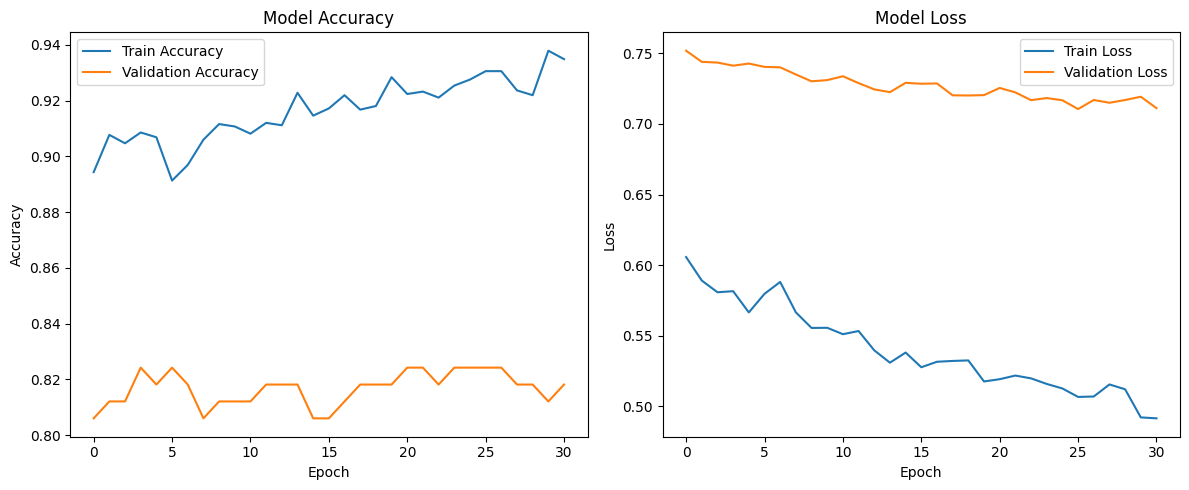

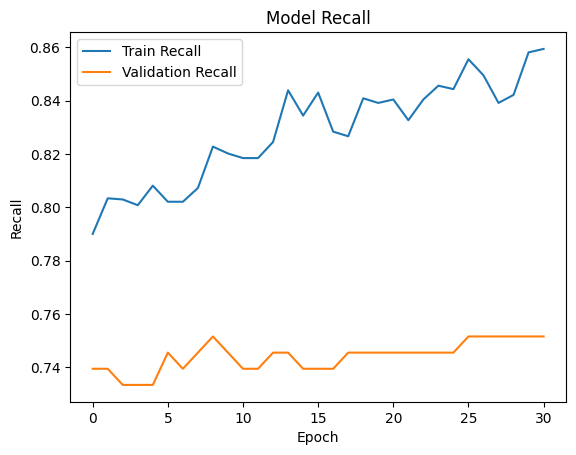

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
import json
import matplotlib.pyplot as plt

# Only rescale (augmentation was already done using Roboflow)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/train',
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/valid',
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/test',
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 1. Load without compiling
model = load_model('/content/drive/MyDrive/resnet50v2_final3_model.h5', compile=False)
print("✅ Model loaded without compiling")

# 2. Manually recompile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall()]
)
print("✅ Model recompiled manually")

# 3. Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/resnet50v2_final44_model.h5', monitor='val_loss', save_best_only=True)

# 4. Continue training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, checkpoint]
)

# 5. Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv('/content/drive/MyDrive/resnet50v2_training4_history.csv', index=False)

with open('/content/drive/MyDrive/resnet50v2_training4_history.json', 'w') as f:
    json.dump(history.history, f)

# 6. Save final model
model.save('/content/drive/MyDrive/resnet50v2_final4_model.h5')
print("✅ Final model and training history saved to Google Drive")

# 7. Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Recall plot
if 'recall' in history.history:
    plt.figure()
    plt.plot(history.history['recall'], label='Train Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()


In [ ]:
# Save the training history (including accuracy, loss, and recall) into a CSV file
# Assuming the training history is stored in the dictionary named 'history'
history_df = pd.DataFrame(history)  # Use the 'history' dictionary directly
history_df.to_csv('/content/drive/MyDrive/resnet50v2_training4_history.csv', index=False)

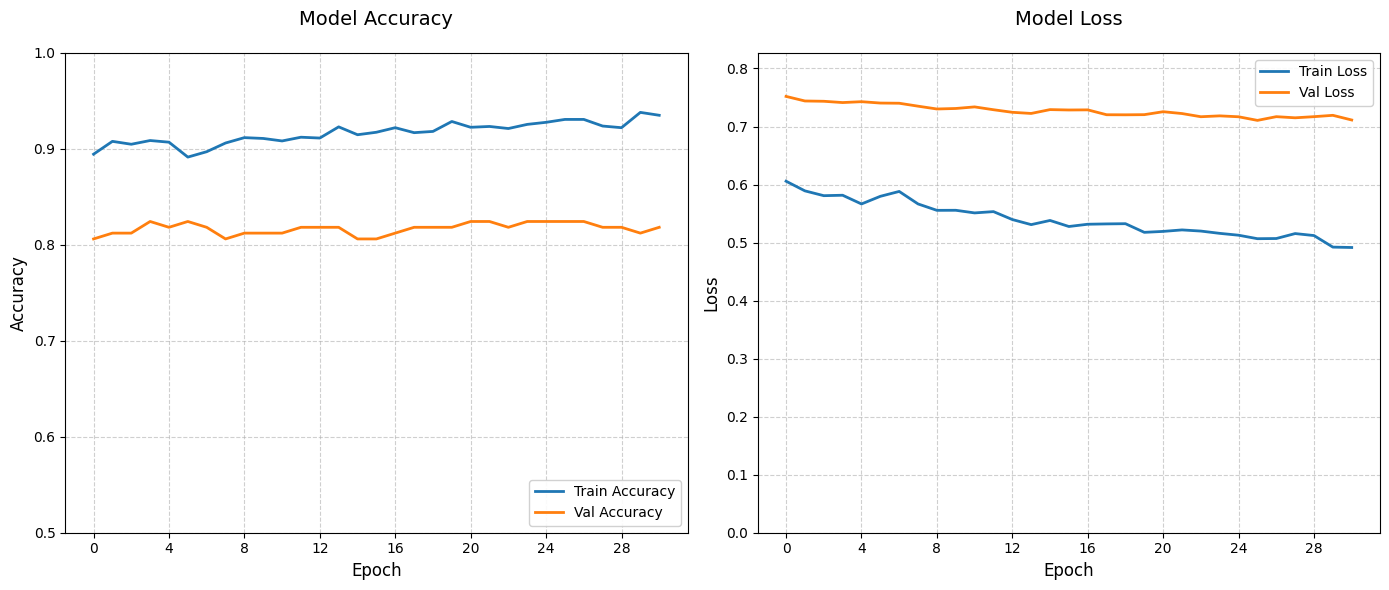

In [ ]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Load history from JSON file
history_path = '/content/drive/MyDrive/resnet50v2_training4_history.json'
with open(history_path, 'r') as f:
    loaded_history = json.load(f)

# Wrap it into an object with `.history` attribute to mimic Keras History object
class HistoryWrapper:
    def __init__(self, history_dict):
        self.history = history_dict

history = HistoryWrapper(loaded_history)

def plot_training_curves(history):
    plt.figure(figsize=(14, 6))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2, sharex=ax1)

    ax1.plot(history.history['accuracy'],
             color='#1f77b4', linestyle='-', linewidth=2, label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'],
             color='#ff7f0e', linestyle='-', linewidth=2, label='Val Accuracy')
    ax1.set_title('Model Accuracy', fontsize=14, pad=20)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.legend(loc='lower right', framealpha=0.9)
    ax1.set_ylim(0.5, 1.0)
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax2.plot(history.history['loss'],
             color='#1f77b4', linestyle='-', linewidth=2, label='Train Loss')
    ax2.plot(history.history['val_loss'],
             color='#ff7f0e', linestyle='-', linewidth=2, label='Val Loss')
    ax2.set_title('Model Loss', fontsize=14, pad=20)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend(loc='upper right', framealpha=0.9)
    ax2.set_ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)

    plt.tight_layout()
    plt.show()

# Now call the function with loaded history
plot_training_curves(history)


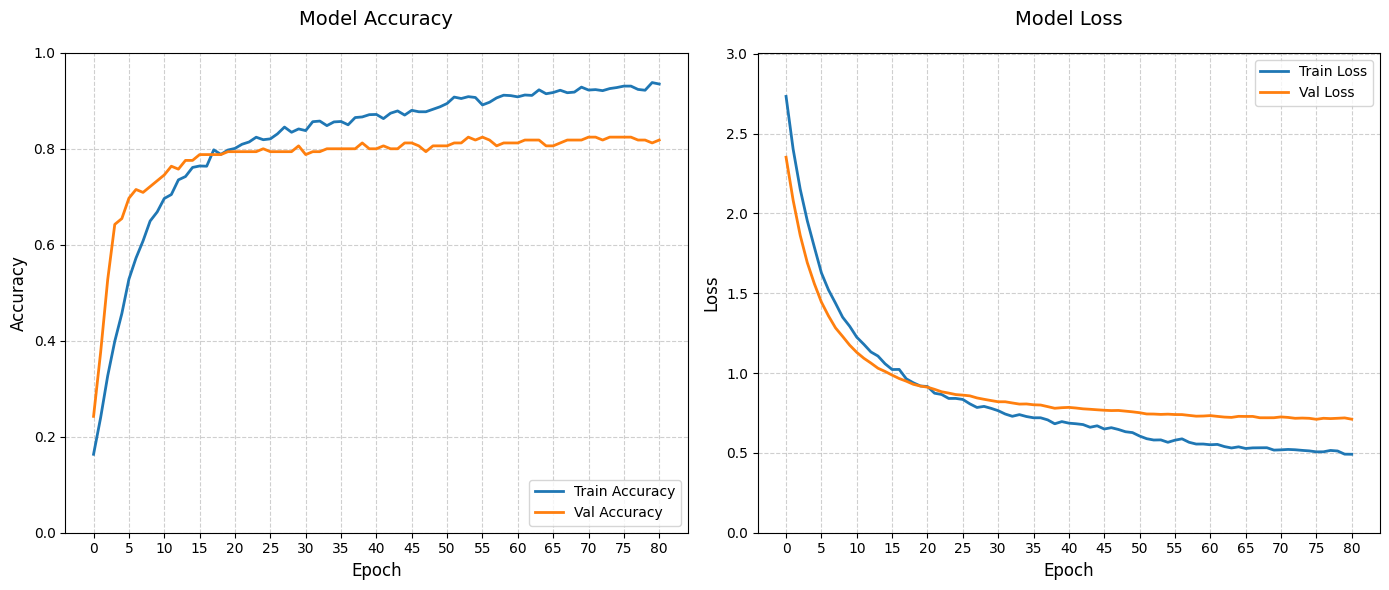

In [ ]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Load history JSON files
with open('/content/drive/MyDrive/resnet50v2_training3_history.json', 'r') as f1:
    history1 = json.load(f1)

with open('/content/drive/MyDrive/resnet50v2_training4_history.json', 'r') as f2:
    history2 = json.load(f2)

# Merge the histories
merged_history = {}
for key in history1.keys():
    if key in history2:
        merged_history[key] = history1[key] + history2[key]
    else:
        print(f"Warning: Key '{key}' not found in second history.")

# History wrapper to mimic Keras History object
class HistoryWrapper:
    def __init__(self, history_dict):
        self.history = history_dict

history = HistoryWrapper(merged_history)

# Plotting function
def plot_training_curves(history):
    plt.figure(figsize=(14, 6))

    # Accuracy subplot
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(history.history['accuracy'], color='#1f77b4', linewidth=2, label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], color='#ff7f0e', linewidth=2, label='Val Accuracy')
    ax1.set_title('Model Accuracy', fontsize=14, pad=20)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.legend(loc='lower right')
    ax1.set_ylim(0, 1.0)

    ax1.xaxis.set_major_locator(MultipleLocator(5))  # <- Changed here

    # Loss subplot
    ax2 = plt.subplot(1, 2, 2, sharex=ax1)
    ax2.plot(history.history['loss'], color='#1f77b4', linewidth=2, label='Train Loss')
    ax2.plot(history.history['val_loss'], color='#ff7f0e', linewidth=2, label='Val Loss')
    ax2.set_title('Model Loss', fontsize=14, pad=20)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend(loc='upper right')
    ax2.set_ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)
    ax2.xaxis.set_major_locator(MultipleLocator(5))  # <- Changed here

    plt.tight_layout()
    plt.show()

# Call the function
plot_training_curves(history)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on the test data
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class indices

# Get true labels
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
print(report)

# Optional: save the report to a file
with open('/content/drive/MyDrive/resnet50v2_classification_report.txt', 'w') as f:
    f.write(report)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step
              precision    recall  f1-score   support

   beyaynetu     0.8710    0.9643    0.9153        28
   chechebsa     0.6250    0.5556    0.5882         9
    doro_wat     0.8824    0.8333    0.8571        18
      firfir     0.9167    0.6875    0.7857        16
       genfo     0.9375    0.8333    0.8824        18
       kikil     0.8571    1.0000    0.9231         6
       kitfo     0.8000    0.9091    0.8511        22
 shekla_tibs     1.0000    1.0000    1.0000        15
   shiro_wat     0.6667    0.8000    0.7273        10
       tihlo     1.0000    1.0000    1.0000         3
   tire_siga     1.0000    0.8889    0.9412         9

    accuracy                         0.8636       154
   macro avg     0.8688    0.8611    0.8610       154
weighted avg     0.8691    0.8636    0.8624       154



Found 154 images belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 145s 26s/step


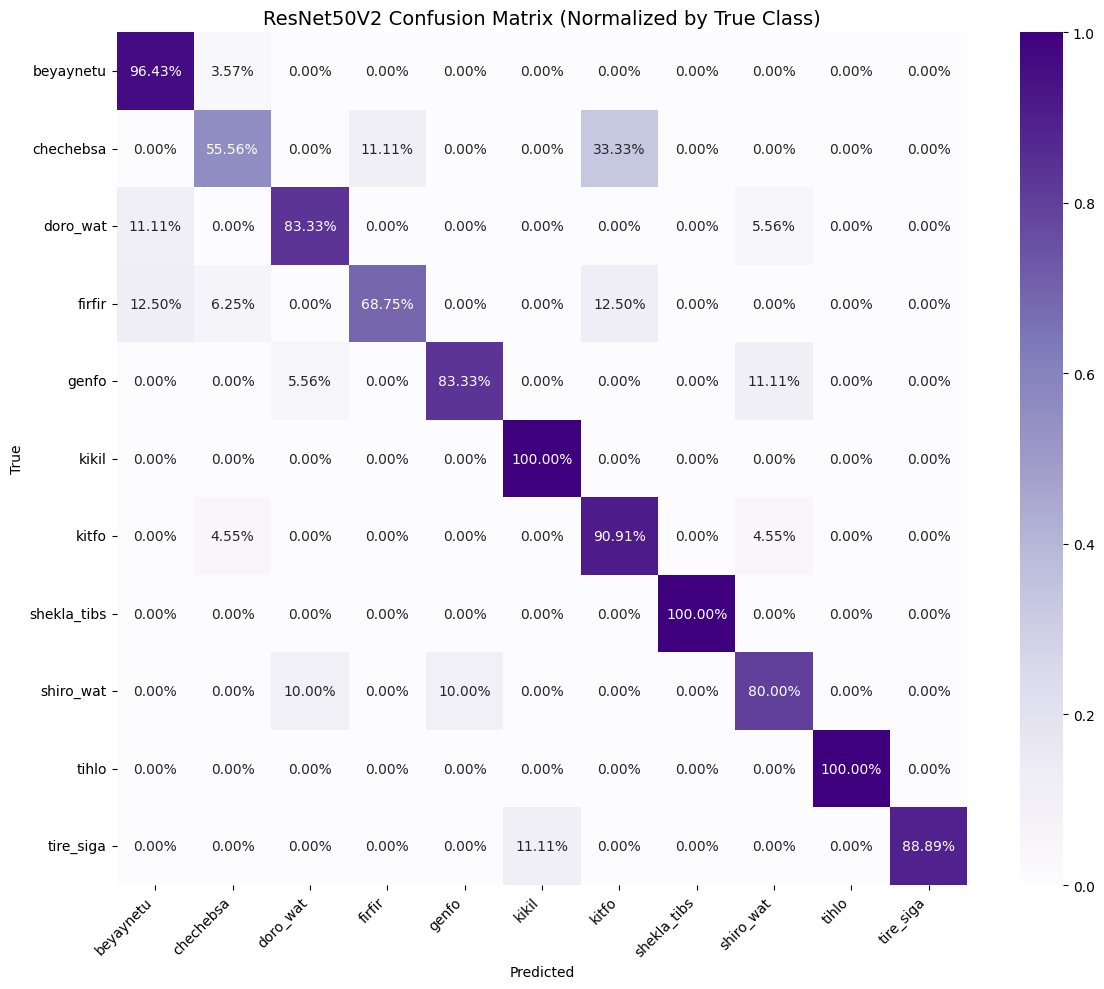


ResNet50V2 Test Accuracy: 0.8636

Classification Report:
              precision    recall  f1-score   support

   beyaynetu     0.8710    0.9643    0.9153        28
   chechebsa     0.6250    0.5556    0.5882         9
    doro_wat     0.8824    0.8333    0.8571        18
      firfir     0.9167    0.6875    0.7857        16
       genfo     0.9375    0.8333    0.8824        18
       kikil     0.8571    1.0000    0.9231         6
       kitfo     0.8000    0.9091    0.8511        22
 shekla_tibs     1.0000    1.0000    1.0000        15
   shiro_wat     0.6667    0.8000    0.7273        10
       tihlo     1.0000    1.0000    1.0000         3
   tire_siga     1.0000    0.8889    0.9412         9

    accuracy                         0.8636       154
   macro avg     0.8688    0.8611    0.8610       154
weighted avg     0.8691    0.8636    0.8624       154



In [ ]:
# === Step-by-step Confusion Matrix Generation and Plotting ===

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Load Model ===
model = load_model('/content/drive/MyDrive/resnet50v2_final4_model.h5')

# === Recreate Test Generator ===
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/test',
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# === Predict on Test Data ===
y_true = test_generator.classes
y_pred_proba = model.predict(test_generator)
y_pred = np.argmax(y_pred_proba, axis=1)

# === Class Labels ===
class_names = list(test_generator.class_indices.keys())

# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by true class

# === Plot Normalized Confusion Matrix ===
plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap="Purples",
            xticklabels=class_names, yticklabels=class_names)
plt.title("ResNet50V2 Confusion Matrix (Normalized by True Class)", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('resnet50v2_cm_normalized.png', dpi=300)
plt.show()

# === Optional: Print Accuracy and Report ===
print(f"\nResNet50V2 Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


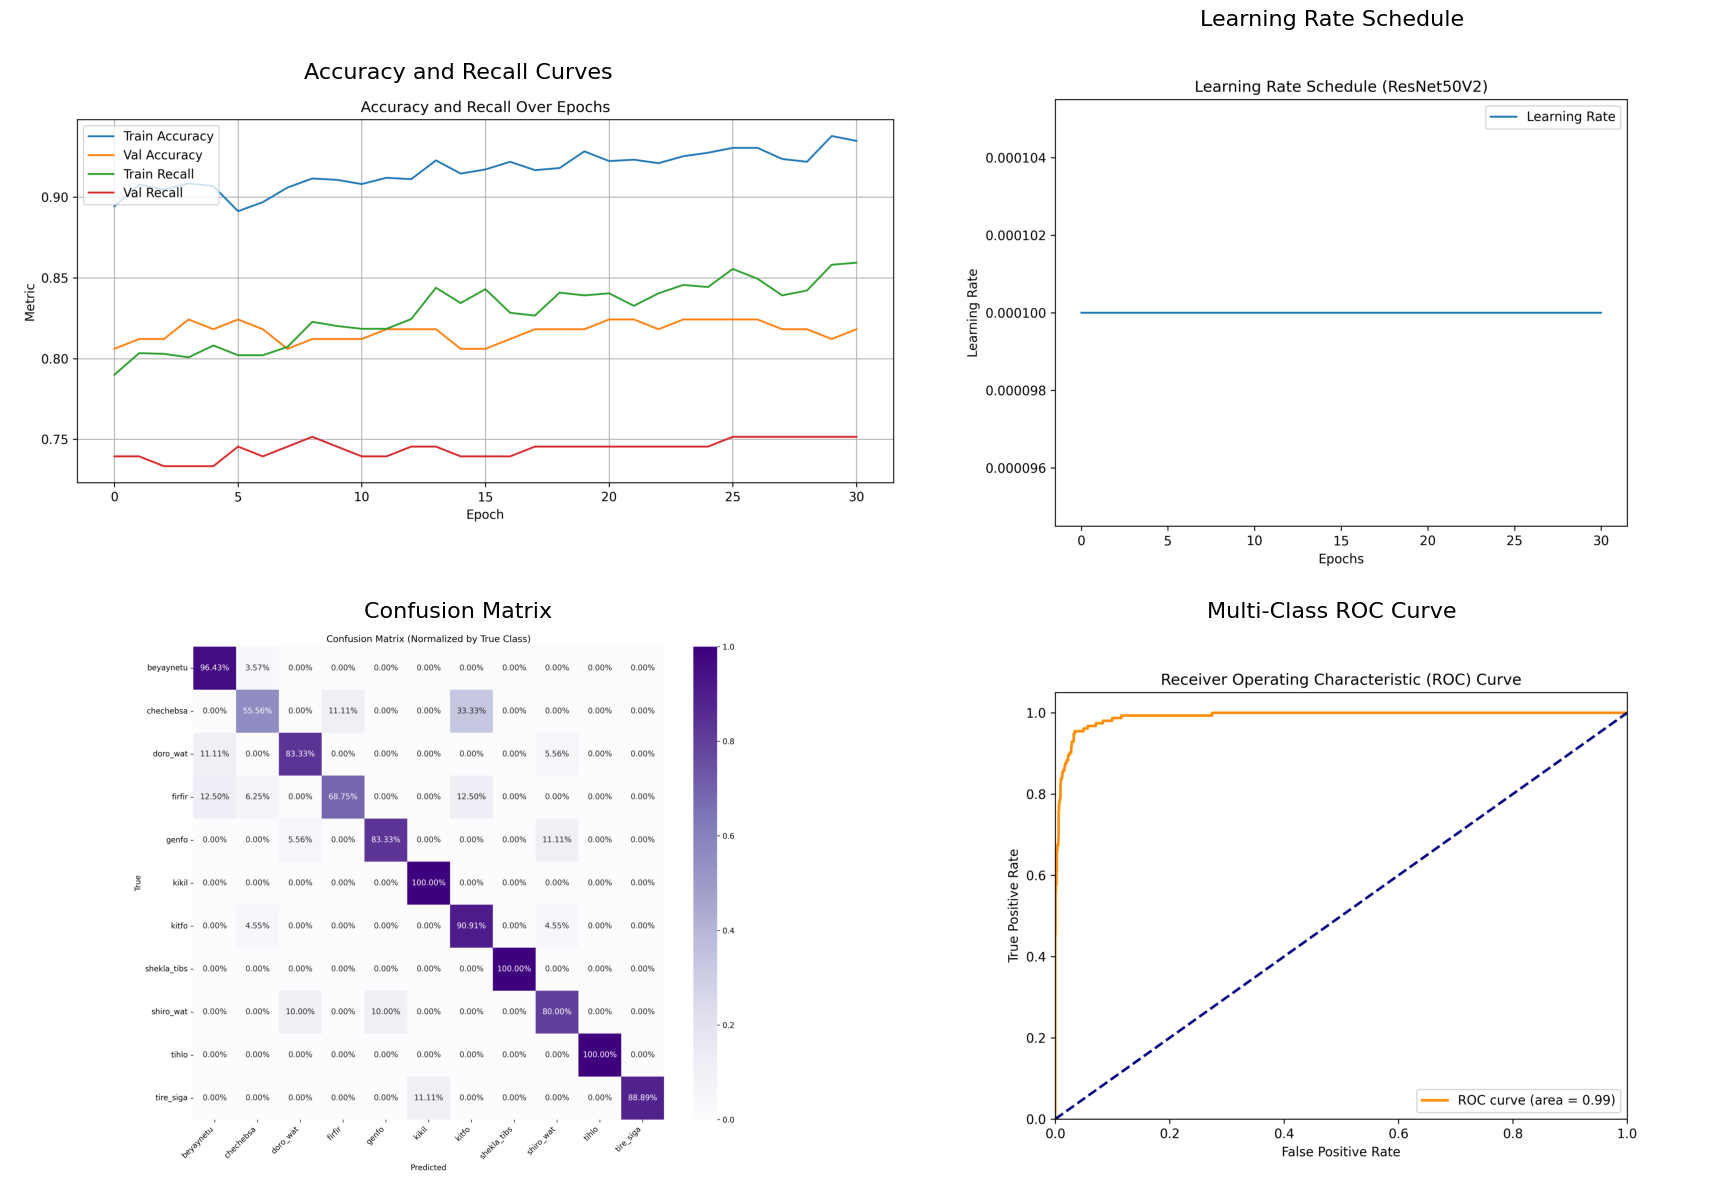

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- Get the current directory ---
current_dir = os.getcwd()

# --- Define paths using os.path.join for better portability ---
acc_recall_path = os.path.join(current_dir, 'accuracy_recall_curves.png')
lr_curve_path = os.path.join(current_dir, 'learning_rate_curve_resnet.png') # Updated path
conf_matrix_path = os.path.join(current_dir, 'confusion_matrix_resnet50v2.png') # Updated path
roc_curve_path = os.path.join(current_dir, 'roc_curve_resnet50v2.png') # Updated path


# --- Load the saved plots, but check if the files exist first ---
if os.path.exists(acc_recall_path):
    acc_recall_img = mpimg.imread(acc_recall_path)
else:
    raise FileNotFoundError(f"File not found: {acc_recall_path}")

if os.path.exists(lr_curve_path):
    lr_curve_img = mpimg.imread(lr_curve_path)
else:
    raise FileNotFoundError(f"File not found: {lr_curve_path}")

if os.path.exists(conf_matrix_path):
    conf_matrix_img = mpimg.imread(conf_matrix_path)
else:
    raise FileNotFoundError(f"File not found: {conf_matrix_path}")

if os.path.exists(roc_curve_path):
    roc_curve_img = mpimg.imread(roc_curve_path)
else:
    raise FileNotFoundError(f"File not found: {roc_curve_path}")

# --- Create a Big Figure ---
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# --- Add Each Plot ---
axs[0, 0].imshow(acc_recall_img)
axs[0, 0].axis('off')
axs[0, 0].set_title('Accuracy and Recall Curves', fontsize=16)

axs[0, 1].imshow(lr_curve_img)
axs[0, 1].axis('off')
axs[0, 1].set_title('Learning Rate Schedule', fontsize=16)

axs[1, 0].imshow(conf_matrix_img)
axs[1, 0].axis('off')
axs[1, 0].set_title('Confusion Matrix', fontsize=16)

axs[1, 1].imshow(roc_curve_img)
axs[1, 1].axis('off')
axs[1, 1].set_title('Multi-Class ROC Curve', fontsize=16)

plt.tight_layout()
plt.savefig('summary_figure.png', dpi=300, bbox_inches='tight')  # <-- SAVE the full summary
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/resnet50v2_final44_model.h5'
model = load_model(model_path)

# call model.summary()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 16, 16, 2048)   │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │        22,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,341 (89.98 MB)

 Trainable params: 22,539 (88.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 2 (12.00 B)

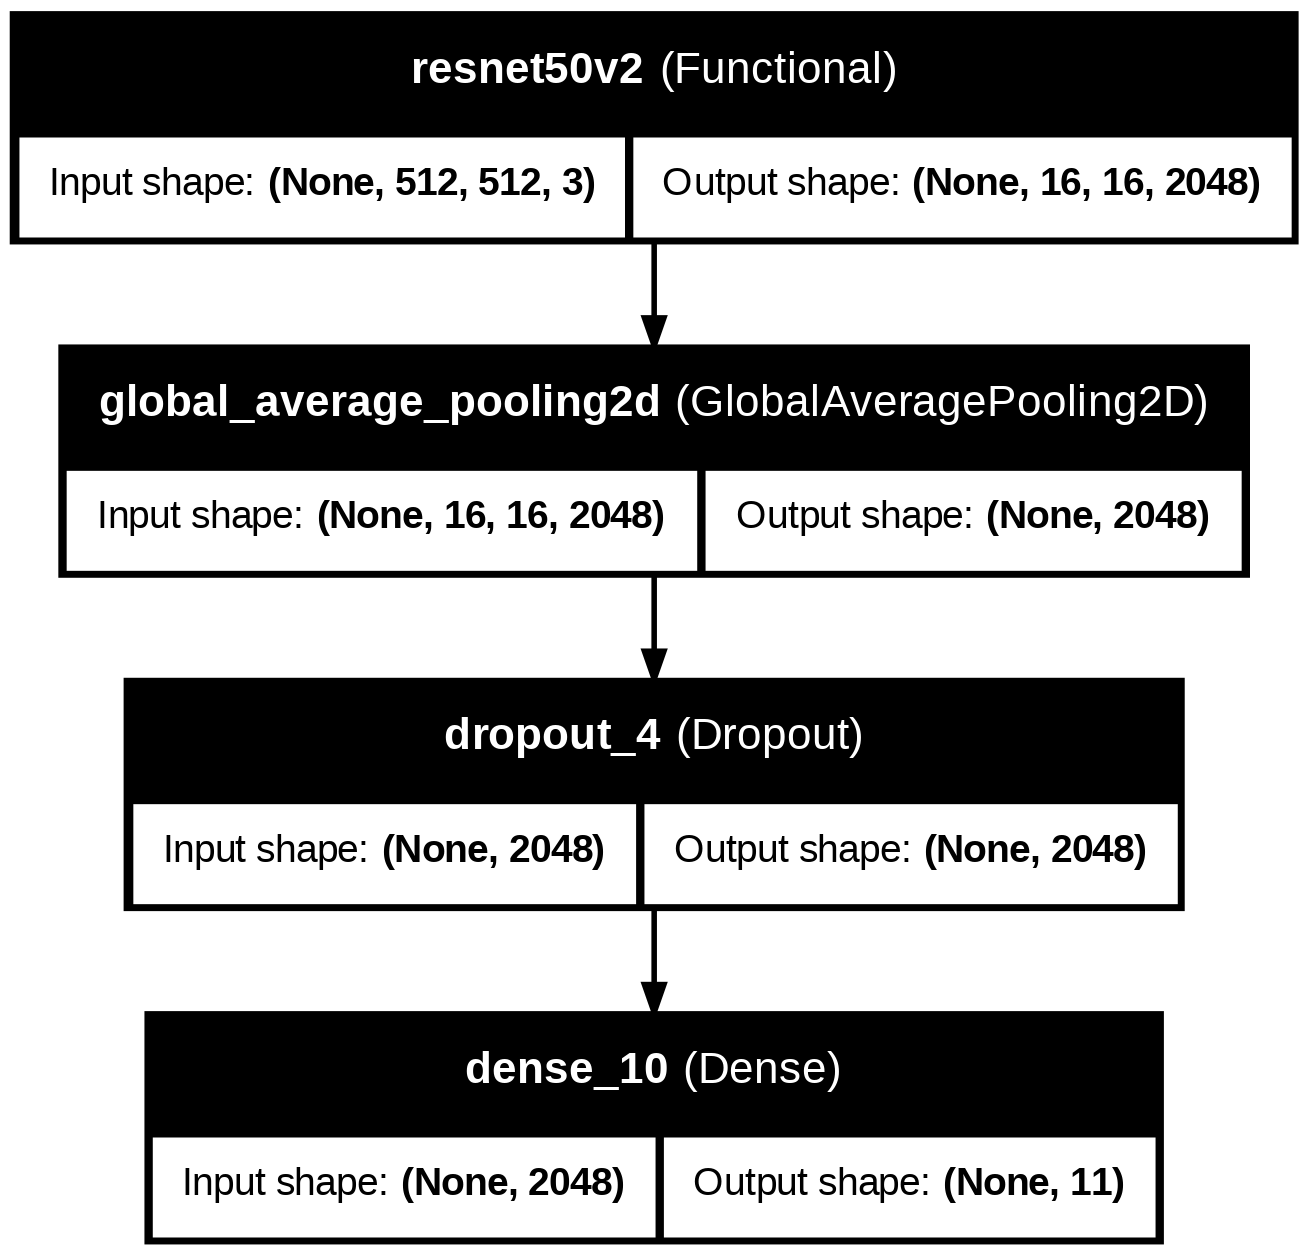

In [ ]:
!pip install pydot graphviz
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Load your model as before
model_path = '/content/drive/MyDrive/resnet50v2_final44_model.h5'
model = tf.keras.models.load_model(model_path)

# Save the model summary to a file
tf.keras.utils.plot_model(model, to_file='model_summary_Restnet.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
Image(filename='model_summary_Restnet.png')

In [ ]:
# Reload the best model from training (if using ModelCheckpoint)
model = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5')
print("✅ Loaded best saved model for evaluation")

# Predict again
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
print(report)

# Save report
with open('/content/drive/MyDrive/resnet50v2_final44_classification_report.txt', 'w') as f:
    f.write(report)


✅ Loaded best saved model for evaluation
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
              precision    recall  f1-score   support

   beyaynetu     0.8710    0.9643    0.9153        28
   chechebsa     0.6250    0.5556    0.5882         9
    doro_wat     0.8824    0.8333    0.8571        18
      firfir     0.9167    0.6875    0.7857        16
       genfo     0.9375    0.8333    0.8824        18
       kikil     0.8571    1.0000    0.9231         6
       kitfo     0.8000    0.9091    0.8511        22
 shekla_tibs     1.0000    1.0000    1.0000        15
   shiro_wat     0.6667    0.8000    0.7273        10
       tihlo     1.0000    1.0000    1.0000         3
   tire_siga     1.0000    0.8889    0.9412         9

    accuracy                         0.8636       154
   macro avg     0.8688    0.8611    0.8610       154
weighted avg     0.8691    0.8636    0.8624       154



5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step


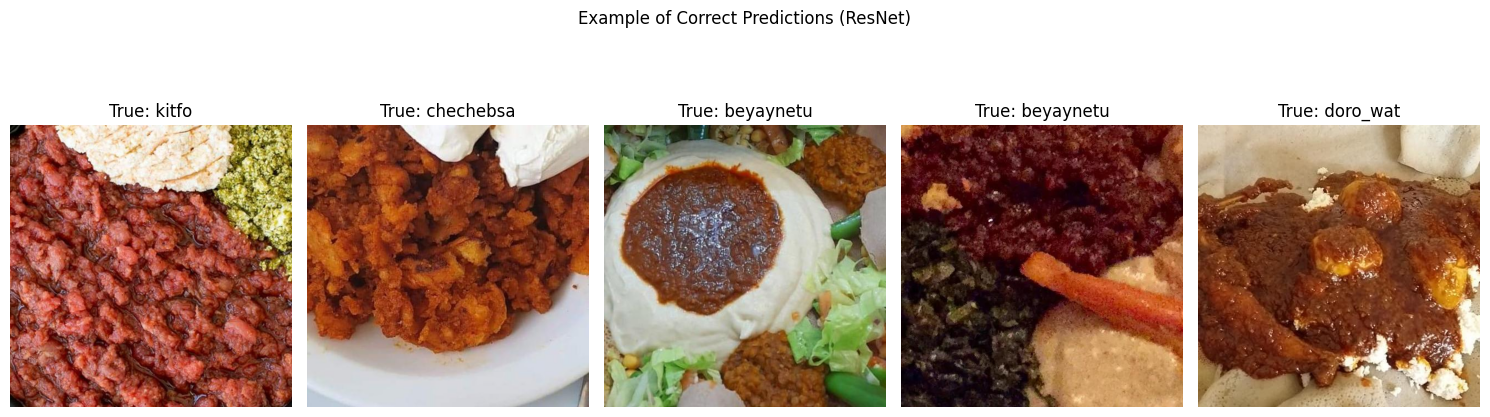

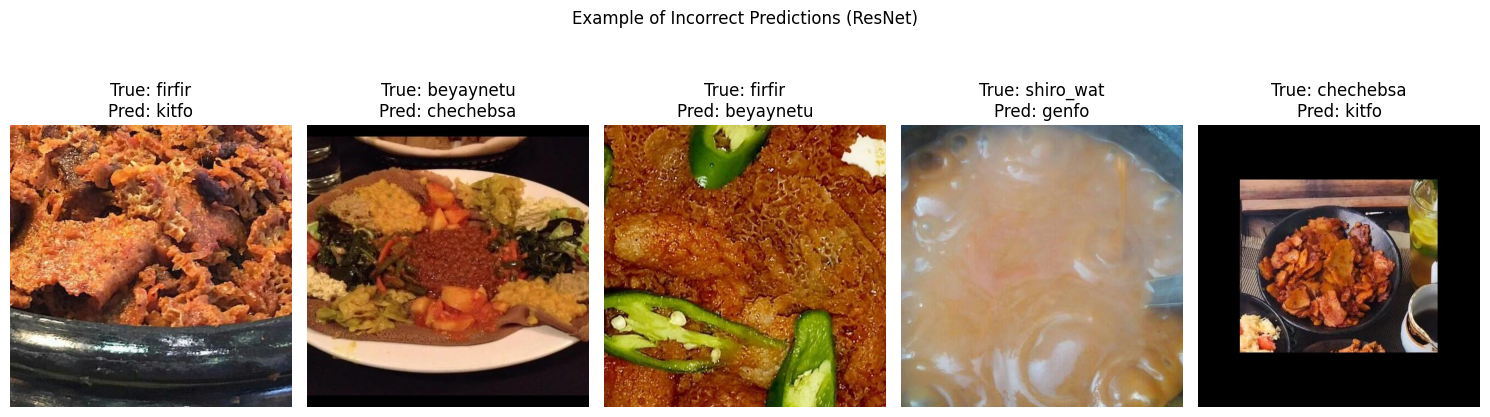

In [ ]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Predict with ResNet model, but use `model` instead of `model_resnet`
y_pred_resnet = np.argmax(model.predict(test_generator, verbose=1), axis=1) # changed `model_resnet` to `model`

# 2. Get filenames and directory
filenames = test_generator.filenames
directory = test_generator.directory

# ----> Get true labels from the test generator <----
y_true = test_generator.classes # Added this line

# 3. Find correct and incorrect predictions
correct = np.where(y_true == y_pred_resnet)[0]
incorrect = np.where(y_true != y_pred_resnet)[0]

# 4. Plot Correct Predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random.sample(list(correct), 5)):
    img_path = os.path.join(directory, filenames[idx])
    img = plt.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {list(test_generator.class_indices.keys())[y_true[idx]]}")
    plt.axis('off')
plt.suptitle("Example of Correct Predictions (ResNet)")
plt.tight_layout()
plt.show()

# 5. Plot Incorrect Predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random.sample(list(incorrect), 5)):
    img_path = os.path.join(directory, filenames[idx])
    img = plt.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {list(test_generator.class_indices.keys())[y_true[idx]]}\nPred: {list(test_generator.class_indices.keys())[y_pred_resnet[idx]]}")
    plt.axis('off')
plt.suptitle("Example of Incorrect Predictions (ResNet)")
plt.tight_layout()
plt.show()

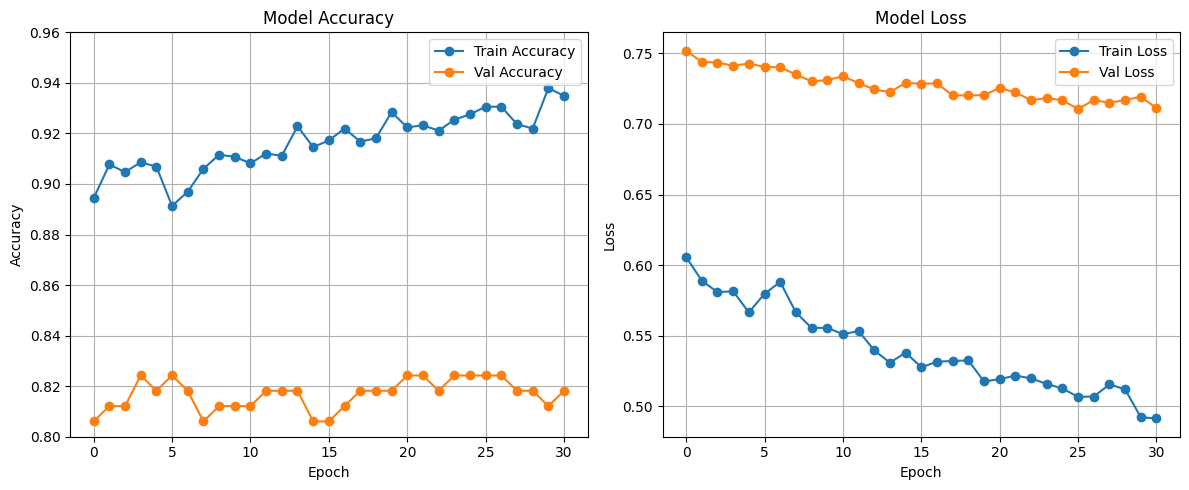

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.80, 0.96)
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step


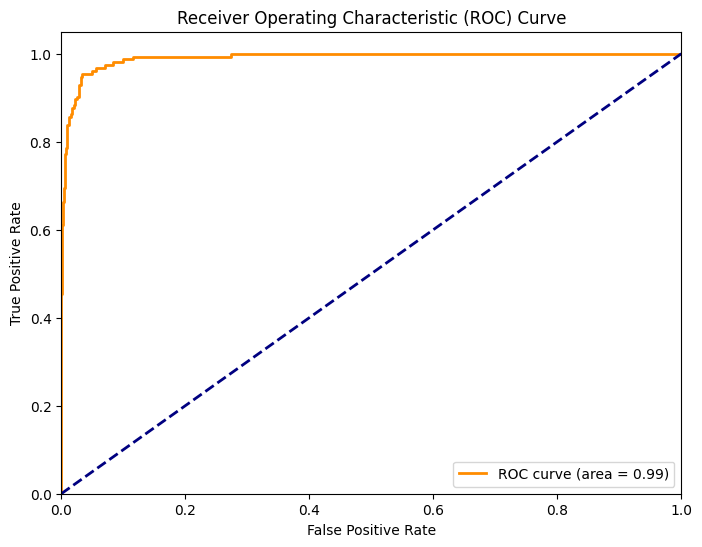

In [ ]:
# ============ ROC CURVE (optional) ============

# If you want to generate an ROC Curve for multi-class classification:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get true labels from test_generator
y_true = test_generator.classes  # <--- Add this line to define y_true

# Get class names (this was missing)
class_names = list(test_generator.class_indices.keys())

# Binarize the labels
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
y_pred_bin = model.predict(test_generator)

fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('roc_curve_resnet50v2.png', dpi=300)
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 578ms/step


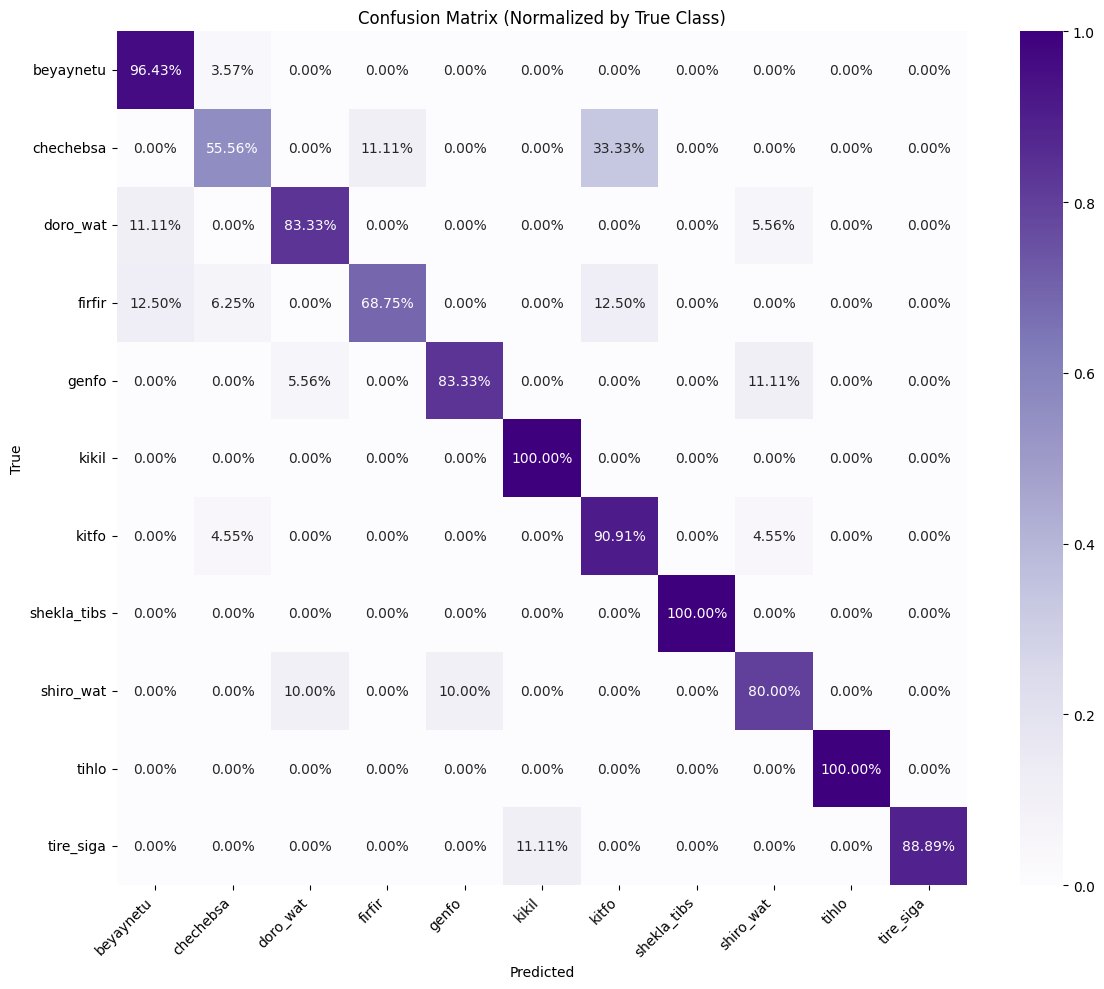

In [ ]:
# Confusion matrix (normalized)
from sklearn.metrics import confusion_matrix # Import the function here
import seaborn as sns  # You likely have this already

test_generator.reset()
y_true = test_generator.classes
y_pred_proba = model.predict(test_generator)
y_pred = np.argmax(y_pred_proba, axis=1)

cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Purples",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Normalized by True Class)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_resnet50v2.png', dpi=300)
plt.show()

In [ ]:
# ============ CLASSIFICATION REPORT ============
from sklearn.metrics import classification_report  # Add import here
import numpy as np # Make sure numpy is imported

# Get Predictions First
test_generator.reset()  # Reset the test_generator to start from the beginning
y_true = test_generator.classes
y_pred_proba = model.predict(test_generator)
y_pred = np.argmax(y_pred_proba, axis=1) # Get the class predictions

# Print classification report
print("\nClassification Report (After ResNet50V2 Fix):")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step

Classification Report (After ResNet50V2 Fix):
              precision    recall  f1-score   support

   beyaynetu     0.8710    0.9643    0.9153        28
   chechebsa     0.6250    0.5556    0.5882         9
    doro_wat     0.8824    0.8333    0.8571        18
      firfir     0.9167    0.6875    0.7857        16
       genfo     0.9375    0.8333    0.8824        18
       kikil     0.8571    1.0000    0.9231         6
       kitfo     0.8000    0.9091    0.8511        22
 shekla_tibs     1.0000    1.0000    1.0000        15
   shiro_wat     0.6667    0.8000    0.7273        10
       tihlo     1.0000    1.0000    1.0000         3
   tire_siga     1.0000    0.8889    0.9412         9

    accuracy                         0.8636       154
   macro avg     0.8688    0.8611    0.8610       154
weighted avg     0.8691    0.8636    0.8624       154



In [ ]:
# Top-2 accuracy
y_probs = model.predict(test_generator)
top2 = np.sum([y_true[i] in np.argsort(y_probs[i])[-2:] for i in range(len(y_true))])
top2_accuracy = top2 / len(y_true)
print(f"\nTop-2 Accuracy: {top2_accuracy:.2%}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step

Top-2 Accuracy: 96.10%


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step
              precision  recall  f1-score   support
beyaynetu        0.8710  0.9643    0.9153   28.0000
chechebsa        0.6250  0.5556    0.5882    9.0000
doro_wat         0.8824  0.8333    0.8571   18.0000
firfir           0.9167  0.6875    0.7857   16.0000
genfo            0.9375  0.8333    0.8824   18.0000
kikil            0.8571  1.0000    0.9231    6.0000
kitfo            0.8000  0.9091    0.8511   22.0000
shekla_tibs      1.0000  1.0000    1.0000   15.0000
shiro_wat        0.6667  0.8000    0.7273   10.0000
tihlo            1.0000  1.0000    1.0000    3.0000
tire_siga        1.0000  0.8889    0.9412    9.0000
accuracy         0.8636  0.8636    0.8636    0.8636
macro avg        0.8688  0.8611    0.8610  154.0000
weighted avg     0.8691  0.8636    0.8624  154.0000


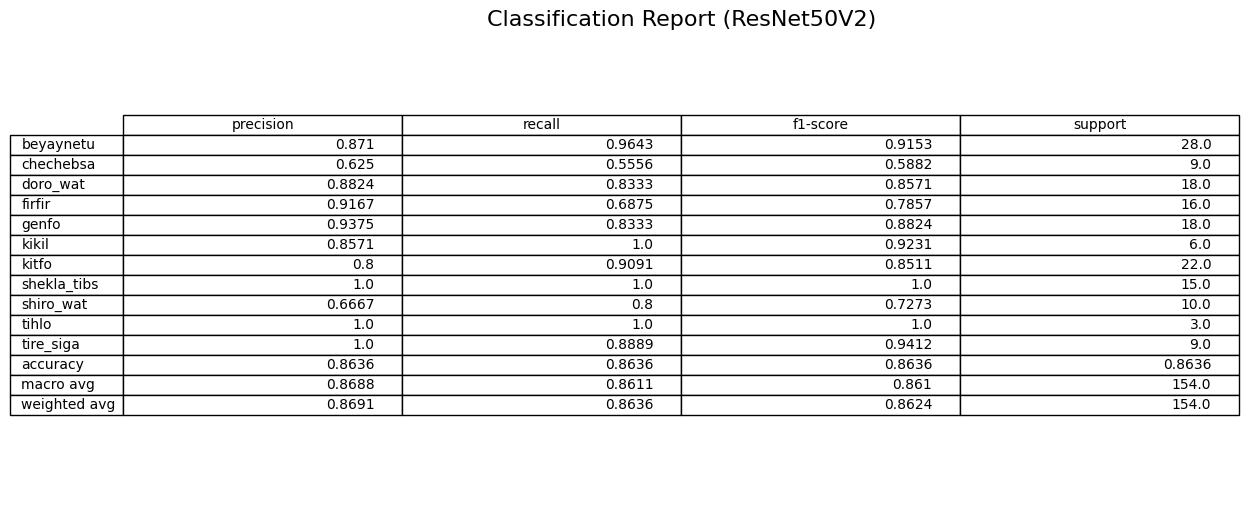

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# --- Get Predictions Again (if needed) ---
test_generator.reset()
y_true = test_generator.classes
y_pred_resnet = model.predict(test_generator).argmax(axis=1)

# --- Create Classification Report Dictionary ---
report_dict_resnet = classification_report(
    y_true,
    y_pred_resnet,
    target_names=class_names,
    output_dict=True,
    digits=4
)

# --- Convert to DataFrame ---
report_df_resnet = pd.DataFrame(report_dict_resnet).transpose()

# --- Optional: Round Numbers ---
report_df_resnet = report_df_resnet.round(4)

# --- Display the table ---
print(report_df_resnet)

# --- Save to CSV (optional if you want it) ---
report_df_resnet.to_csv('classification_report_resnet.csv')

# --- Save the Table as Image ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df_resnet.values,
                 colLabels=report_df_resnet.columns,
                 rowLabels=report_df_resnet.index,
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Classification Report (ResNet50V2)', fontsize=16)
plt.savefig('classification_report_resnet_table.png', dpi=300, bbox_inches='tight')  # <-- SAVE as image
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 136s 26s/step


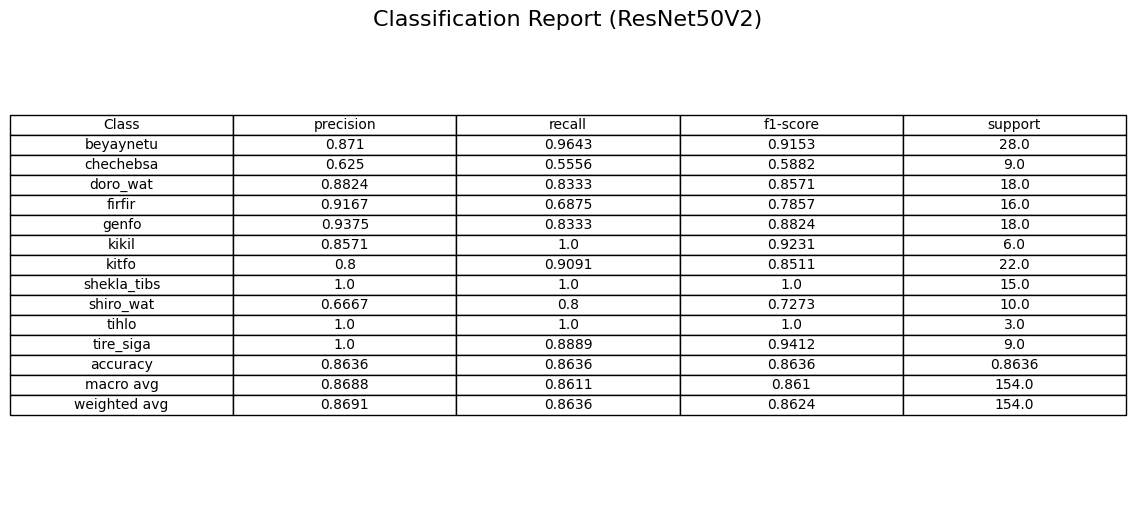

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# --- Load the model again ---
resnet_model = load_model('/content/drive/MyDrive/resnet50v2_final4_model.h5')

# --- Predict again ---
test_generator.reset()
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())
y_pred_resnet = resnet_model.predict(test_generator, verbose=1).argmax(axis=1)

# --- Create classification report dictionary ---
report_dict_resnet = classification_report(
    y_true,
    y_pred_resnet,
    target_names=class_names,
    output_dict=True,
    digits=4
)

# --- Convert to DataFrame ---
report_df_resnet = pd.DataFrame(report_dict_resnet).transpose()
report_df_resnet = report_df_resnet.round(4)

# --- Reorder columns (optional for consistency) ---
desired_order = ['precision', 'recall', 'f1-score', 'support']
report_df_resnet = report_df_resnet[desired_order]

# --- Build full table data including "Class" in top-left ---
table_data = []

# First row: header row with "Class" in top-left
header = ["Class"] + report_df_resnet.columns.tolist()
table_data.append(header)

# Remaining rows: each class row
for idx, row_name in enumerate(report_df_resnet.index):
    row = [row_name] + report_df_resnet.iloc[idx].tolist()
    table_data.append(row)

# --- Save table as image ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Classification Report (ResNet50V2)', fontsize=16)
plt.savefig('classification_report_resnet_table.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Predict on test data
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Get true labels
y_true = test_generator.classes

# 3. Get class labels from generator
class_labels = list(test_generator.class_indices.keys())

# 4. Generate classification report
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 5. Format the dataframe
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Class'}, inplace=True)

numeric_cols = report_df.columns.difference(['Class'])
report_df[numeric_cols] = report_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
report_df[numeric_cols] = report_df[numeric_cols].round(4)

# 6. Visualize as a table
plt.figure(figsize=(12, 8))
plt.axis('off')

cell_text = report_df.values.astype(str)

tbl = plt.table(
    cellText=cell_text,
    colLabels=report_df.columns,
    rowLabels=None,
    cellLoc='center',
    loc='center',
    colColours=['#f0f0f0'] * len(report_df.columns)
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.title('Classification Report for ResNet50V2 Model', fontsize=14, pad=20)
plt.tight_layout()

# Save and show
plt.savefig('/content/drive/MyDrive/resnet50v2_classification_report.png',
            dpi=300,
            bbox_inches='tight')
plt.show()
plt.close()


NameError: name 'model' is not defined

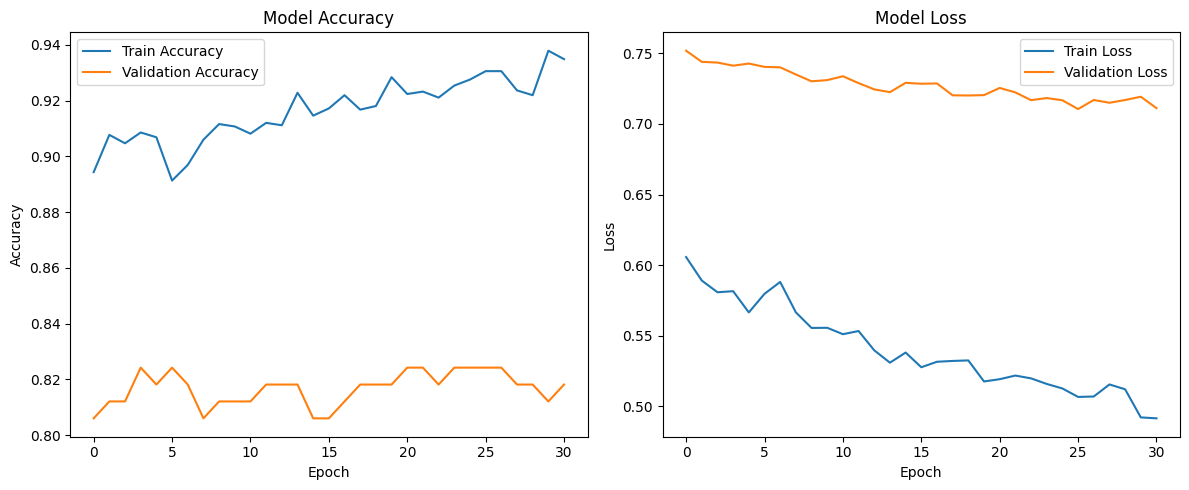

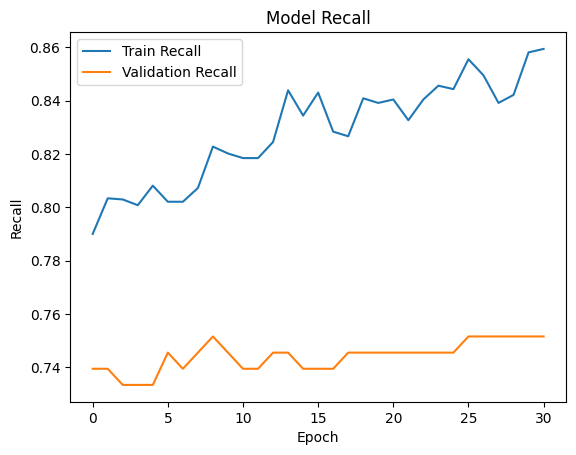

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Recall plot
if 'recall' in history.history:
    plt.figure()
    plt.plot(history.history['recall'], label='Train Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('accuracy_loss_curves.png', dpi=300)  # Save the accuracy and loss plot
plt.close()

# Optional: Recall plot
if 'recall' in history.history:
    plt.figure()
    plt.plot(history.history['recall'], label='Train Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.savefig('recall_curve.png', dpi=300)  # Save the recall plot
    plt.close()

# Confusion Matrix Plot (if already calculated)
sns.heatmap(
    confusion_matrix(y_true, y_pred) / confusion_matrix(y_true, y_pred).sum(axis=1)[:, np.newaxis],
    annot=True, fmt=".2%", cmap="Purples",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix (Normalized by True Class)", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)  # Save confusion matrix plot
plt.close()

# ROC Curve Plot (if applicable)
# Assuming you have already calculated the ROC curve for each class
# plot_roc_curve(y_true, y_pred) # Replace this with actual code for ROC curve if needed.
plt.figure(figsize=(8, 6))
# Assuming ROC curve plot is created here (You can use sklearn or keras to plot it)
plt.title('Multi-Class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('multi_class_roc_curve.png', dpi=300)  # Save ROC curve plot
plt.close()


In [ ]:
# --- Learning Rate Curve for ResNet50V2 ---
plt.figure(figsize=(8, 6))

# Access learning rate using 'learning_rate' instead of 'lr'
# If 'learning_rate' is not present, fall back to the current model's learning rate
plt.plot(history.history.get('learning_rate', [model.optimizer.learning_rate.numpy()] * len(history.history['loss'])),
         label='Learning Rate')

plt.title('Learning Rate Schedule (ResNet50V2)')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.savefig('learning_rate_curve_resnet.png', dpi=300)  # Save the plot
plt.close()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.title('Accuracy and Recall Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_recall_curves.png', dpi=300)
plt.close()


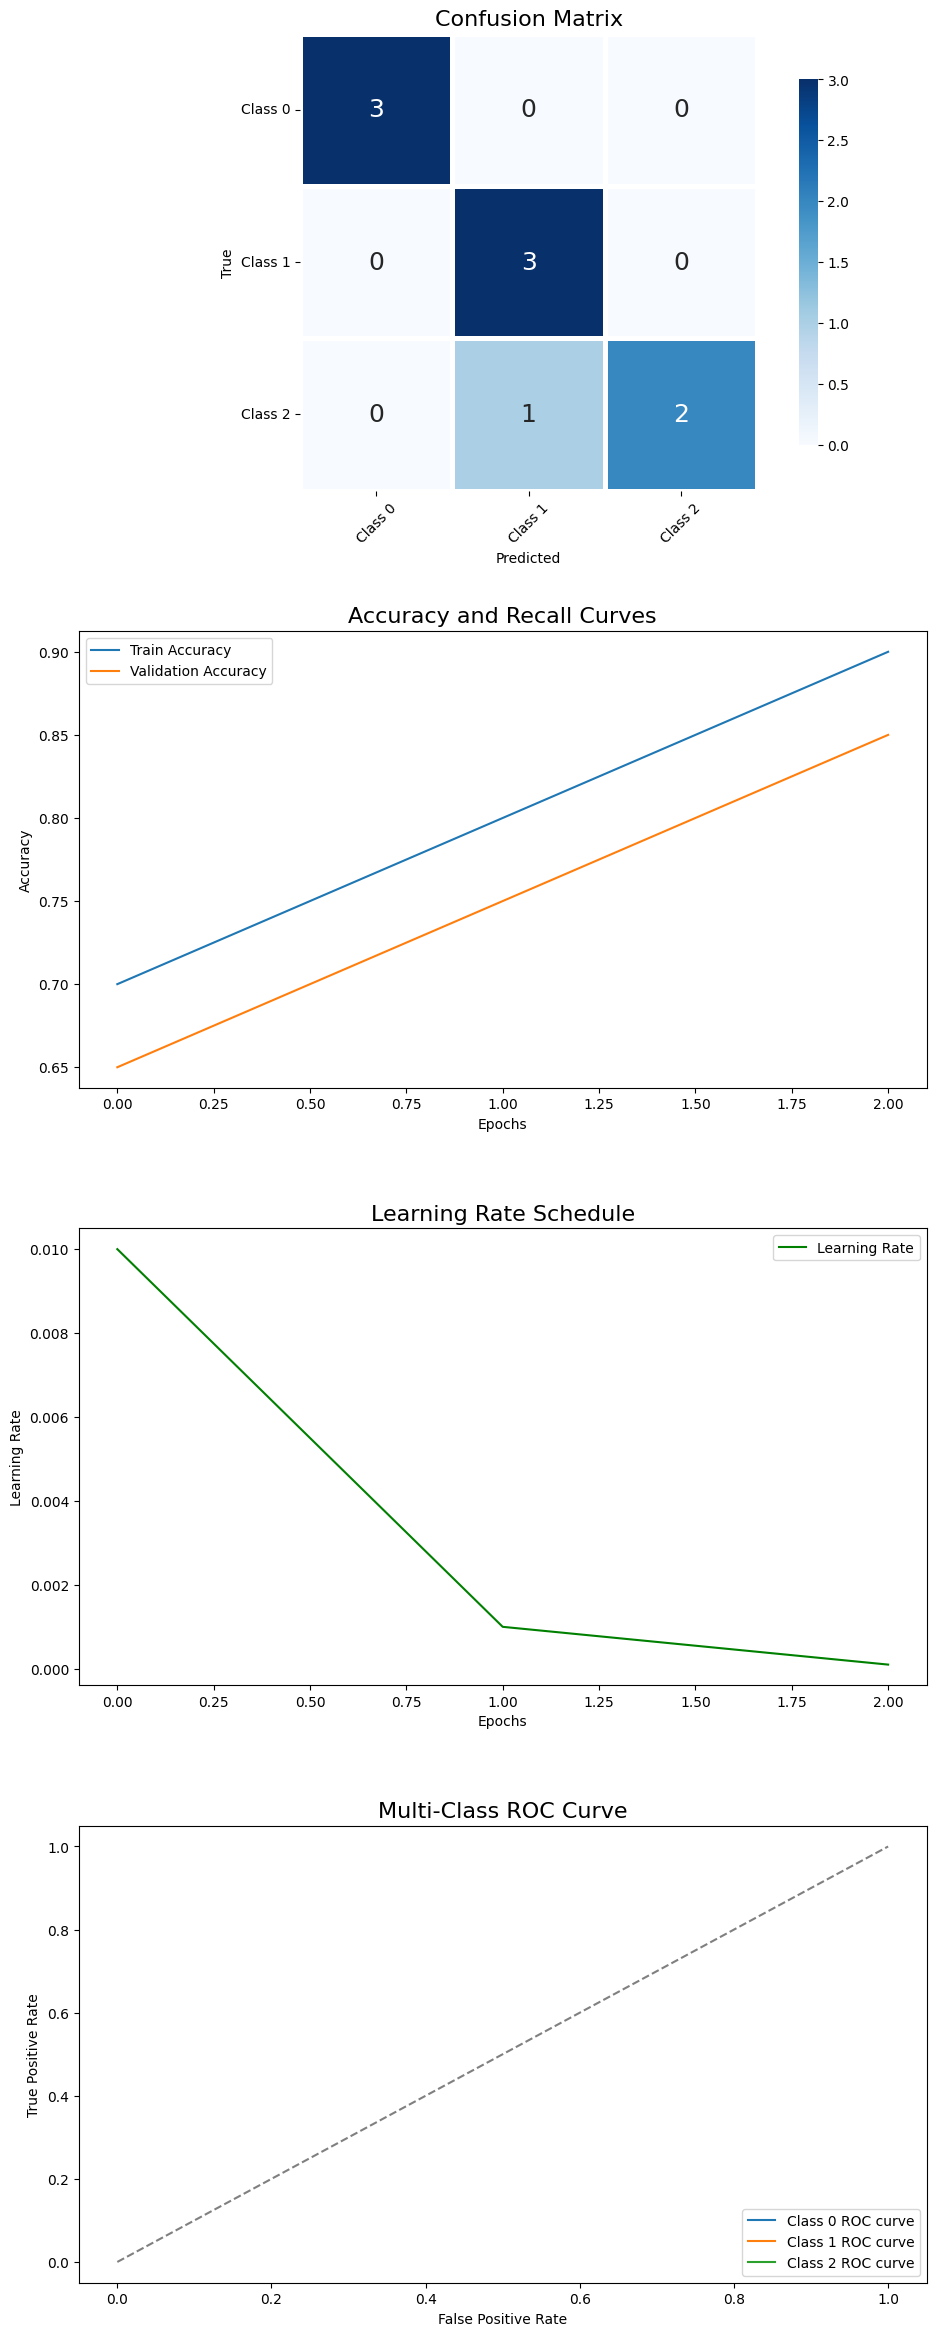

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Example confusion matrix (replace with actual values)
y_true = np.array([0, 1, 2, 0, 1, 2, 1, 0, 2])
y_pred = np.array([0, 1, 1, 0, 1, 2, 1, 0, 2])
class_names = ['Class 0', 'Class 1', 'Class 2']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# --- Multi-Class ROC Curve Calculation ---
# Binarize the labels for multi-class ROC (one-hot encoding)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Initialize a figure for plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 24))  # Adjusted figsize

# --- Confusion Matrix ---
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    annot_kws={"size": 18},  # Increase font size in cells
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    linewidths=2.5,  # Increase line width between cells
    linecolor='white',  # Change line color for clearer separation
    xticklabels=class_names, yticklabels=class_names,
    square=True,  # Keep the matrix square for symmetry
    cbar=True,  # Show color bar
    vmin=0, vmax=np.max(cm),  # Ensure proper scaling of color bar
    ax=axs[0]
)

axs[0].set_title('Confusion Matrix', fontsize=16)
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better visibility
axs[0].tick_params(axis='y', rotation=0)  # No rotation for y-tick labels
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

# --- Accuracy and Recall Curves ---
history = {
    'accuracy': [0.7, 0.8, 0.9],
    'val_accuracy': [0.65, 0.75, 0.85],
    'recall': [0.6, 0.7, 0.8],
    'val_recall': [0.55, 0.65, 0.75]
}

axs[1].plot(history['accuracy'], label='Train Accuracy')
axs[1].plot(history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy and Recall Curves', fontsize=16)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# --- Learning Rate Curve ---
learning_rate = [0.01, 0.001, 0.0001]
axs[2].plot(learning_rate, label='Learning Rate', color='green')
axs[2].set_title('Learning Rate Schedule', fontsize=16)
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Learning Rate')
axs[2].legend()

# --- Multi-Class ROC Curve ---
# Calculate ROC curve for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())

# Plot the ROC curve for each class
for i in range(y_true_bin.shape[1]):
    axs[3].plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')

# Plot the diagonal line (chance line)
axs[3].plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the ROC plot
axs[3].set_title('Multi-Class ROC Curve', fontsize=16)
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].legend()

# Adjust layout to avoid overlap and make sure everything fits well
plt.tight_layout(pad=3.0)  # Added pad to ensure spacing between plots
plt.show()


learning_rate_curve.png

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load history from CSV
history = pd.read_csv('/content/drive/MyDrive/resnet50v2_training4_history.csv')

# 2. Check if 'learning_rate' is in the history
if 'learning_rate' in history.columns:
    learning_rates = history['learning_rate']
else:
    # If not explicitly tracked, assume it was constant
    learning_rates = [model.optimizer.lr.numpy()] * len(history['loss'])

# 3. Plot learning rate curve
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, label='Learning Rate')
plt.title('Learning Rate Schedule')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

4/5 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 148s 29s/step


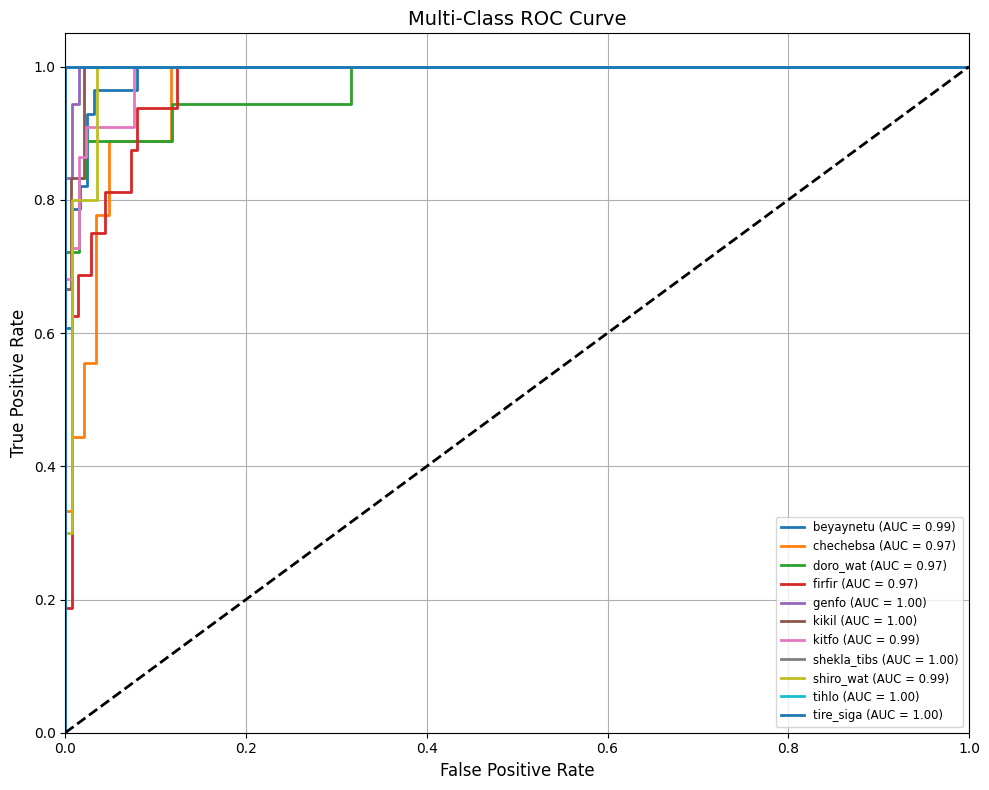

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# --- 1. Load the trained model ---
model = load_model('/content/drive/MyDrive/resnet50v2_final4_model.h5')
# --- 2. Load history from CSV ---
history = pd.read_csv('/content/drive/MyDrive/resnet50v2_training4_history.csv')
class_names = list(train_generator.class_indices.keys())

# --- 3. Re-run the prediction to get y_pred_proba ---
test_generator.reset()  # Reset the generator to the beginning
y_pred_proba = model.predict(test_generator)  # Get predictions

# Get true and predicted probabilities
y_score = y_pred_proba  # already predicted probs

# Get the true labels from the test generator
test_generator.reset()  # Reset again to be safe
y_true = test_generator.classes

# Binarize the true labels using the correct number of classes
y_test_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(plt.cm.tab10.colors)  # Use a color cycle for better visualization

for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,  # Line width for better visibility
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed line for random classifier
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate', fontsize=12)  # Increase font size
plt.ylabel('True Positive Rate', fontsize=12)  # Increase font size
plt.title('Multi-Class ROC Curve', fontsize=14)  # Increase font size
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/multi_class_roc_curve.png', dpi=300)
plt.show()

In [ ]:
from google.colab import files
# files.download('learning_rate_curve.png')
files.download('multi_class_roc_curve.png')
files.download('accuracy_recall_curves.png')
files.download('confusion_matrix.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Attention-Based Dynamic Ensemble

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load models
densenet_model = load_model('/content/drive/MyDrive/dense_final_model.h5')
resnet_model = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5')

# Build once with dummy input
dummy_input = np.zeros((1, 512, 512, 3), dtype=np.float32)
_ = densenet_model(dummy_input)
_ = resnet_model(dummy_input)

# Optional: check structure
densenet_model.summary()
resnet_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,698,509 (29.37 MB)

 Trainable params: 659,979 (2.52 MB)

 Non-trainable params: 7,038,528 (26.85 MB)

 Optimizer params: 2 (12.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 16, 16, 2048)   │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │        22,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,341 (89.98 MB)

 Trainable params: 22,539 (88.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# ✅ Inspect model summaries to find the last shared feature layer
densenet_model.summary()  # Look for 'global_average_pooling2d'
resnet_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,698,509 (29.37 MB)

 Trainable params: 659,979 (2.52 MB)

 Non-trainable params: 7,038,528 (26.85 MB)

 Optimizer params: 2 (12.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 16, 16, 2048)   │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │        22,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,341 (89.98 MB)

 Trainable params: 22,539 (88.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Concatenate, Dropout, Lambda

# Feature sizes
resnet_dim = 2048
densenet_dim = 1024
num_classes = 11

# Inputs for feature vectors
resnet_input = Input(shape=(resnet_dim,), name="resnet_feat")
densenet_input = Input(shape=(densenet_dim,), name="densenet_feat")

# Concatenate features
concat = Concatenate()([resnet_input, densenet_input])  # Shape: (None, 3072)

# Attention MLP → 2 weights → softmax
attention_logits = Dense(64, activation='relu')(concat)
attention_weights = Dense(2, activation='softmax', name="attention_weights")(attention_logits)

# Split weights
alpha = Lambda(lambda x: x[:, 0:1])(attention_weights)  # shape: (None, 1)
beta  = Lambda(lambda x: x[:, 1:2])(attention_weights)

# Apply weights
weighted_resnet  = Lambda(lambda x: x[0] * x[1])([resnet_input, alpha])
weighted_densenet = Lambda(lambda x: x[0] * x[1])([densenet_input, beta])

# Combine
fused = Concatenate()([weighted_resnet, weighted_densenet])  # (None, 3072)

# Classifier Head
x = Dense(256, activation='relu')(fused)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax', name='output')(x)

# Build final model
attention_model = Model(inputs=[resnet_input, densenet_input], outputs=output)
attention_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)]
)

attention_model.summary()
attention_model.save('/content/drive/MyDrive/single_attention_shared_model.h5')
print("✅ Shared attention model saved successfully.")


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ resnet_feat         │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet_feat       │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3072)      │          0 │ resnet_feat[0][0… │
│ (Concatenate)       │                   │            │ densenet_feat[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    196,672 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weights   │ (None, 2)         │        130 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1)         │          0 │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 1)         │          0 │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 2048)      │          0 │ resnet_feat[0][0… │
│                     │                   │            │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 1024)      │          0 │ densenet_feat[0]… │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 3072)      │          0 │ lambda_2[0][0],   │
│ (Concatenate)       │                   │            │ lambda_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    786,688 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 11)        │      2,827 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 986,317 (3.76 MB)

 Trainable params: 986,317 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def extract_features(feature_model, generator):
    features = []
    labels = []

    for i in range(len(generator)):
        x_batch, y_batch = generator[i]
        feat_batch = feature_model.predict(x_batch, verbose=0)
        features.append(feat_batch)
        labels.append(y_batch)

    return np.vstack(features), np.vstack(labels)


In [ ]:
print(densenet_model.summary())
print(resnet_model.summary())


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,698,509 (29.37 MB)

 Trainable params: 659,979 (2.52 MB)

 Non-trainable params: 7,038,528 (26.85 MB)

 Optimizer params: 2 (12.00 B)

None


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 16, 16, 2048)   │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │        22,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,341 (89.98 MB)

 Trainable params: 22,539 (88.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
import numpy as np
from tensorflow.keras.models import Model

def extract_features(model, generator):
    features = []
    labels = []
    for _ in range(len(generator)):
        x_batch, y_batch = next(generator)
        feat = model.predict(x_batch)
        features.append(feat)
        labels.append(y_batch)
    features = np.vstack(features)
    labels = np.vstack(labels)
    return features, labels

# Create dummy input (adjust size as per your actual input)
dummy_input = np.zeros((1, 512, 512, 3), dtype=np.float32)

# Build your top-level models once (to initialize)
densenet_model(dummy_input)
resnet_model(dummy_input)

# Extract inner models (assuming inner model is first layer in Sequential or functional wrapper)
inner_densenet = densenet_model.layers[0]
inner_resnet = resnet_model.layers[0]

# Build inner models by calling on dummy input
inner_densenet(dummy_input)
inner_resnet(dummy_input)

# Use entire inner model outputs as features (no layer selection)
densenet_feature_model = Model(
    inputs=inner_densenet.input,
    outputs=inner_densenet.output
)

resnet_feature_model = Model(
    inputs=inner_resnet.input,
    outputs=inner_resnet.output
)
densenet_feature_model.save('/content/drive/MyDrive/densenet_feature_model_fin.h5')
print("[INFO] Final model saved!")

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

inner_resnet = resnet_model.layers[0]
dummy_input = np.zeros((1, 512, 512, 3), dtype=np.float32)
inner_resnet(dummy_input)

# Add pooling layer
resnet_output = inner_resnet.output
resnet_output = GlobalAveragePooling2D()(resnet_output)

resnet_feature_model = Model(
    inputs=inner_resnet.input,
    outputs=resnet_output
)

resnet_feature_model.save('/content/drive/MyDrive/resnet_feature_model_fin.h5')
print("[INFO] Final model saved!")

In [ ]:
# DenseNet features
densenet_train, y_train = extract_features(densenet_feature_model, train_generator)
densenet_val, y_val = extract_features(densenet_feature_model, val_generator)

# ResNet features
resnet_train, _ = extract_features(resnet_feature_model, train_generator)
resnet_val, _ = extract_features(resnet_feature_model, val_generator)

np.save('resnet_train.npy', resnet_train)
np.save('densenet_train.npy', densenet_train)
np.save('y_train.npy', y_train)
np.save('resnet_val.npy', resnet_val)
np.save('densenet_val.npy', densenet_val)
np.save('y_val.npy', y_val)

# np.load()

1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 46s 46s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━

In [ ]:
import numpy as np

# Concatenate DenseNet and ResNet features
X_train = np.concatenate([densenet_train, resnet_train], axis=1)
X_val = np.concatenate([densenet_val, resnet_val], axis=1)

# Convert one-hot labels to class indices
y_train = np.argmax(y_train, axis=1)
y_val = np.argmax(y_val, axis=1)


single shared attention weights

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

attention_model.fit(
    x=[resnet_train, densenet_train],
    y=tf.keras.utils.to_categorical(y_train, num_classes=11),
    validation_data=([resnet_val, densenet_val], tf.keras.utils.to_categorical(y_val, num_classes=11)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)
attention_model.save('/content/drive/MyDrive/single1_attention_shared_model_trained.h5')
print("✅ Trained model saved successfully!")

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2028 - loss: 2.2352 - top_k_categorical_accuracy: 0.3456 - val_accuracy: 0.4970 - val_loss: 1.8246 - val_top_k_categorical_accuracy: 0.6485
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5225 - loss: 1.7173 - top_k_categorical_accuracy: 0.6766 - val_accuracy: 0.6121 - val_loss: 1.4831 - val_top_k_categorical_accuracy: 0.7939
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6550 - loss: 1.4033 - top_k_categorical_accuracy: 0.7938 - val_accuracy: 0.6909 - val_loss: 1.2445 - val_top_k_categorical_accuracy: 0.8242
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7309 - loss: 1.1318 - top_k_categorical_accuracy: 0.8579 - val_accuracy: 0.7394 - val_loss: 1.0693 - val_top_k_categorical_accuracy: 0.8727
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7683 - loss: 0.9729 - top_k_categorical_accuracy: 0.8885 - val_accuracy: 0.7576 - val_loss: 0.9692 - val_top_k_cate

✅ Trained model saved successfully!


In [ ]:
# Prepare test data
densenet_test, y_test = extract_features(densenet_feature_model, test_generator)
resnet_test, _ = extract_features(resnet_feature_model, test_generator)

# Predict
test_preds = attention_model.predict([resnet_test, densenet_test])
y_pred_classes = np.argmax(test_preds, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Save attention model after training
attention_model.save('/content/drive/MyDrive/singletest_attention_model.h5')
print("✅ Attention model saved successfully.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Test Accuracy: 0.922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.86      0.67      0.75         9
           2       0.94      0.89      0.91        18
           3       0.82      0.88      0.85        16
           4       0.89      0.94      0.92        18
           5       0.75      1.00      0.86         6
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        15
           8       0.89      0.80      0.84        10
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         9

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.91       154
weighted avg       0.92      0.92      0.92       154

✅ Attention model saved successfully.


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/singletest_attention_model.h5')
model.export("/content/drive/MyDrive/eth_food_model")


Saved artifact at '/content/drive/MyDrive/eth_food_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 2048), dtype=tf.float32, name='resnet_feat'), TensorSpec(shape=(None, 1024), dtype=tf.float32, name='densenet_feat')]
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  138782031995408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782031996944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782031996752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782031997520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782031997136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782031997904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782031996176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138782031998672: TensorSpec(shape=(), dtype=tf.resource, name=None)


✅ Attention model loaded successfully.


✅ Feature models loaded successfully.


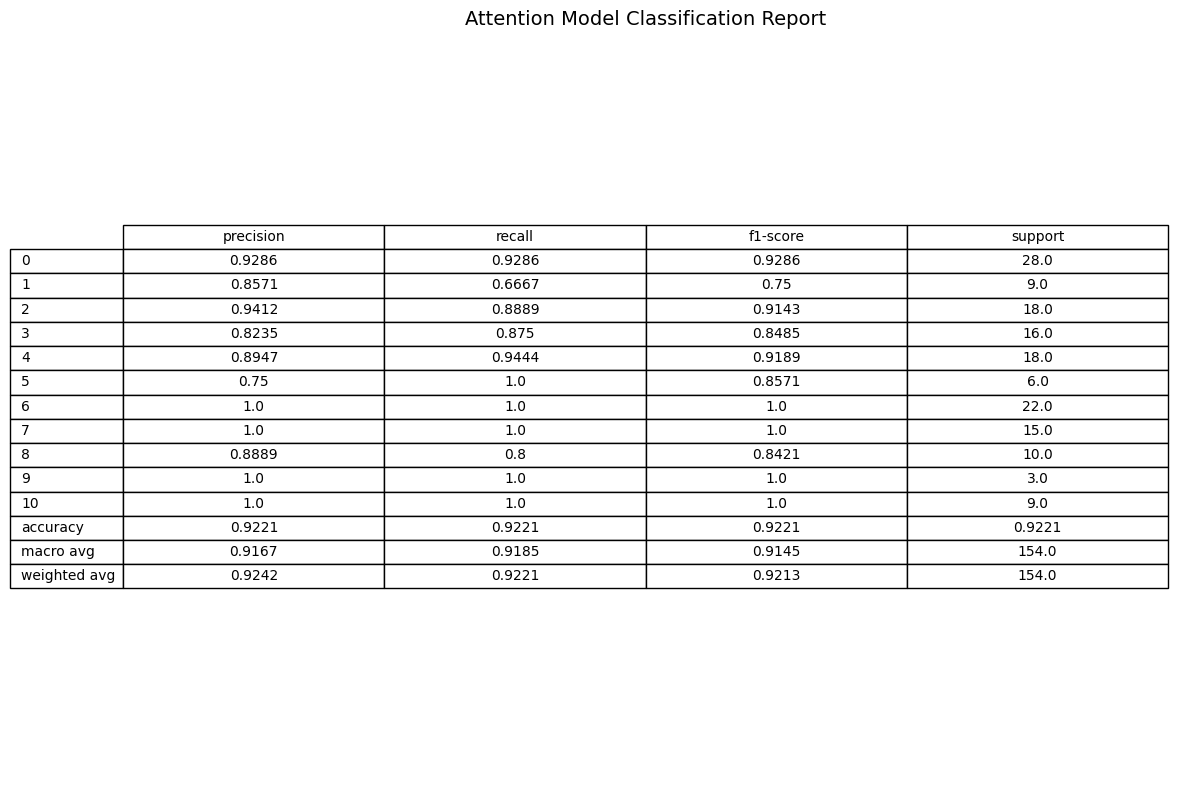

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Step 1: Reload trained attention model
attention_model = load_model('/content/drive/MyDrive/singletest_attention_model.h5')
print("✅ Attention model loaded successfully.")

# Step 2: Reload saved feature models (DenseNet and ResNet feature extractors)
resnet_feature_model = load_model('/content/drive/MyDrive/resnet_feature_model_fin.h5')
densenet_feature_model = load_model('/content/drive/MyDrive/densenet_feature_model_fin.h5')
print("✅ Feature models loaded successfully.")

# Step 3: Redefine feature extraction function
def extract_features(model, generator):
    features = []
    labels = []
    for _ in range(len(generator)):
        x_batch, y_batch = next(generator)
        feat = model.predict(x_batch, verbose=0)
        features.append(feat)
        labels.append(y_batch)
    features = np.vstack(features)
    labels = np.vstack(labels)
    return features, labels

# Step 4: Extract features from test set
densenet_test, y_test = extract_features(densenet_feature_model, test_generator)
resnet_test, _ = extract_features(resnet_feature_model, test_generator)

# Step 5: Predict using attention model
test_preds = attention_model.predict([resnet_test, densenet_test], verbose=0)
y_pred_classes = np.argmax(test_preds, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Step 6: Generate classification report
attn_report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
attn_report_df = pd.DataFrame(attn_report).transpose()

# Step 7: Plot and save the classification report as a table
plt.figure(figsize=(12, 8))
plt.axis('off')
tbl = plt.table(cellText=np.round(attn_report_df.values, 4),
                colLabels=attn_report_df.columns,
                rowLabels=attn_report_df.index,
                cellLoc='center',
                loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title('Attention Model Classification Report', fontsize=14)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/attention_classification_report.png', dpi=300)
plt.show()
plt.close()


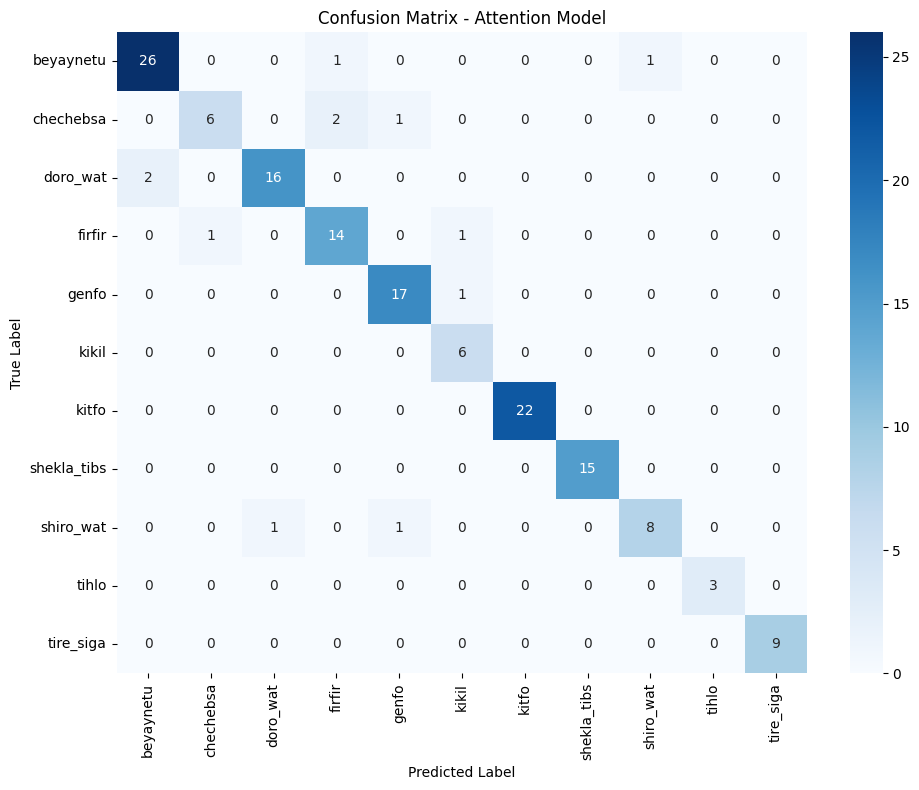

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Optional: Get class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Attention Model')
plt.tight_layout()

# Save and show
plt.savefig('/content/drive/MyDrive/attention_confusion_matrix.png', dpi=300)
plt.show()


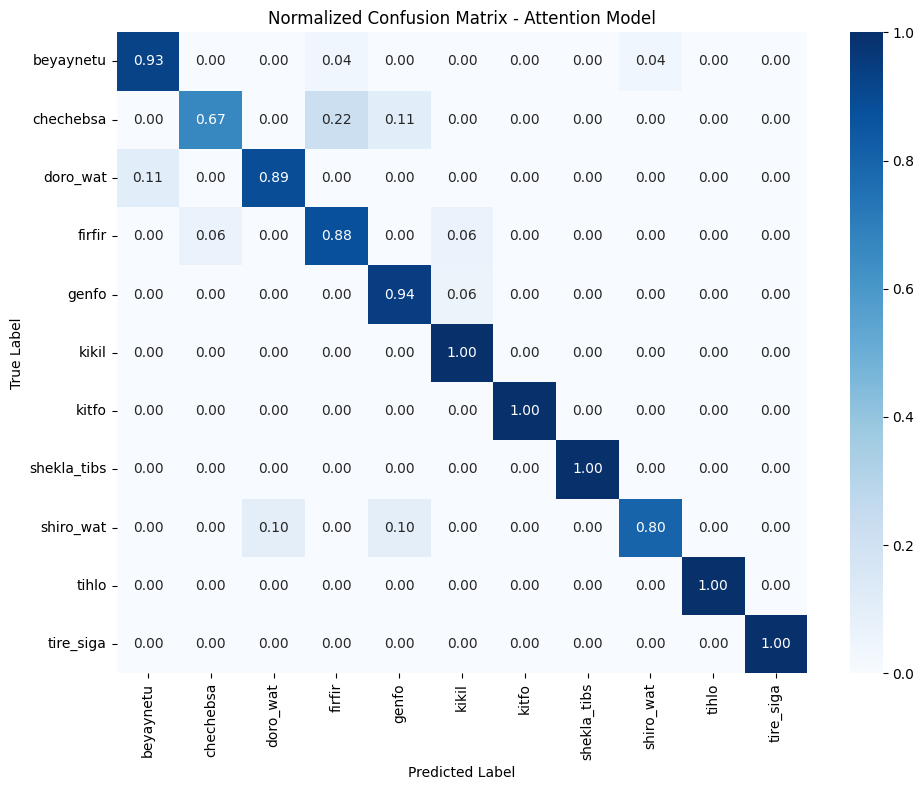

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Optional: Get class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Normalize the confusion matrix by row (true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix - Attention Model')
plt.tight_layout()

# Save and show
plt.savefig('/content/drive/MyDrive/attention_normalized_confusion_matrix.png', dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/attention_accuracy_curve.png', dpi=300)
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/attention_loss_curve.png', dpi=300)
plt.show()


NameError: name 'history' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/singletest_attention_model.h5')
model.save("/content/drive/MyDrive/full_eth_food_model.keras")


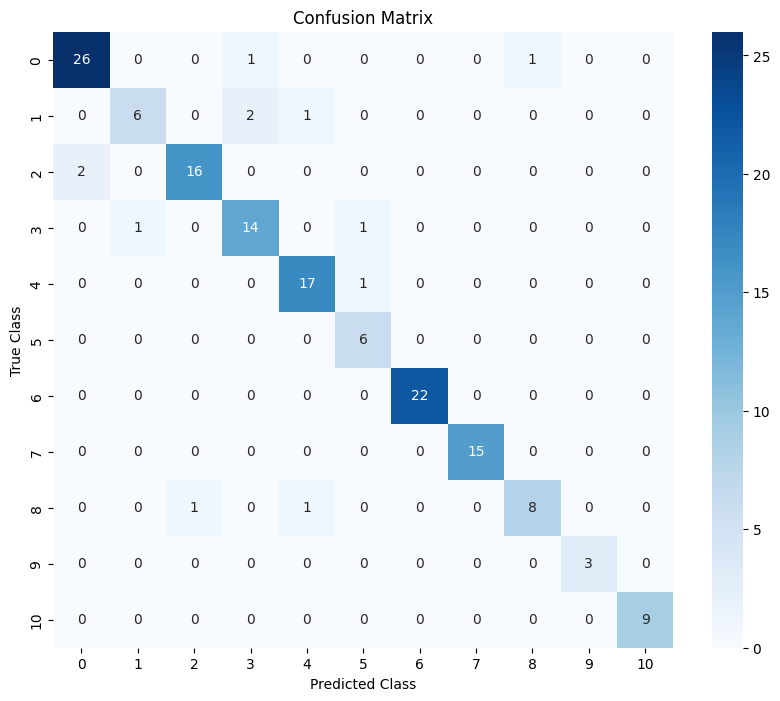

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


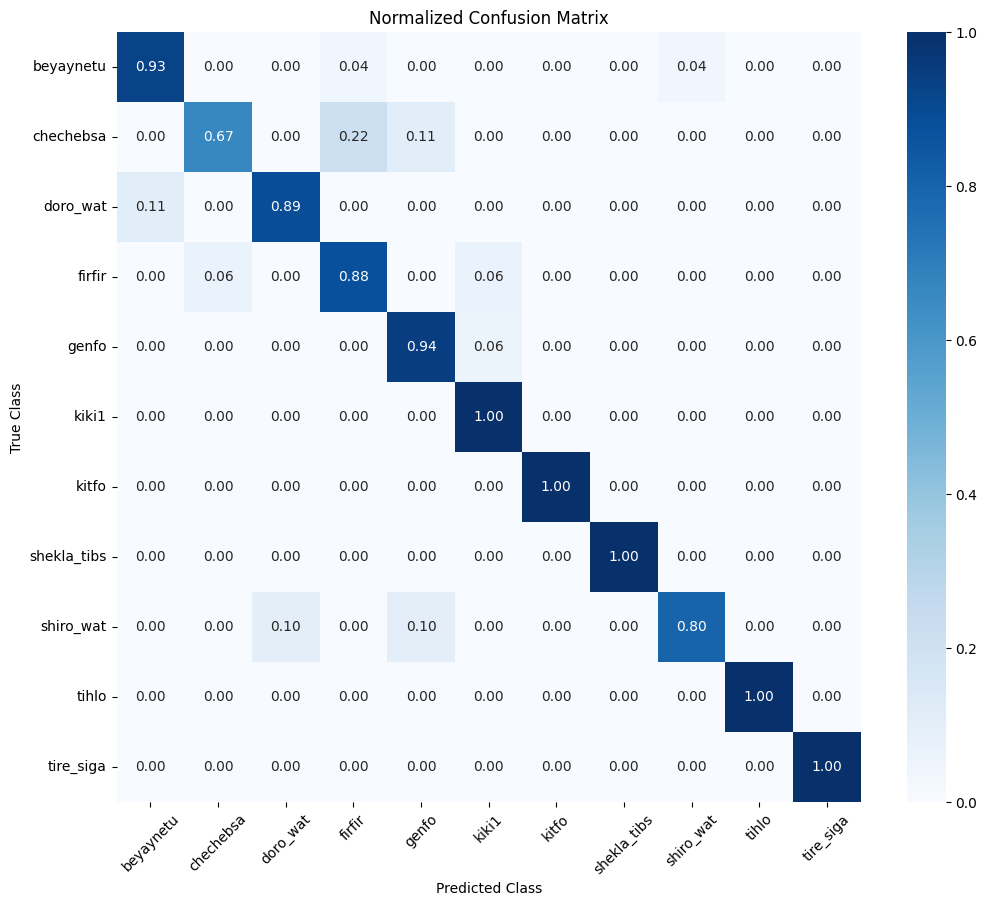

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example: your class names
class_names = ["beyaynetu", "chechebsa", "doro_wat", "firfir", "genfo",
                   "kiki1", "kitfo", "shekla_tibs", "shiro_wat", "tihlo", "tire_siga"]
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Normalize by true class (row sums)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix with class labels
plt.figure(figsize=(12,10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


class-specific attention weights

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Concatenate, Dropout, Lambda, Reshape

# Feature sizes and number of classes
resnet_dim = 2048
densenet_dim = 1024
num_classes = 11
proj_dim = 256  # Projection size

# Inputs for features
resnet_input = Input(shape=(resnet_dim,), name="resnet_feat")
densenet_input = Input(shape=(densenet_dim,), name="densenet_feat")

# Project both features to the same size
resnet_proj = Dense(proj_dim, activation='relu')(resnet_input)
densenet_proj = Dense(proj_dim, activation='relu')(densenet_input)

# Stack features: shape (batch_size, 2, proj_dim)
features_stack = Lambda(lambda x: tf.stack(x, axis=1))([resnet_proj, densenet_proj])

# Flatten: shape (batch_size, 2 * proj_dim)
features_flat = Lambda(lambda x: tf.reshape(x, (-1, 2 * proj_dim)))(features_stack)

# Attention MLP to generate class-specific attention weights: (batch_size, num_classes * 2)
attention_logits = Dense(128, activation='relu')(features_flat)
attention_logits = Dense(num_classes * 2)(attention_logits)

# Reshape to (batch_size, num_classes, 2)
attention_weights = Reshape((num_classes, 2))(attention_logits)

# Softmax over last axis (2) for attention weights per class
attention_weights = Lambda(lambda x: tf.nn.softmax(x, axis=-1))(attention_weights)

# Expand feature stack to (batch_size, 1, 2, proj_dim)
features_stack_expanded = Lambda(lambda x: tf.expand_dims(x, axis=1))(features_stack)

# Weighted sum of features using attention weights → (batch_size, num_classes, proj_dim)
weighted_features = Lambda(lambda x: x[0][..., tf.newaxis] * x[1])([attention_weights, features_stack_expanded])
class_features = Lambda(lambda x: tf.reduce_sum(x, axis=2))(weighted_features)

# Flatten the final features: (batch_size, num_classes * proj_dim)
class_features_flat = Lambda(lambda x: tf.reshape(x, (-1, num_classes * proj_dim)))(class_features)

# Classification head
x = Dense(256, activation='relu')(class_features_flat)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax', name='output')(x)

# Final model
attention_model = Model(inputs=[resnet_input, densenet_input], outputs=output)
attention_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)]
)

attention_model.summary()


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ resnet_feat         │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet_feat       │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │    524,544 │ resnet_feat[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │    262,400 │ densenet_feat[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 2, 256)    │          0 │ dense_4[0][0],    │
│                     │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 512)       │          0 │ lambda_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     65,664 │ lambda_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 22)        │      2,838 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 11, 2)     │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_6 (Lambda)   │ (None, 11, 2)     │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_7 (Lambda)   │ (None, 1, 2, 256) │          0 │ lambda_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_8 (Lambda)   │ (None, 11, 2,     │          0 │ lambda_6[0][0],   │
│                     │ 256)              │            │ lambda_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_9 (Lambda)   │ (None, 11, 256)   │          0 │ lambda_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_10 (Lambda)  │ (None, 2816)      │          0 │ lambda_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    721,152 │ lambda_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 11)        │      2,827 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,579,425 (6.03 MB)

 Trainable params: 1,579,425 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

attention_model.fit(
    x=[resnet_train, densenet_train],
    y=tf.keras.utils.to_categorical(y_train, num_classes=num_classes),
    validation_data=([resnet_val, densenet_val], tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)
attention_model.save('/content/drive/MyDrive/class_specific_attention_shared_model_trained.h5')
print("✅ Trained model saved successfully!")

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7520 - loss: 0.8669 - top_k_categorical_accuracy: 0.8694 - val_accuracy: 0.8000 - val_loss: 0.7365 - val_top_k_categorical_accuracy: 0.8909
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8383 - loss: 0.5435 - top_k_categorical_accuracy: 0.9376 - val_accuracy: 0.7636 - val_loss: 0.7380 - val_top_k_categorical_accuracy: 0.8667
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8873 - loss: 0.4153 - top_k_categorical_accuracy: 0.9568 - val_accuracy: 0.7455 - val_loss: 0.7734 - val_top_k_categorical_accuracy: 0.8667
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9089 - loss: 0.3336 - top_k_categorical_accuracy: 0.9736 - val_accuracy: 0.8061 - val_loss: 0.6616 - val_top_k_categorical_accuracy: 0.9152
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9475 - loss: 0.2272 - top_k_categorical_accuracy: 0.9909 - val_accuracy: 0.7758 - val_loss: 0.6621 - val_top_k_cate

✅ Trained model saved successfully!


In [ ]:
# Prepare test data
densenet_test, y_test = extract_features(densenet_feature_model, test_generator)
resnet_test, _ = extract_features(resnet_feature_model, test_generator)

# Predict
test_preds = attention_model.predict([resnet_test, densenet_test])
y_pred_classes = np.argmax(test_preds, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))



1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test Accuracy: 0.8831168831168831
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.75      0.67      0.71         9
           2       0.94      0.89      0.91        18
           3       0.87      0.81      0.84        16
           4       0.79      0.83      0.81        18
           5       0.86      1.00      0.92         6
           6       0.87      0.91      0.89        22
           7       1.00      0.93      0.97        15
           8       0.89      0.80    

MLP(Multilayer Perceptron)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.callbacks import EarlyStopping

# 1. Inputs (same as before)
resnet_input = Input(shape=(2048,), name="resnet_feat")
densenet_input = Input(shape=(1024,), name="densenet_feat")

# 2. Concatenate features
concat = Concatenate()([resnet_input, densenet_input])  # (None, 3072)

# 3. MLP head (no attention)
x = Dense(256, activation='relu')(concat)
x = Dropout(0.3)(x)
output = Dense(11, activation='softmax')(x)

# 4. Build & compile model
mlp_model = Model(inputs=[resnet_input, densenet_input], outputs=output)
mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6. Fit model
mlp_model.fit(
    x=[resnet_train, densenet_train],
    y=tf.keras.utils.to_categorical(y_train, num_classes=11),
    validation_data=([resnet_val, densenet_val], tf.keras.utils.to_categorical(y_val, num_classes=11)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

# 7. Evaluate on test set
test_preds = mlp_model.predict([resnet_test, densenet_test])
y_pred_classes = np.argmax(test_preds, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score, classification_report
print("✅ MLP Test Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("✅ MLP Report:\n", classification_report(y_true_classes, y_pred_classes))


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.2681 - loss: 2.2747 - val_accuracy: 0.6242 - val_loss: 1.3485
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6697 - loss: 1.1305 - val_accuracy: 0.6909 - val_loss: 0.9758
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7683 - loss: 0.7772 - val_accuracy: 0.8182 - val_loss: 0.7379
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8507 - loss: 0.5288 - val_accuracy: 0.7697 - val_loss: 0.8472
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8887 - loss: 0.3958 - val_accuracy: 0.8121 - val_loss: 0.6448
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9190 - loss: 0.3121 - val_accuracy: 0.8242 - val_loss: 0.6764
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9472 - loss: 0.2285 - val_accuracy: 0.8121 - val_loss: 0.6656
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9500 - loss: 0.1986 - val_accuracy: 0.8061 - val_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ MLP Test Accuracy: 0.8506493506493507
✅ MLP Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.44      0.44      0.44         9
           2       0.93      0.78      0.85        18
           3       0.86      0.75      0.80        16
           4       1.00      0.78      0.88        18
           5       0.43      1.00      0.60         6
           6       0.88      0.95      0.91        22
           7       1.00      1.00      1.00        15
           8       0.75      0.90      0.82        10
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         9

    accuracy                           0.85       154
   macro avg       0.84      0.83      0.82       154
weighted avg       0.88      0.85      0.86       154



In [ ]:
print("DenseNet train shape:", densenet_train.shape)
print("ResNet train shape:", resnet_train.shape)


DenseNet train shape: (2319, 1024)
ResNet train shape: (2319, 2048)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Convert data to DMatrix format for xgb.train
dtrain = xgb.DMatrix(X_train, label=y_train_final)
dval = xgb.DMatrix(X_val, label=y_val_final)
dtest = xgb.DMatrix(X_test, label=y_test_final)

params = {
    'objective': 'multi:softprob',
    'num_class': 11,
    'eval_metric': 'mlogloss',
    'seed': 42,
    'max_depth': 6,
    'eta': 0.1,
}

evals = [(dtrain, 'train'), (dval, 'eval')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Predict on test set
y_pred_prob = bst.predict(dtest)
y_pred = y_pred_prob.argmax(axis=1)

print("Test Accuracy:", accuracy_score(y_test_final, y_pred))
print("Classification Report:\n", classification_report(y_test_final, y_pred))


[0]	train-mlogloss:2.01551	eval-mlogloss:2.22776
[1]	train-mlogloss:1.73760	eval-mlogloss:2.08767
[2]	train-mlogloss:1.52262	eval-mlogloss:1.99157
[3]	train-mlogloss:1.34981	eval-mlogloss:1.92155
[4]	train-mlogloss:1.20339	eval-mlogloss:1.84073
[5]	train-mlogloss:1.07947	eval-mlogloss:1.77625
[6]	train-mlogloss:0.97087	eval-mlogloss:1.72116
[7]	train-mlogloss:0.87640	eval-mlogloss:1.67066
[8]	train-mlogloss:0.79308	eval-mlogloss:1.62374
[9]	train-mlogloss:0.71946	eval-mlogloss:1.57833
[10]	train-mlogloss:0.65467	eval-mlogloss:1.53879
[11]	train-mlogloss:0.59643	eval-mlogloss:1.50090
[12]	train-mlogloss:0.54414	eval-mlogloss:1.47011
[13]	train-mlogloss:0.49722	eval-mlogloss:1.43699
[14]	train-mlogloss:0.45405	eval-mlogloss:1.40443
[15]	train-mlogloss:0.41600	eval-mlogloss:1.37434
[16]	train-mlogloss:0.38178	eval-mlogloss:1.34979
[17]	train-mlogloss:0.35000	eval-mlogloss:1.31964
[18]	train-mlogloss:0.32163	eval-mlogloss:1.29799
[19]	train-mlogloss:0.29523	eval-mlogloss:1.27151
[20]	train

Soft Voting

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 157s 29s/step
4/5 ━━━━━━━━━━━━━━━━━━━━ 27s 28s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 137s 26s/step
Soft Voting Classification Report:
              precision    recall  f1-score   support

   beyaynetu       0.89      0.89      0.89        28
   chechebsa       0.86      0.67      0.75         9
    doro_wat       0.88      0.83      0.86        18
      firfir       0.74      0.88      0.80        16
       genfo       0.93      0.78      0.85        18
       kikil       1.00      1.00      1.00         6
       kitfo       0.88      1.00      0.94        22
 shekla_tibs       1.00      1.00      1.00        15
   shiro_wat       0.88      0.70      0.78        10
       tihlo       0.60      1.00      0.75         3
   tire_siga       1.00      1.00      1.00         9

    accuracy                           0.88       154
   macro avg       0.88      0.89      0.87       154
weighted avg       0.89      0.88      0.88       154


Top-2 Accuracy (Soft Voting): 95.45%


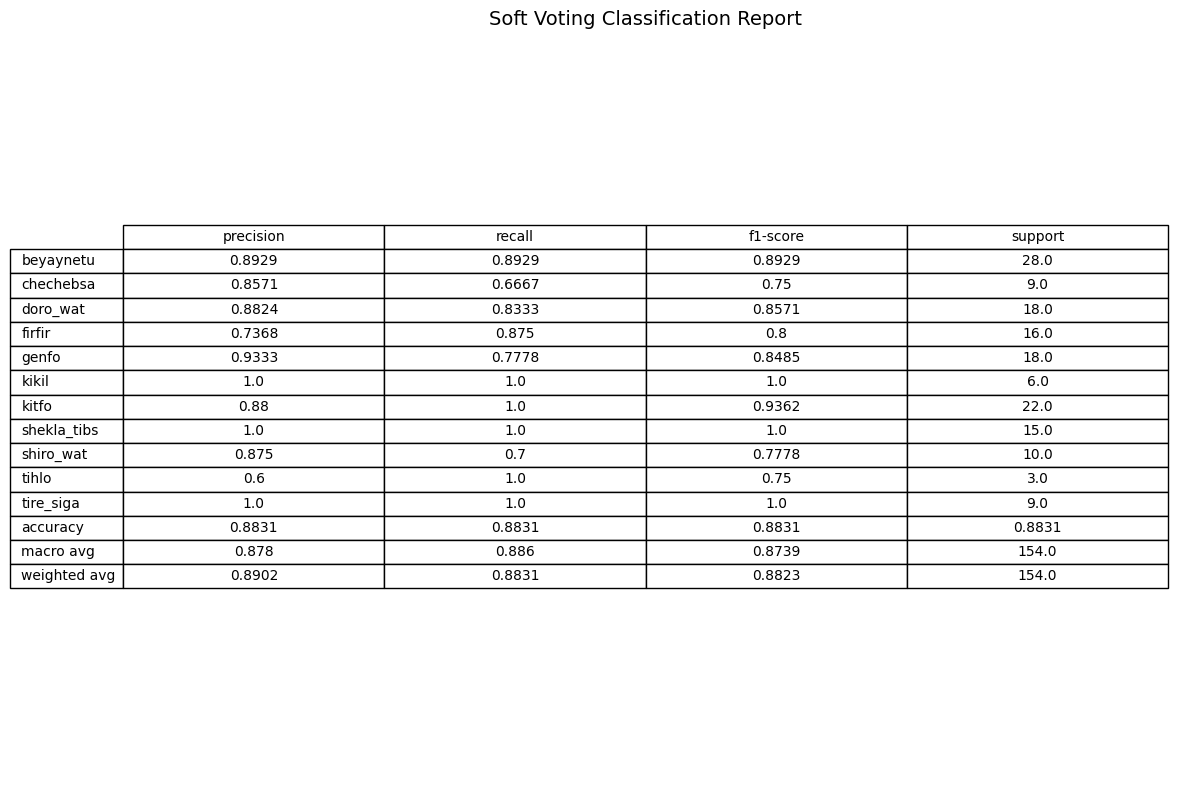

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, top_k_accuracy_score
from tensorflow.keras.models import load_model

# 1. Load your models
densenet_model = load_model('/content/drive/MyDrive/dense_final_model.h5')
resnet_model = load_model('/content/drive/MyDrive/resnet50v2_final4_model.h5')

models = [densenet_model, resnet_model]

# 2. Define the soft voting function
def get_soft_voting_predictions(models, test_generator):
    predictions = np.zeros((len(test_generator.classes), len(test_generator.class_indices)))
    for model in models:
        preds = model.predict(test_generator, verbose=1)
        predictions += preds  # Accumulate probabilities
    # Normalize by the number of models
    predictions /= len(models)  # Average the probabilities
    soft_voting_preds = np.argmax(predictions, axis=1)  # Get predicted class labels
    return soft_voting_preds, predictions  # Return predictions for Top-2 accuracy


# 3. Get predictions and true labels
test_generator.reset()  # Reset to ensure you're starting from the beginning
y_true = test_generator.classes

# Soft Voting
soft_voting_preds, soft_predictions = get_soft_voting_predictions(models, test_generator)

# 4. Evaluate Soft Voting Performance
print("Soft Voting Classification Report:")
print(classification_report(y_true, soft_voting_preds, target_names=test_generator.class_indices.keys()))

# Top-2 Accuracy for Soft Voting
top_2_acc_soft = top_k_accuracy_score(y_true, soft_predictions, k=2)
print(f"\nTop-2 Accuracy (Soft Voting): {top_2_acc_soft:.2%}")

# Save Soft Voting Classification Report as PNG
soft_report = classification_report(y_true, soft_voting_preds, target_names=test_generator.class_indices.keys(), output_dict=True)
soft_report_df = pd.DataFrame(soft_report).transpose()

plt.figure(figsize=(12, 8))
plt.axis('off')
plt.title('Soft Voting Classification Report', fontsize=14)

table = plt.table(cellText=np.round(soft_report_df.values, 4),
                  colLabels=soft_report_df.columns,
                  rowLabels=soft_report_df.index,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig('soft_voting_classification_report.png', dpi=300, bbox_inches='tight')
plt.show()


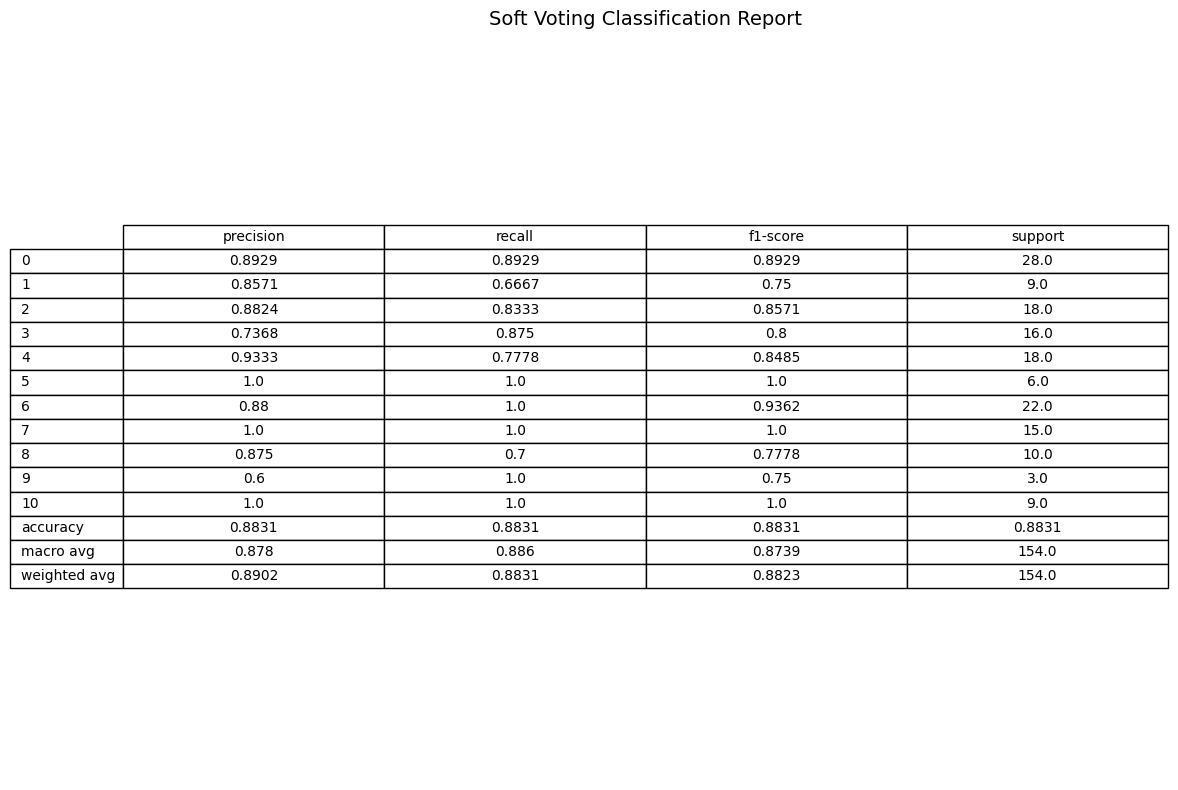

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming soft_voting_preds and y_true are already defined:
# soft_voting_preds = get_soft_voting_predictions(models, test_generator)
# y_true = test_generator.classes

# 1. Generate classification report as dict
soft_report = classification_report(y_true, soft_voting_preds, output_dict=True)
soft_report_df = pd.DataFrame(soft_report).transpose()

# 2. Plot and save the classification report
plt.figure(figsize=(12, 8))
plt.axis('off')
tbl = plt.table(cellText=np.round(soft_report_df.values, 4),
                colLabels=soft_report_df.columns,
                rowLabels=soft_report_df.index,
                cellLoc='center',
                loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title('Soft Voting Classification Report', fontsize=14)
plt.tight_layout()

# Save and display
plt.savefig('/content/drive/MyDrive/soft_voting_classification_report.png', dpi=300)
plt.show()
plt.close()


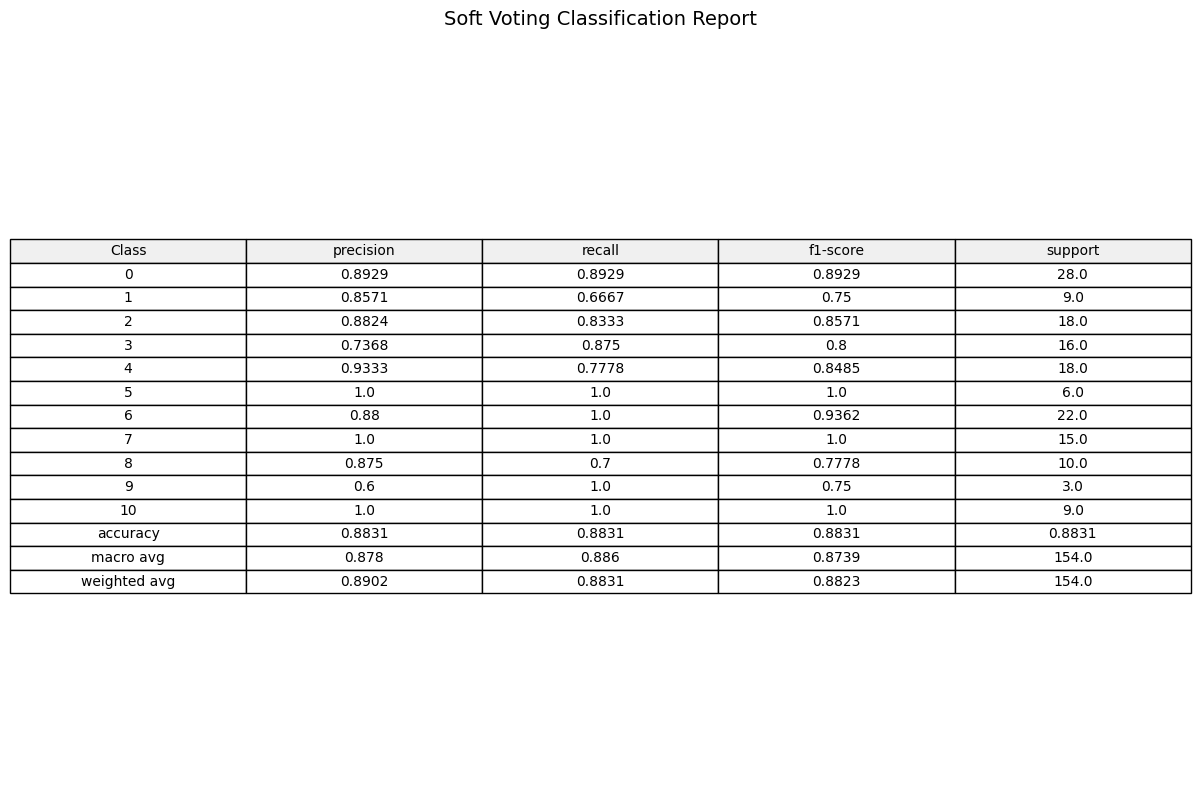

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report
soft_report = classification_report(y_true, soft_voting_preds, output_dict=True)
soft_report_df = pd.DataFrame(soft_report).transpose()

# Reset index to make 'Class' a column and rename it
soft_report_df.reset_index(inplace=True)
soft_report_df.rename(columns={'index': 'Class'}, inplace=True)

# Convert numeric columns to float and round them (excluding the 'Class' column)
numeric_cols = soft_report_df.columns.difference(['Class'])
soft_report_df[numeric_cols] = soft_report_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
soft_report_df[numeric_cols] = soft_report_df[numeric_cols].round(4)

plt.figure(figsize=(12, 8))
plt.axis('off')

# Convert DataFrame to strings for the table
cell_text = soft_report_df.values.astype(str)

# Create table with proper headers
tbl = plt.table(
    cellText=cell_text,
    colLabels=soft_report_df.columns,  # Now includes 'Class' as first column
    rowLabels=None,                   # No separate row labels needed
    cellLoc='center',
    loc='center',
    colColours=['#f0f0f0']*len(soft_report_df.columns)  # Optional: header background
)

# Formatting
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Adjust layout to prevent clipping
plt.title('Soft Voting Classification Report', fontsize=14, pad=20)
plt.tight_layout()

# Save and show
plt.savefig('/content/drive/MyDrive/soft_voting_classification_report.png',
            dpi=300,
            bbox_inches='tight')
plt.show()
plt.close()

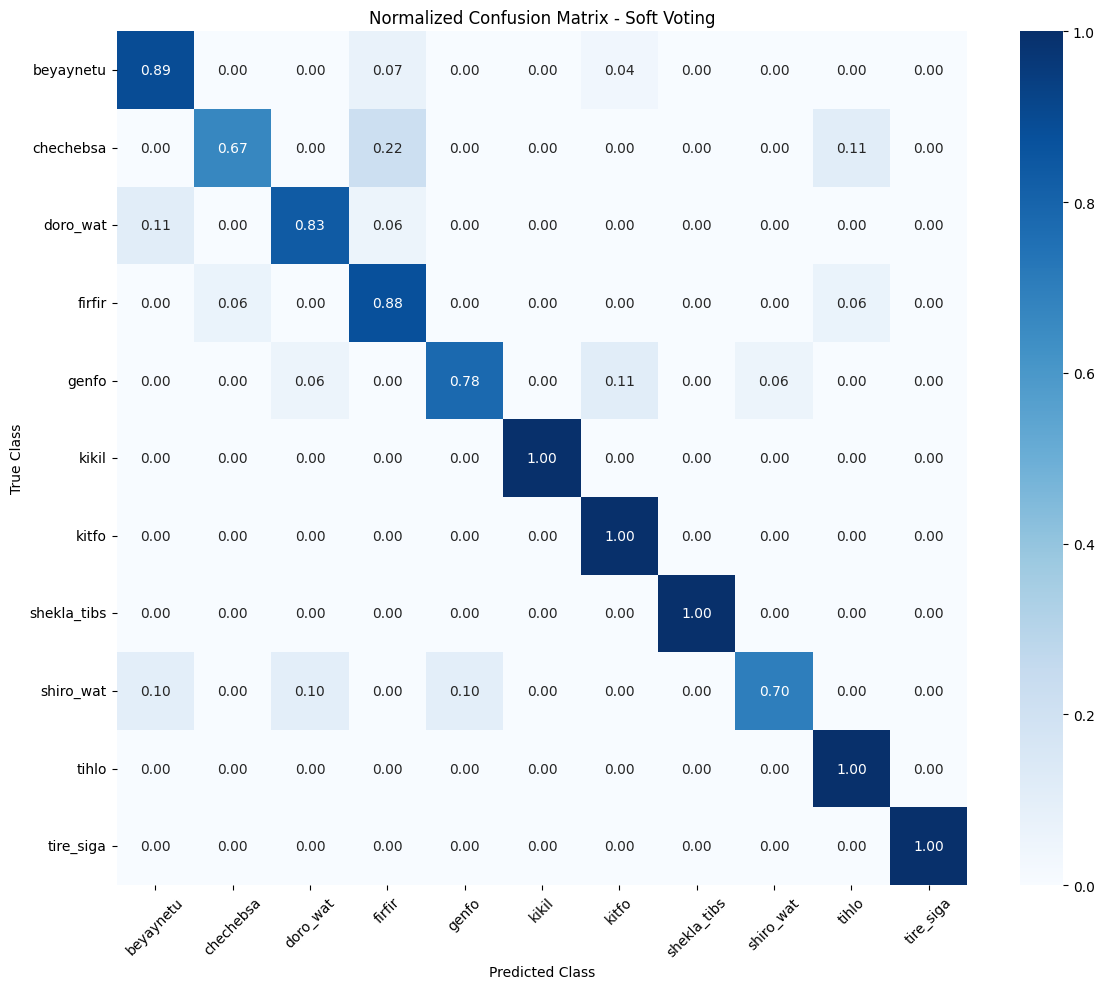

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get class names from test_generator in order
class_names = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, soft_voting_preds)

# Normalize confusion matrix by true class (row sums)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Normalized Confusion Matrix - Soft Voting')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Max Voting

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.stats import mode
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
# 1. Load your models
densenet_model = load_model('/content/drive/MyDrive/dense_final_model.h5')
resnet_model = load_model('/content/drive/MyDrive/resnet50v2_final4_model.h5')

models = [densenet_model, resnet_model]
# Updated True Max Voting Function
def get_true_max_voting_predictions(models, test_generator):
    # Get hard class predictions from all models
    all_preds = []
    for model in models:
        preds = model.predict(test_generator, verbose=1).argmax(axis=1)
        all_preds.append(preds)

    # Stack predictions (shape: [n_models, n_samples])
    stacked_preds = np.stack(all_preds)

    # Get majority vote (mode)
    max_voting_preds, _ = mode(stacked_preds, axis=0, keepdims=False)
    max_voting_preds = max_voting_preds.flatten()  # Flatten to 1D array

    # For Top-2: Get all predictions and count occurrences
    top_2_preds = []
    for i in range(stacked_preds.shape[1]):
        unique, counts = np.unique(stacked_preds[:, i], return_counts=True)
        # Get classes sorted by vote count (descending)
        sorted_classes = unique[np.argsort(-counts)]
        # Take top 2 (pad with first class if only one unique prediction)
        top_2 = sorted_classes[:2] if len(sorted_classes) >= 2 else [sorted_classes[0], sorted_classes[0]]
        top_2_preds.append(top_2)

    return max_voting_preds, np.array(top_2_preds)

# Get predictions
test_generator.reset()
y_true = test_generator.classes
max_voting_preds, top_2_preds = get_true_max_voting_predictions(models, test_generator)

# Evaluation
print("True Max Voting Classification Report:")
print(classification_report(y_true, max_voting_preds,
                          target_names=list(test_generator.class_indices.keys())))

# Top-2 Accuracy
correct_top2 = sum(1 for i in range(len(y_true)) if y_true[i] in top_2_preds[i])
print(f"\nTop-2 Accuracy: {correct_top2/len(y_true):.2%}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 170s 33s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 137s 27s/step
True Max Voting Classification Report:
              precision    recall  f1-score   support

   beyaynetu       0.84      0.96      0.90        28
   chechebsa       0.67      0.67      0.67         9
    doro_wat       0.89      0.89      0.89        18
      firfir       0.81      0.81      0.81        16
       genfo       0.89      0.89      0.89        18
       kikil       0.86      1.00      0.92         6
       kitfo       0.87      0.91      0.89        22
 shekla_tibs       1.00      0.93      0.97        15
   shiro_wat       1.00      0.60      0.75        10
       tihlo       1.00      1.00      1.00         3
   tire_siga       1.00      0.89      0.94         9

    accuracy                           0.88       154
   macro avg       0.89      0.87      0.88       154
weighted avg       0.88      0.88      0.87       154


Top-2 Accuracy: 92.86%


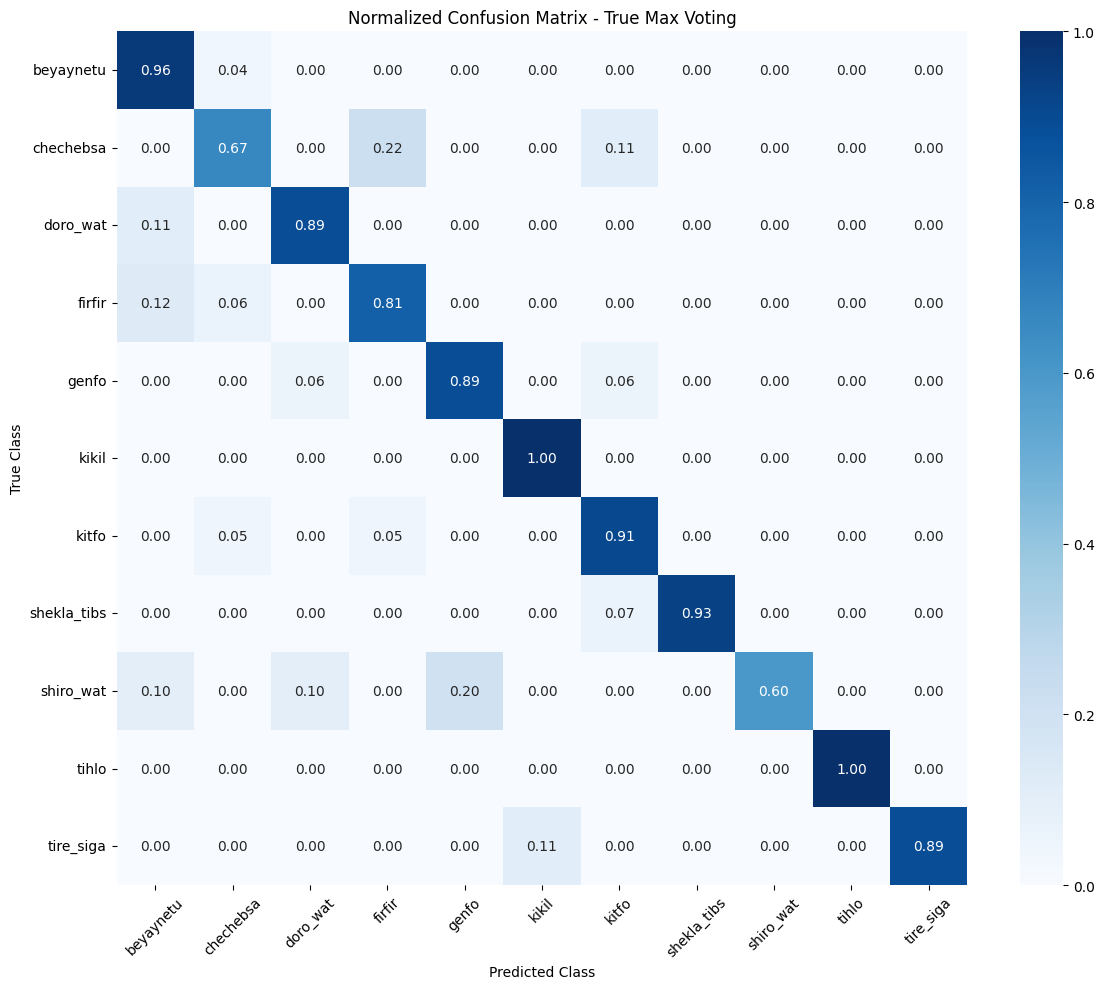

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class names
class_names = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, max_voting_preds)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Normalized Confusion Matrix - True Max Voting')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


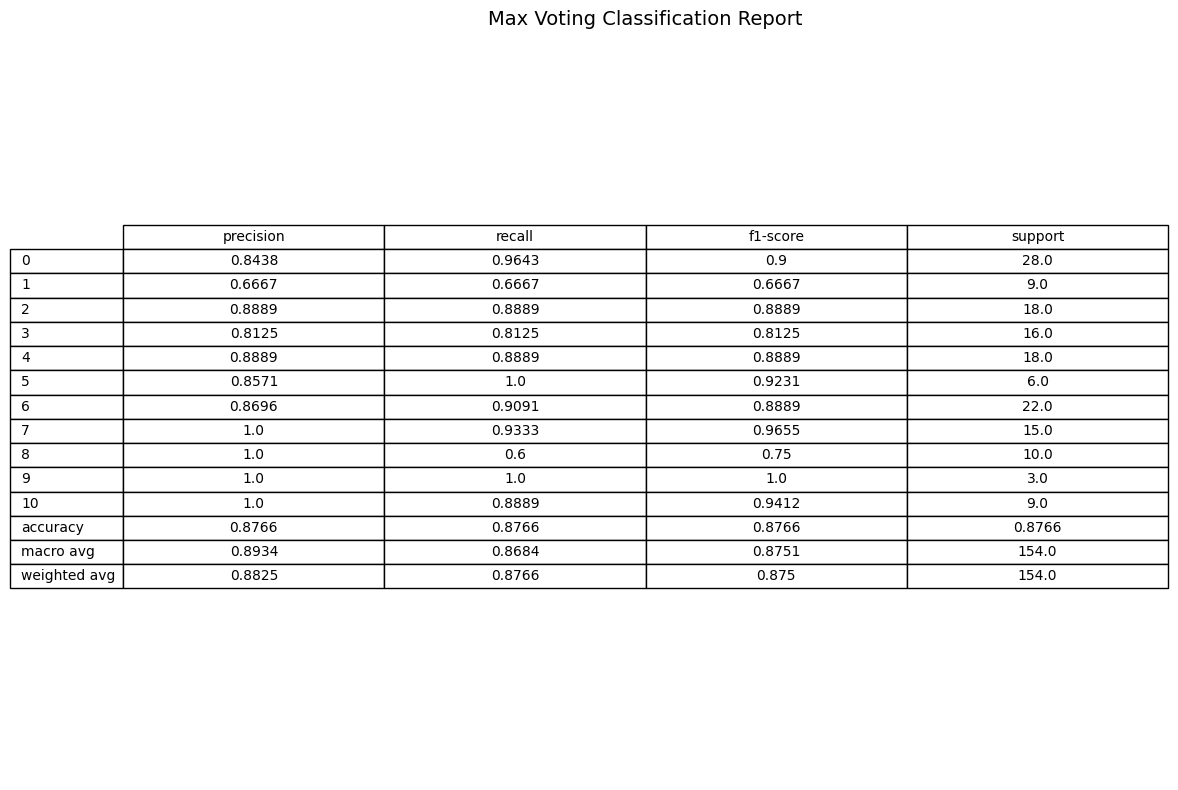

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# 2. Max Voting Report
max_report = classification_report(y_true, max_voting_preds, output_dict=True)
max_report_df = pd.DataFrame(max_report).transpose()

plt.figure(figsize=(12, 8))
plt.axis('off')
tbl = plt.table(cellText=np.round(max_report_df.values, 4),
                colLabels=max_report_df.columns,
                rowLabels=max_report_df.index,
                cellLoc='center',
                loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title('Max Voting Classification Report', fontsize=14)
plt.tight_layout()
plt.savefig('max_voting_classification_report.png', dpi=300)

plt.show()  # 👈 Add this to display it
plt.close()


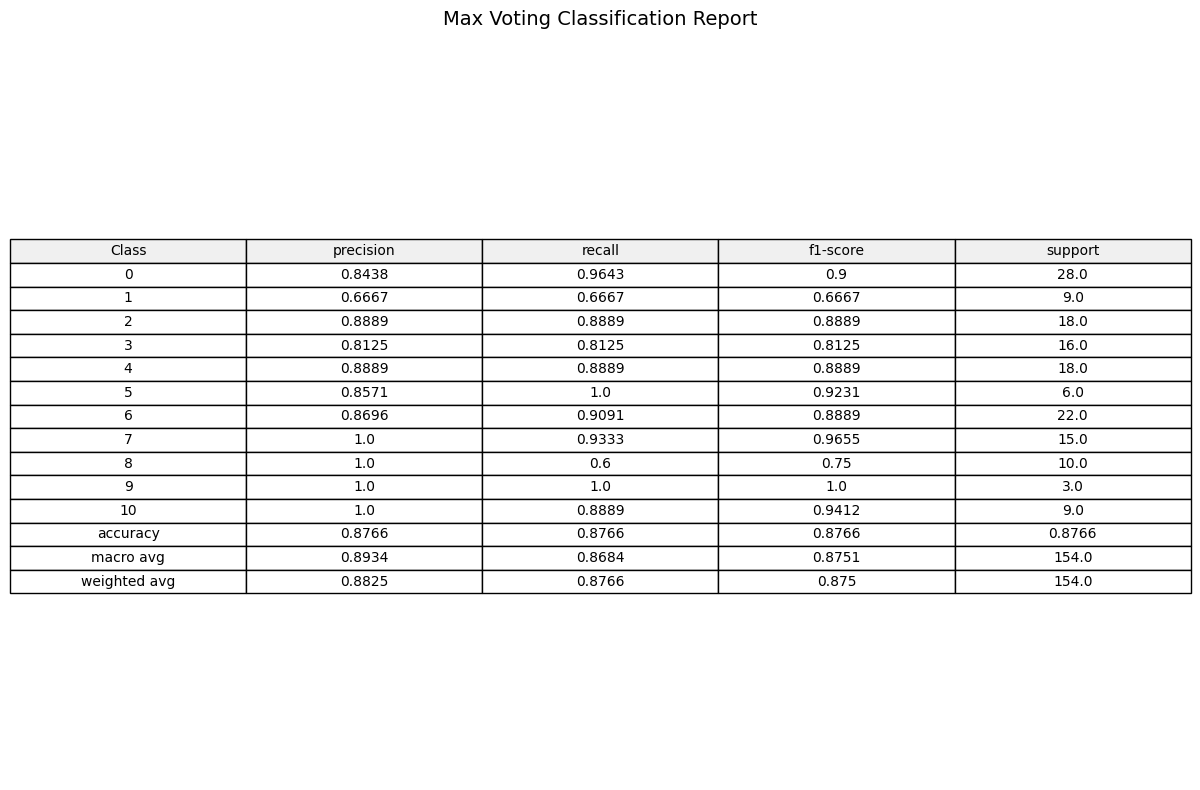

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report
max_report = classification_report(y_true, max_voting_preds, output_dict=True)
max_report_df = pd.DataFrame(max_report).transpose()

# Reset index to make 'Class' a column and rename it
max_report_df.reset_index(inplace=True)
max_report_df.rename(columns={'index': 'Class'}, inplace=True)

# Convert numeric columns to float and round them (excluding the 'Class' column)
numeric_cols = max_report_df.columns.difference(['Class'])
max_report_df[numeric_cols] = max_report_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
max_report_df[numeric_cols] = max_report_df[numeric_cols].round(4)

plt.figure(figsize=(12, 8))
plt.axis('off')

# Convert DataFrame to strings for the table
cell_text = max_report_df.values.astype(str)

# Create table with proper headers
tbl = plt.table(
    cellText=cell_text,
    colLabels=max_report_df.columns,  # Now includes 'Class' as first column
    rowLabels=None,                   # No separate row labels needed
    cellLoc='center',
    loc='center',
    colColours=['#f0f0f0']*len(max_report_df.columns)  # Optional: header background
)

# Formatting
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Adjust layout to prevent clipping
plt.title('Max Voting Classification Report', fontsize=14, pad=20)
plt.tight_layout()

# Save and show
plt.savefig('max_voting_classification_report.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
np.sum(soft_voting_preds != max_voting_preds)


np.int64(0)

In [ ]:
mismatches = np.where(soft_voting_preds != max_voting_preds)[0]
for i in mismatches:
    print(f"Sample {i}: Soft={soft_voting_preds[i]}, Max={max_voting_preds[i]}, True={y_true[i]}")


Sample 1: Soft=3, Max=0, True=0
Sample 6: Soft=3, Max=1, True=0
Sample 23: Soft=6, Max=0, True=0
Sample 32: Soft=9, Max=6, True=1
Sample 37: Soft=3, Max=2, True=2
Sample 65: Soft=3, Max=0, True=3
Sample 66: Soft=9, Max=3, True=3
Sample 69: Soft=3, Max=0, True=3
Sample 86: Soft=8, Max=4, True=4
Sample 87: Soft=6, Max=4, True=4
Sample 104: Soft=6, Max=1, True=6
Sample 111: Soft=6, Max=3, True=6
Sample 119: Soft=7, Max=6, True=7
Sample 140: Soft=8, Max=4, True=8
Sample 153: Soft=10, Max=5, True=10


5/5 ━━━━━━━━━━━━━━━━━━━━ 170s 33s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 150s 29s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 159s 32s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 148s 29s/step
DenseNet - Test Accuracy: 0.8312
ResNet50V2 - Test Accuracy: 0.8636
Soft Voting - Test Accuracy: 0.8831
True Max Voting - Test Accuracy: 0.8766


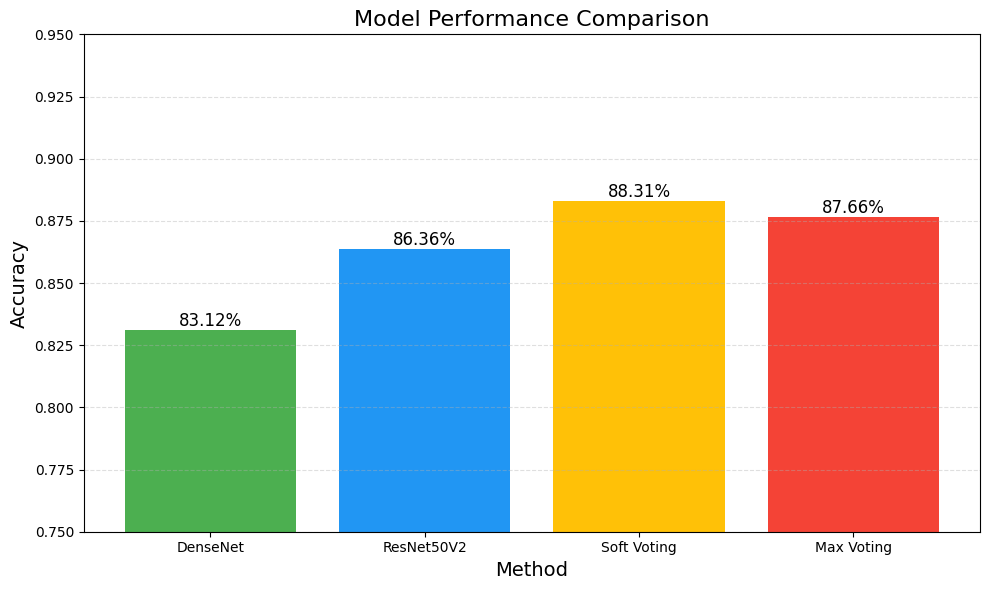

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# 1. Load models
model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5', compile=False)
model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5', compile=False)

# 2. Manually compile
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Evaluate models
test_generator.reset()
y_true = test_generator.classes

# Get predictions
densenet_preds = model_densenet.predict(test_generator).argmax(axis=1)
resnet_preds = model_resnet.predict(test_generator).argmax(axis=1)

# Individual accuracies
test_acc_densenet = accuracy_score(y_true, densenet_preds)
test_acc_resnet = accuracy_score(y_true, resnet_preds)

# 4. Soft Voting (Probability Average)
soft_voting_probs = (model_densenet.predict(test_generator) + model_resnet.predict(test_generator)) / 2
soft_voting_preds = np.argmax(soft_voting_probs, axis=1)
soft_voting_acc = accuracy_score(y_true, soft_voting_preds)

# 5. True Max Voting (88% version)
stacked_preds = np.vstack([densenet_preds, resnet_preds])
max_voting_preds, _ = mode(stacked_preds, axis=0)
max_voting_preds = max_voting_preds.flatten()
max_voting_acc = accuracy_score(y_true, max_voting_preds)

# 6. Print Results
print(f"DenseNet - Test Accuracy: {test_acc_densenet:.4f}")
print(f"ResNet50V2 - Test Accuracy: {test_acc_resnet:.4f}")
print(f"Soft Voting - Test Accuracy: {soft_voting_acc:.4f}")
print(f"True Max Voting - Test Accuracy: {max_voting_acc:.4f}")

# 7. Plotting
methods = ['DenseNet121', 'ResNet50V2', 'Soft Voting', 'Max Voting']
accuracies = [test_acc_densenet, test_acc_resnet, soft_voting_acc, max_voting_acc]
colors = ['#4CAF50', '#2196F3', '#FFC107', '#F44336']

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)
plt.ylim(0.75, 0.95)  # Adjusted to better show differences
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Method', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 163s 31s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 147s 29s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 155s 31s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 145s 29s/step
DenseNet - Test Accuracy: 0.8312
ResNet50V2 - Test Accuracy: 0.8636
Soft Voting - Test Accuracy: 0.8831
True Max Voting - Test Accuracy: 0.8766


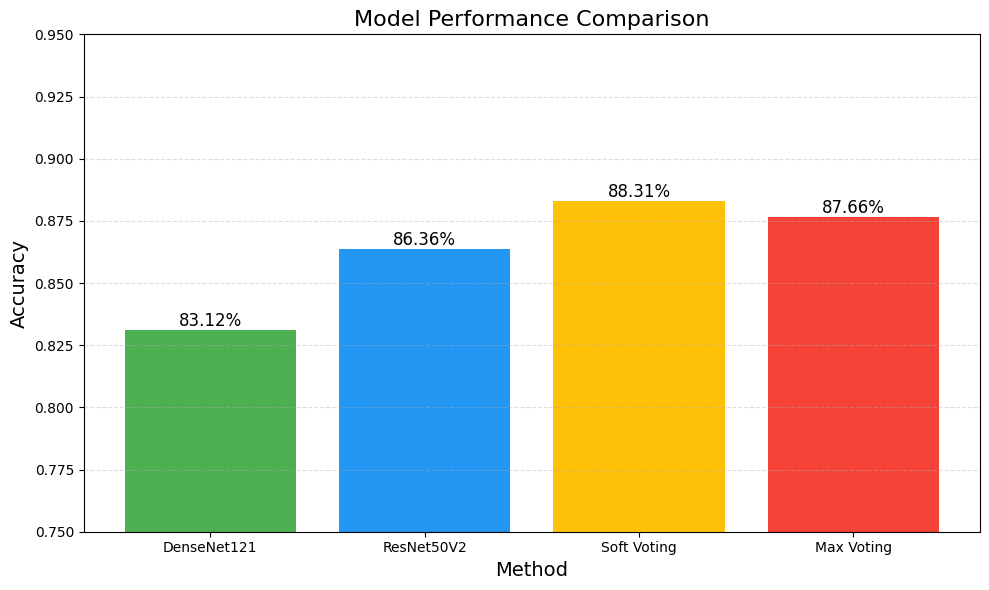

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# 1. Load models
model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5', compile=False)
model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5', compile=False)

# 2. Manually compile
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Evaluate models
test_generator.reset()
y_true = test_generator.classes

# Get predictions
densenet_preds = model_densenet.predict(test_generator).argmax(axis=1)
resnet_preds = model_resnet.predict(test_generator).argmax(axis=1)

# Individual accuracies
test_acc_densenet = accuracy_score(y_true, densenet_preds)
test_acc_resnet = accuracy_score(y_true, resnet_preds)

# 4. Soft Voting (Probability Average)
soft_voting_probs = (model_densenet.predict(test_generator) + model_resnet.predict(test_generator)) / 2
soft_voting_preds = np.argmax(soft_voting_probs, axis=1)
soft_voting_acc = accuracy_score(y_true, soft_voting_preds)

# 5. True Max Voting (88% version)
stacked_preds = np.vstack([densenet_preds, resnet_preds])
max_voting_preds, _ = mode(stacked_preds, axis=0)
max_voting_preds = max_voting_preds.flatten()
max_voting_acc = accuracy_score(y_true, max_voting_preds)

# 6. Print Results
print(f"DenseNet - Test Accuracy: {test_acc_densenet:.4f}")
print(f"ResNet50V2 - Test Accuracy: {test_acc_resnet:.4f}")
print(f"Soft Voting - Test Accuracy: {soft_voting_acc:.4f}")
print(f"True Max Voting - Test Accuracy: {max_voting_acc:.4f}")

# 7. Plotting
methods = ['DenseNet121', 'ResNet50V2', 'Soft Voting', 'Max Voting']
accuracies = [test_acc_densenet, test_acc_resnet, soft_voting_acc, max_voting_acc]
colors = ['#4CAF50', '#2196F3', '#FFC107', '#F44336']

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)
plt.ylim(0.75, 0.95)  # Adjusted to better show differences
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Method', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 162s 31s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 140s 27s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
DenseNet121 - Test Accuracy: 0.8312
ResNet50V2  - Test Accuracy: 0.8636
Soft Voting - Test Accuracy: 0.8831
Max Voting  - Test Accuracy: 0.8766
Attention Fusion - Test Accuracy: 0.9221


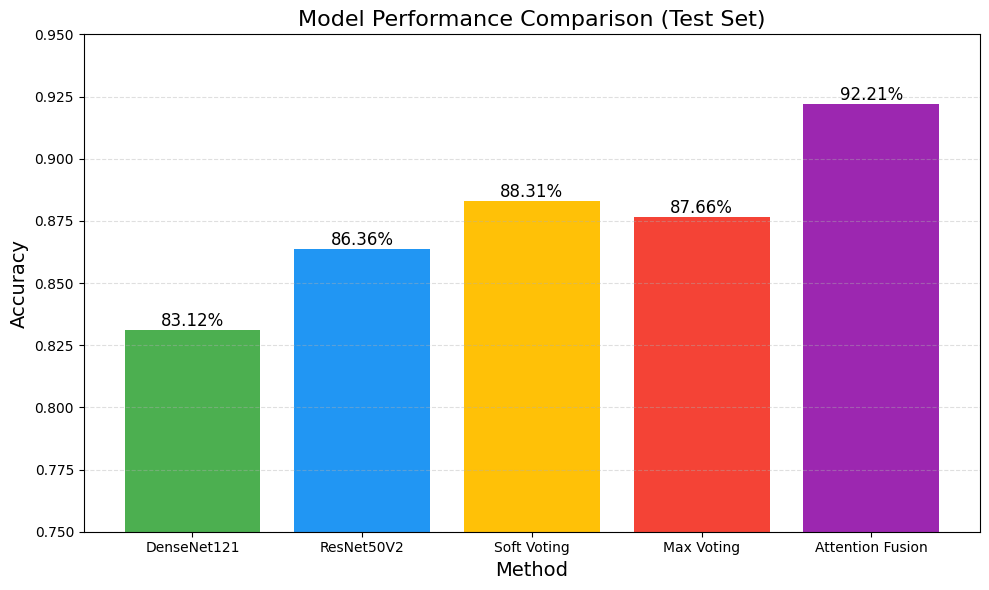

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# 1. Load models
model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5', compile=False)
model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5', compile=False)
model_attention = load_model('/content/drive/MyDrive/attention_model.h5', compile=False)  # ✅ Attention model

# 2. Compile manually
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_attention.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # ✅

# 3. Get true labels
test_generator.reset()
y_true = test_generator.classes

# 4. Get predictions
densenet_probs = model_densenet.predict(test_generator)
resnet_probs = model_resnet.predict(test_generator)

densenet_preds = np.argmax(densenet_probs, axis=1)
resnet_preds = np.argmax(resnet_probs, axis=1)

# 5. Soft Voting (Average)
soft_voting_probs = (densenet_probs + resnet_probs) / 2
soft_voting_preds = np.argmax(soft_voting_probs, axis=1)

# 6. Max Voting
stacked_preds = np.vstack([densenet_preds, resnet_preds])
max_voting_preds, _ = mode(stacked_preds, axis=0, keepdims=True)
max_voting_preds = max_voting_preds.flatten()

# 7. Attention model predictions
# You already extracted test features before, reuse them here:
# densenet_test, y_test = extract_features(densenet_feature_model, test_generator)
# resnet_test, _ = extract_features(resnet_feature_model, test_generator)

attention_preds = model_attention.predict([resnet_test, densenet_test])
attention_preds_classes = np.argmax(attention_preds, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 8. Calculate accuracies
test_acc_densenet = accuracy_score(y_true, densenet_preds)
test_acc_resnet = accuracy_score(y_true, resnet_preds)
soft_voting_acc = accuracy_score(y_true, soft_voting_preds)
max_voting_acc = accuracy_score(y_true, max_voting_preds)
attention_acc = accuracy_score(y_test_classes, attention_preds_classes)  # ✅

# 9. Print results
print(f"DenseNet121 - Test Accuracy: {test_acc_densenet:.4f}")
print(f"ResNet50V2  - Test Accuracy: {test_acc_resnet:.4f}")
print(f"Soft Voting - Test Accuracy: {soft_voting_acc:.4f}")
print(f"Max Voting  - Test Accuracy: {max_voting_acc:.4f}")
print(f"Attention Fusion - Test Accuracy: {attention_acc:.4f}")  # ✅

# 10. Plotting
methods = ['DenseNet121', 'ResNet50V2', 'Soft Voting', 'Max Voting', 'Attention Fusion']
accuracies = [test_acc_densenet, test_acc_resnet, soft_voting_acc, max_voting_acc, attention_acc]
colors = ['#4CAF50', '#2196F3', '#FFC107', '#F44336', '#9C27B0']  # Add purple for attention

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)
plt.ylim(0.75, 0.95)
plt.title('Model Performance Comparison (Test Set)', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Method', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 158s 30s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 143s 28s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
DenseNet121        - Test Accuracy: 0.8312
ResNet50V2         - Test Accuracy: 0.8636
Soft Voting        - Test Accuracy: 0.8831
Attention Fusion   - Test Accuracy: 0.9221


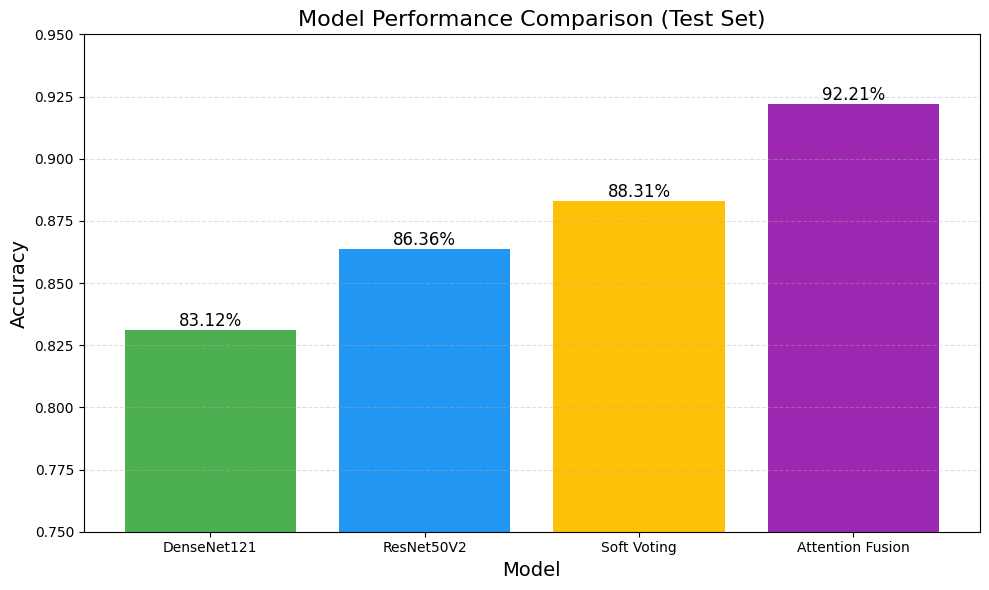

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Load models
model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5', compile=False)
model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5', compile=False)
model_attention = load_model('/content/drive/MyDrive/attention_model.h5', compile=False)

# 2. Compile models
for model in [model_densenet, model_resnet, model_attention]:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. True labels
test_generator.reset()
y_true = test_generator.classes

# 4. Get prediction probabilities and classes
densenet_probs = model_densenet.predict(test_generator)
resnet_probs = model_resnet.predict(test_generator)

densenet_preds = np.argmax(densenet_probs, axis=1)
resnet_preds = np.argmax(resnet_probs, axis=1)

# 5. Soft Voting (average probabilities)
soft_voting_probs = (densenet_probs + resnet_probs) / 2
soft_voting_preds = np.argmax(soft_voting_probs, axis=1)

# 6. Attention predictions
attention_preds = model_attention.predict([resnet_test, densenet_test])  # You already extracted features
attention_preds_classes = np.argmax(attention_preds, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 7. Accuracy calculations
acc_densenet = accuracy_score(y_true, densenet_preds)
acc_resnet = accuracy_score(y_true, resnet_preds)
acc_soft_voting = accuracy_score(y_true, soft_voting_preds)
acc_attention = accuracy_score(y_test_classes, attention_preds_classes)

# 8. Print results
print(f"DenseNet121        - Test Accuracy: {acc_densenet:.4f}")
print(f"ResNet50V2         - Test Accuracy: {acc_resnet:.4f}")
print(f"Soft Voting        - Test Accuracy: {acc_soft_voting:.4f}")
print(f"Attention Fusion   - Test Accuracy: {acc_attention:.4f}")

# 9. Plotting
methods = ['DenseNet121', 'ResNet50V2', 'Soft Voting', 'Attention Fusion']
accuracies = [acc_densenet, acc_resnet, acc_soft_voting, acc_attention]
colors = ['#4CAF50', '#2196F3', '#FFC107', '#9C27B0']  # green, blue, yellow, purple

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.ylim(0.75, 0.95)
plt.title('Model Performance Comparison (Test Set)', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 170s 32s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 141s 27s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


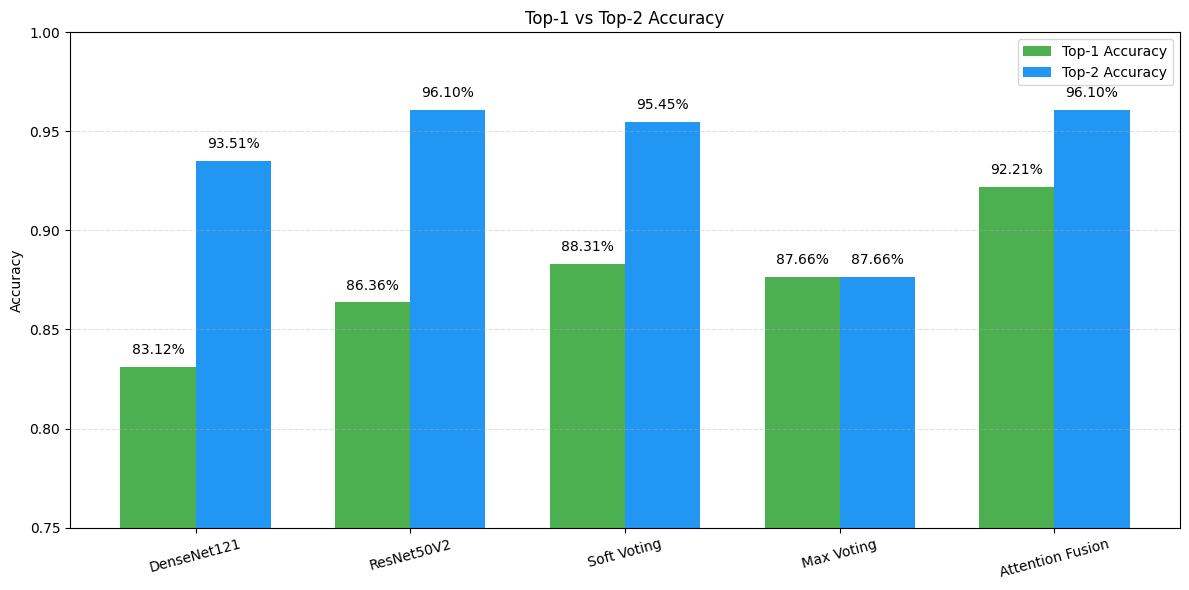

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from tensorflow.keras.utils import to_categorical

# 1. Load models
model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5', compile=False)
model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5', compile=False)
model_attention = load_model('/content/drive/MyDrive/attention_model.h5', compile=False)

# 2. Compile
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_attention.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Get true labels
test_generator.reset()
y_true = test_generator.classes
y_true_cat = to_categorical(y_true, num_classes=11)

# 4. Get prediction probabilities
densenet_probs = model_densenet.predict(test_generator)
resnet_probs = model_resnet.predict(test_generator)

# 5. Voting & prediction
soft_voting_probs = (densenet_probs + resnet_probs) / 2
stacked_preds = np.vstack([np.argmax(densenet_probs, axis=1), np.argmax(resnet_probs, axis=1)])
max_voting_preds, _ = mode(stacked_preds, axis=0, keepdims=True)
max_voting_preds = max_voting_preds.flatten()

# 6. Attention model
attention_probs = model_attention.predict([resnet_test, densenet_test])  # previously extracted features

# 7. Accuracy calculation functions
def top_k_accuracy(y_true, y_probs, k=1):
    top_k_preds = np.argsort(y_probs, axis=1)[:, -k:]
    return np.mean([y_true[i] in top_k_preds[i] for i in range(len(y_true))])

# 8. Calculate Top-1 and Top-2 Accuracies
methods = ['DenseNet121', 'ResNet50V2', 'Soft Voting', 'Max Voting', 'Attention Fusion']

top1_accuracies = [
    top_k_accuracy(y_true, densenet_probs, k=1),
    top_k_accuracy(y_true, resnet_probs, k=1),
    top_k_accuracy(y_true, soft_voting_probs, k=1),
    accuracy_score(y_true, max_voting_preds),
    top_k_accuracy(np.argmax(y_test, axis=1), attention_probs, k=1)
]

top2_accuracies = [
    top_k_accuracy(y_true, densenet_probs, k=2),
    top_k_accuracy(y_true, resnet_probs, k=2),
    top_k_accuracy(y_true, soft_voting_probs, k=2),
    top_k_accuracy(y_true, to_categorical(max_voting_preds, num_classes=11), k=2),
    top_k_accuracy(np.argmax(y_test, axis=1), attention_probs, k=2)
]

# 9. Plot grouped bar chart
x = np.arange(len(methods))
width = 0.35

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, top1_accuracies, width, label='Top-1 Accuracy', color='#4CAF50')
bars2 = plt.bar(x + width/2, top2_accuracies, width, label='Top-2 Accuracy', color='#2196F3')

for i in range(len(methods)):
    plt.text(x[i] - width/2, top1_accuracies[i] + 0.005, f'{top1_accuracies[i]:.2%}', ha='center', va='bottom')
    plt.text(x[i] + width/2, top2_accuracies[i] + 0.005, f'{top2_accuracies[i]:.2%}', ha='center', va='bottom')

plt.xticks(x, methods, rotation=15)
plt.ylabel('Accuracy')
plt.ylim(0.75, 1.0)
plt.title('Top-1 vs Top-2 Accuracy')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 161s 31s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 146s 29s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


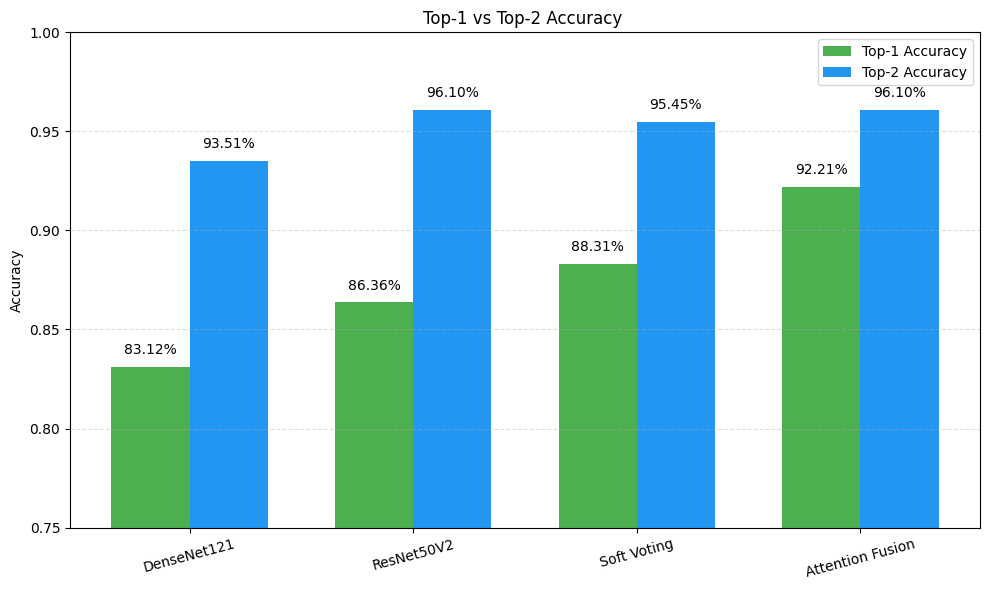

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from scipy.stats import mode

# 1. Load models
model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5', compile=False)
model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5', compile=False)
model_attention = load_model('/content/drive/MyDrive/attention_model.h5', compile=False)

# 2. Compile
for model in [model_densenet, model_resnet, model_attention]:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Get true labels
test_generator.reset()
y_true = test_generator.classes
y_true_cat = to_categorical(y_true, num_classes=11)

# 4. Get prediction probabilities
densenet_probs = model_densenet.predict(test_generator)
resnet_probs = model_resnet.predict(test_generator)

# 5. Voting & attention predictions
soft_voting_probs = (densenet_probs + resnet_probs) / 2
attention_probs = model_attention.predict([resnet_test, densenet_test])  # Use extracted features

# 6. Accuracy calculation function
def top_k_accuracy(y_true, y_probs, k=1):
    top_k_preds = np.argsort(y_probs, axis=1)[:, -k:]
    return np.mean([y_true[i] in top_k_preds[i] for i in range(len(y_true))])

# 7. Calculate Top-1 and Top-2 Accuracies
methods = ['DenseNet121', 'ResNet50V2', 'Soft Voting', 'Attention Fusion']

top1_accuracies = [
    top_k_accuracy(y_true, densenet_probs, k=1),
    top_k_accuracy(y_true, resnet_probs, k=1),
    top_k_accuracy(y_true, soft_voting_probs, k=1),
    top_k_accuracy(np.argmax(y_test, axis=1), attention_probs, k=1)
]

top2_accuracies = [
    top_k_accuracy(y_true, densenet_probs, k=2),
    top_k_accuracy(y_true, resnet_probs, k=2),
    top_k_accuracy(y_true, soft_voting_probs, k=2),
    top_k_accuracy(np.argmax(y_test, axis=1), attention_probs, k=2)
]

# 8. Plot grouped bar chart
x = np.arange(len(methods))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, top1_accuracies, width, label='Top-1 Accuracy', color='#4CAF50')
bars2 = plt.bar(x + width/2, top2_accuracies, width, label='Top-2 Accuracy', color='#2196F3')

for i in range(len(methods)):
    plt.text(x[i] - width/2, top1_accuracies[i] + 0.005, f'{top1_accuracies[i]:.2%}', ha='center', va='bottom')
    plt.text(x[i] + width/2, top2_accuracies[i] + 0.005, f'{top2_accuracies[i]:.2%}', ha='center', va='bottom')

plt.xticks(x, methods, rotation=15)
plt.ylabel('Accuracy')
plt.ylim(0.75, 1.0)
plt.title('Top-1 vs Top-2 Accuracy ')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image as PILImage
from io import BytesIO
import json
from datetime import datetime
from scipy.stats import mode
import ipywidgets as widgets
from IPython.display import clear_output, display

# Class names
class_names = ["beyaynetu", "chechebsa", "doro_wat", "firfir", "genfo",
               "kiki1", "kitfo", "shekla_tibs", "shiro_wat", "tihlo", "tire_siga"]

# Load all models
try:
    print("\n🔥 Loading models...")
    model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5')
    model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5')
    attention_model = load_model('/content/drive/MyDrive/singletest_attention_model.h5')

    densenet_feature_model = load_model('/content/drive/MyDrive/densenet_feature_model_fin.h5')
    resnet_feature_model = load_model('/content/drive/MyDrive/resnet_feature_model_fin.h5')

    # Warmup
    dummy_input = np.zeros((1, 512, 512, 3), dtype=np.float32)
    model_densenet.predict(dummy_input)
    model_resnet.predict(dummy_input)

    densenet_features = densenet_feature_model.predict(dummy_input)
    resnet_features = resnet_feature_model.predict(dummy_input)
    attention_model.predict([resnet_features, densenet_features])

    print("✅ All models loaded and warmed up successfully.")
except Exception as e:
    print(f"❌ Error loading models: {e}")
    raise

# Analyze image with all fusion methods
def analyze_image(img_array, ensemble_type='soft'):
    results = {
        'metadata': {
            'timestamp': datetime.now().isoformat(),
            'ensemble_type': ensemble_type,
            'image_size': img_array.shape
        },
        'predictions': {
            'resnet': {},
            'densenet': {},
            'ensemble': {},
            'attention': {}
        },
        'error': None
    }

    try:
        processed_img = cv2.resize(img_array, (512, 512)) / 255.0
        processed_img = np.expand_dims(processed_img, axis=0)

        resnet_pred = model_resnet.predict(processed_img, verbose=0)[0]
        densenet_pred = model_densenet.predict(processed_img, verbose=0)[0]

        # Soft and Max voting
        if ensemble_type == 'soft':
            ensemble_pred = (0.5 * resnet_pred) + (0.5 * densenet_pred)
        elif ensemble_type == 'max':
            resnet_class = np.argmax(resnet_pred)
            densenet_class = np.argmax(densenet_pred)
            voted_class = mode([resnet_class, densenet_class]).mode[0]
            ensemble_pred = np.zeros_like(resnet_pred)
            ensemble_pred[voted_class] = 1.0

        # Attention Fusion
        resnet_feat = resnet_feature_model.predict(processed_img, verbose=0)
        densenet_feat = densenet_feature_model.predict(processed_img, verbose=0)
        attention_pred = attention_model.predict([resnet_feat, densenet_feat], verbose=0)[0]

        # Store all results
        for key, pred in zip(['resnet', 'densenet', 'ensemble', 'attention'],
                             [resnet_pred, densenet_pred, ensemble_pred, attention_pred]):
            top2_idx = np.argsort(pred)[-2:][::-1]
            results['predictions'][key] = {
                'probs': pred.tolist(),
                'pred_class': class_names[np.argmax(pred)],
                'confidence': float(np.max(pred)),
                'top2_classes': [class_names[i] for i in top2_idx],
                'top2_confidences': [float(pred[i]) for i in top2_idx]
            }

    except Exception as e:
        results['error'] = str(e)

    return results

# Plot comparisons
def plot_model_comparison(results):
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    model_keys = ['resnet', 'densenet', 'ensemble', 'attention']
    titles = ['ResNet50V2', 'DenseNet121', f'Ensemble ({results["metadata"]["ensemble_type"]})', 'Attention Fusion']

    for i, key in enumerate(model_keys):
        preds = results['predictions'][key]
        probs = np.array(preds['probs'])
        top2_idx = [class_names.index(c) for c in preds['top2_classes']]
        colors = [
            'gold' if j == top2_idx[0] else 'orange' if j == top2_idx[1] else 'lightgray'
            for j in range(len(class_names))
        ]
        ax = axes[i//2][i%2]
        ax.barh(class_names, probs, color=colors)
        ax.set_xlim(0, 1)
        ax.invert_yaxis()
        ax.set_title(
            f"{titles[i]}\nPredicted: {preds['pred_class']} ({preds['confidence']*100:.1f}%)\n"
            f"Top-2: {preds['top2_classes'][0]} ({preds['top2_confidences'][0]*100:.1f}%)\n"
            f"       {preds['top2_classes'][1]} ({preds['top2_confidences'][1]*100:.1f}%)")
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Widgets
ensemble_selector = widgets.Dropdown(
    options=['soft', 'max'],
    value='soft',
    description='Ensemble Type:',
    style={'description_width': 'initial'}
)

upload_btn = widgets.FileUpload(
    description="📤 Upload Food Image",
    multiple=False,
    accept='image/*'
)

output_area = widgets.Output()
display(widgets.VBox([ensemble_selector, upload_btn, output_area]))

# Handler
def handle_upload(change):
    with output_area:
        clear_output(wait=True)

        if not upload_btn.value:
            print("⚠️ Please upload an image file")
            return

        uploaded_file = next(iter(upload_btn.value.values()))
        img = PILImage.open(BytesIO(uploaded_file['content']))
        img_array = np.array(img)

        if img_array.shape[-1] == 4:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_RGBA2RGB)
            print("ℹ️ Converted RGBA → RGB")

        plt.figure(figsize=(6, 6))
        plt.imshow(img_array)
        plt.title("Uploaded Image")
        plt.axis('off')
        plt.show()

        results = analyze_image(img_array, ensemble_type=ensemble_selector.value)

        if results['error']:
            print(f"❌ Error: {results['error']}")
            return

        with open('last_prediction.json', 'w') as f:
            json.dump(results, f, indent=2)

        print("\n📊 Prediction Summary:")
        for model in results['predictions']:
            pred = results['predictions'][model]
            print(f"• {model.upper():<9}: {pred['pred_class']:<12} ({pred['confidence']*100:.1f}%)")
            print(f"  Top-2: {pred['top2_classes'][0]} ({pred['top2_confidences'][0]*100:.1f}%)")
            print(f"         {pred['top2_classes'][1]} ({pred['top2_confidences'][1]*100:.1f}%)")

        plot_model_comparison(results)

upload_btn.observe(handle_upload, names='value')

print("""
🌟 Ethiopian Food Classifier Diagnostics
---------------------------------------
1. Select ensemble type (soft/max voting)
2. Upload any Ethiopian food image
3. View predictions from all models:
   - ResNet50V2
   - DenseNet121
   - Ensemble (soft or max)
   - Shared Attention Fusion ✅
4. Results auto-saved to 'last_prediction.json'

Note: JPG/PNG up to 2048px (auto-resized)
""")



🔥 Loading models...


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
✅ All models loaded and warmed up successfully.



🌟 Ethiopian Food Classifier Diagnostics
---------------------------------------
1. Select ensemble type (soft/max voting)
2. Upload any Ethiopian food image
3. View predictions from all models:
   - ResNet50V2
   - DenseNet121
   - Ensemble (soft or max)
   - Shared Attention Fusion ✅
4. Results auto-saved to 'last_prediction.json'

Note: JPG/PNG up to 2048px (auto-resized)



In [ ]:
# 📦 Enhanced Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import ipywidgets as widgets
from PIL import Image as PILImage
from io import BytesIO
from IPython.display import clear_output, display
from datetime import datetime
import json
from scipy.stats import mode

# 🧠 Load Models with Warmup
try:
    print("🔥 Loading models...")
    model_densenet = load_model('/content/drive/MyDrive/dense_final_model.h5')
    model_resnet = load_model('/content/drive/MyDrive/resnet50v2_final44_model.h5')

    class_names = ["beyaynetu", "chechebsa", "doro_wat", "firfir", "genfo",
                   "kiki1", "kitfo", "shekla_tibs", "shiro_wat", "tihlo", "tire_siga"]

    # Warmup models
    dummy_input = np.zeros((1, 512, 512, 3))
    [model.predict(dummy_input) for model in [model_densenet, model_resnet]]
    print("✅ Models loaded and warmed up successfully.")

except Exception as e:
    print(f"❌ Model loading failed: {e}")
    raise

# 🔍 Enhanced Analysis Function
def analyze_image(img_array, ensemble_type='soft'):
    """Enhanced analysis with Top-2 predictions and error handling."""
    results = {
        'metadata': {
            'timestamp': datetime.now().isoformat(),
            'ensemble_type': ensemble_type,
            'image_size': img_array.shape
        },
        'predictions': {
            'resnet': {},
            'densenet': {},
            'ensemble': {}
        },
        'error': None
    }

    try:
        # Preprocess with size check
        if max(img_array.shape[:2]) > 2048:
            img_array = cv2.resize(img_array, (2048, 2048))
            results['metadata']['resized'] = True

        processed_img = cv2.resize(img_array, (512, 512)) / 255.0
        processed_img = np.expand_dims(processed_img, axis=0)

        # Get predictions
        resnet_pred = model_resnet.predict(processed_img, verbose=0)[0]
        densenet_pred = model_densenet.predict(processed_img, verbose=0)[0]

        # Enhanced Ensemble Logic
        if ensemble_type == 'soft':
            ensemble_pred = (0.5 * resnet_pred) + (0.5 * densenet_pred)
        elif ensemble_type == 'max':
            resnet_class = np.argmax(resnet_pred)
            densenet_class = np.argmax(densenet_pred)
            voted_class = mode([resnet_class, densenet_class]).mode[0]
            ensemble_pred = np.zeros_like(resnet_pred)
            ensemble_pred[voted_class] = 1.0

        # Store results with Top-2 info
        for model_name, pred in zip(['resnet', 'densenet', 'ensemble'],
                                  [resnet_pred, densenet_pred, ensemble_pred]):
            top2_idx = np.argsort(pred)[-2:][::-1]
            results['predictions'][model_name] = {
                'probs': pred.tolist(),
                'pred_class': class_names[np.argmax(pred)],
                'confidence': float(np.max(pred)),
                'top2_classes': [class_names[i] for i in top2_idx],
                'top2_confidences': [float(pred[i]) for i in top2_idx]
            }

    except Exception as e:
        results['error'] = str(e)

    return results

# 📊 Enhanced Visualization
def plot_model_comparison(results):
    """Enhanced visualization with Top-2 highlighting."""
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    model_keys = ['resnet', 'densenet', 'ensemble']
    titles = ['ResNet50V2', 'DenseNet121', f'Ensemble ({results["metadata"]["ensemble_type"]})']

    for i, key in enumerate(model_keys):
        preds = results['predictions'][key]
        probs = np.array(preds['probs'])
        top2_idx = [class_names.index(c) for c in preds['top2_classes']]

        # Create gradient colors
        colors = []
        for j in range(len(class_names)):
            if j == top2_idx[0]:
                colors.append('gold')
            elif j == top2_idx[1]:
                colors.append('orange')
            else:
                colors.append('lightgray')

        # Plot with annotations
        axes[i].barh(class_names, probs, color=colors)
        axes[i].set_xlim(0, 1)
        axes[i].invert_yaxis()
        axes[i].set_title(
            f"{titles[i]}\n"
            f"Predicted: {preds['pred_class']} ({preds['confidence']*100:.1f}%)\n"
            f"Top-2: {preds['top2_classes'][0]} ({preds['top2_confidences'][0]*100:.1f}%)\n"
            f"       {preds['top2_classes'][1]} ({preds['top2_confidences'][1]*100:.1f}%)"
        )
        axes[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# 🎛️ Enhanced Interactive Interface
ensemble_selector = widgets.Dropdown(
    options=['soft', 'max'],
    value='soft',
    description='Ensemble Type:',
    style={'description_width': 'initial'}
)

upload_btn = widgets.FileUpload(
    description="📤 Upload Food Image",
    multiple=False,
    accept='image/*'
)

output_area = widgets.Output()
display(widgets.VBox([ensemble_selector, upload_btn, output_area]))

def handle_upload(change):
    with output_area:
        clear_output(wait=True)

        if not upload_btn.value:
            print("⚠️ Please upload an image file")
            return

        try:
            print("🔍 Analyzing image...")
            uploaded_file = next(iter(upload_btn.value.values()))
            img = PILImage.open(BytesIO(uploaded_file['content']))
            img_array = np.array(img)

            # Display original
            plt.figure(figsize=(6, 6))
            plt.imshow(img_array)
            plt.title("Uploaded Image\nShape: {} | {} format".format(
                img_array.shape,
                img.mode))
            plt.axis('off')
            plt.show()

            # Convert if needed
            if img_array.shape[2] == 4:
                img_array = cv2.cvtColor(img_array, cv2.COLOR_RGBA2RGB)
                print("ℹ️ Converted RGBA → RGB")

            # Process with selected ensemble
            results = analyze_image(img_array, ensemble_type=ensemble_selector.value)

            if results['error']:
                print(f"❌ Error: {results['error']}")
                return

            # Save results
            with open('last_prediction.json', 'w') as f:
                json.dump(results, f, indent=2)

            # Show predictions
            print("\n📊 Prediction Summary:")
            for model in results['predictions']:
                pred = results['predictions'][model]
                print(f"• {model.upper():<9}: {pred['pred_class']:<12} ({pred['confidence']*100:.1f}%)")
                print(f"  Top-2: {pred['top2_classes'][0]} ({pred['top2_confidences'][0]*100:.1f}%)")
                print(f"         {pred['top2_classes'][1]} ({pred['top2_confidences'][1]*100:.1f}%)")

            plot_model_comparison(results)

        except Exception as e:
            print(f"❌ Processing failed: {str(e)}")

upload_btn.observe(handle_upload, names='value')

print("""
🌟 Ethiopian Food Classifier Diagnostics
-------------------------------------
1. Select ensemble type (soft/max voting)
2. Upload any food image
3. View model predictions and confidence scores
4. Results auto-saved to 'last_prediction.json'

Note: Supports JPG/PNG up to 2048px (auto-resized)
""")

🔥 Loading models...


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
✅ Models loaded and warmed up successfully.



🌟 Ethiopian Food Classifier Diagnostics
-------------------------------------
1. Select ensemble type (soft/max voting)
2. Upload any food image
3. View model predictions and confidence scores
4. Results auto-saved to 'last_prediction.json'

Note: Supports JPG/PNG up to 2048px (auto-resized)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define the paths to your .h5 files
densenet_model_path = '/content/drive/MyDrive/dense_final_model.h5'
resnet_model_path = '/content/drive/MyDrive/resnet50v2_final44_model.h5'
# Load DenseNet121 and ResNet50V2 models from Google Drive
model_densenet = load_model(densenet_model_path)
model_resnet = load_model(resnet_model_path)

# Load the history from the saved CSV/JSON files (if needed, or use the in-memory history)
# You can load the history from a CSV file or JSON file if saved previously
import pandas as pd
densenet_history_path = '/content/drive/MyDrive/dense_training_history.json'
resnet_history_path = '/content/drive/MyDrive/resnet50v2_training4_history.json'

history_densenet = None
history_resnet = None

# Load the history if JSON file exists
if densenet_history_path:
    with open(densenet_history_path, 'r') as f:
        history_densenet = json.load(f)

if resnet_history_path:
    with open(resnet_history_path, 'r') as f:
        history_resnet = json.load(f)

# Evaluate DenseNet121
densenet_train_acc = max(history_densenet['accuracy']) if history_densenet else None
densenet_val_acc = max(history_densenet['val_accuracy']) if history_densenet else None
densenet_test_acc = model_densenet.evaluate(test_generator, verbose=0)[1]

print(f"DenseNet121 | Train: {densenet_train_acc:.4f} | Val: {densenet_val_acc:.4f} | Test: {densenet_test_acc:.4f}")

# Evaluate ResNet50V2
resnet_train_acc = max(history_resnet['accuracy']) if history_resnet else None
resnet_val_acc = max(history_resnet['val_accuracy']) if history_resnet else None
resnet_test_acc = model_resnet.evaluate(test_generator, verbose=0)[1]

print(f"ResNet50V2  | Train: {resnet_train_acc:.4f} | Val: {resnet_val_acc:.4f} | Test: {resnet_test_acc:.4f}")


DenseNet121 | Train: 0.9000 | Val: 0.8500 | Test: 0.8312
ResNet50V2  | Train: 0.9379 | Val: 0.8242 | Test: 0.8636


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

# Define the paths to your .h5 files
densenet_model_path = '/content/drive/MyDrive/dense_final_model.h5'
resnet_model_path = '/content/drive/MyDrive/resnet50v2_final44_model.h5'

# Load DenseNet121 and ResNet50V2 models from Google Drive
model_densenet = load_model(densenet_model_path)
model_resnet = load_model(resnet_model_path)

# Load the test data (ensure the test generator is correctly defined)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Ethiopianfoodclassification/enhancedataethfood/test',
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get true labels for evaluation
true_labels = test_generator.classes  # This is the true class labels

# --- Max Voting ---
# Get predictions from both models
predictions_densenet = model_densenet.predict(test_generator, verbose=0)
predictions_resnet = model_resnet.predict(test_generator, verbose=0)

# Max Voting: Choose the class with the higher score between the two models
max_voting_preds = np.argmax(np.maximum(predictions_densenet, predictions_resnet), axis=1)

# --- Soft Voting ---
# Soft Voting: Average the probabilities and choose the class with the highest average score
soft_voting_preds = np.argmax((predictions_densenet + predictions_resnet) / 2, axis=1)

# Evaluate using accuracy score
max_voting_accuracy = accuracy_score(true_labels, max_voting_preds)
soft_voting_accuracy = accuracy_score(true_labels, soft_voting_preds)

# Print results for max voting and soft voting
print(f"Max Voting Accuracy: {max_voting_accuracy:.4f}")
print(f"Soft Voting Accuracy: {soft_voting_accuracy:.4f}")

# Optionally, you can also evaluate the models individually
# DenseNet121 Test Accuracy
densenet_test_acc = model_densenet.evaluate(test_generator, verbose=0)[1]
print(f"DenseNet121 Test Accuracy: {densenet_test_acc:.4f}")

# ResNet50V2 Test Accuracy
resnet_test_acc = model_resnet.evaluate(test_generator, verbose=0)[1]
print(f"ResNet50V2 Test Accuracy: {resnet_test_acc:.4f}")


Found 154 images belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Max Voting Accuracy: 0.8701
Soft Voting Accuracy: 0.8831
DenseNet121 Test Accuracy: 0.8312
ResNet50V2 Test Accuracy: 0.8636


In [ ]:
import pandas as pd

# Create a dictionary of results
results = {
    "Model": ["DenseNet121", "ResNet50V2", "Max Voting", "Soft Voting"],
    "Test Accuracy": [
        densenet_test_acc,
        resnet_test_acc,
        max_voting_accuracy,
        soft_voting_accuracy
    ]
}

# Convert to DataFrame for tabular display
results_df = pd.DataFrame(results)

# Print the results table
print("\n📊 Accuracy Comparison Table:\n")
print(results_df.to_string(index=False))

# Optional: Save the table as a CSV for documentation
results_df.to_csv('/content/drive/MyDrive/ensemble_accuracy_results.csv', index=False)



📊 Accuracy Comparison Table:

      Model  Test Accuracy
DenseNet121       0.831169
 ResNet50V2       0.863636
 Max Voting       0.870130
Soft Voting       0.883117


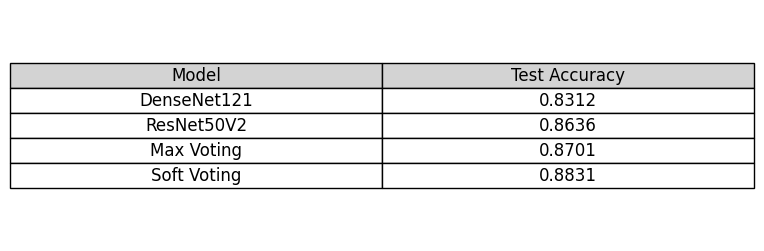

In [ ]:
import matplotlib.pyplot as plt

# Prepare the data
results_data = [
    ["DenseNet121", f"{densenet_test_acc:.4f}"],
    ["ResNet50V2", f"{resnet_test_acc:.4f}"],
    ["Max Voting", f"{max_voting_accuracy:.4f}"],
    ["Soft Voting", f"{soft_voting_accuracy:.4f}"]
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=results_data,
    colLabels=["Model", "Test Accuracy"],
    loc='center',
    cellLoc='center',
    colColours=["#d3d3d3", "#d3d3d3"]
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Save as an image
plt.savefig("/content/drive/MyDrive/ensemble_accuracy_table.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda

# Define the Lambda functions exactly as used in the model
def slice_alpha(x):
    return x[:, 0:1]

def slice_beta(x):
    return x[:, 1:2]

def weighted_mul(inputs):
    return inputs[0] * inputs[1]

custom_objects = {
    'slice_alpha': slice_alpha,
    'slice_beta': slice_beta,
    'weighted_mul': weighted_mul
}

# Load the .h5 attention model with custom objects
attention_model = load_model('/content/drive/MyDrive/singletest_attention_model.h5', custom_objects=custom_objects)

# Verify loaded model summary
attention_model.summary()


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ resnet_feat         │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet_feat       │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 3072)      │          0 │ resnet_feat[0][0… │
│ (Concatenate)       │                   │            │ densenet_feat[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │    196,672 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weights   │ (None, 2)         │        130 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 1)         │          0 │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 1)         │          0 │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_6 (Lambda)   │ (None, 2048)      │          0 │ resnet_feat[0][0… │
│                     │                   │            │ lambda_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_7 (Lambda)   │ (None, 1024)      │          0 │ densenet_feat[0]… │
│                     │                   │            │ lambda_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 3072)      │          0 │ lambda_6[0][0],   │
│ (Concatenate)       │                   │            │ lambda_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    786,688 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 11)        │      2,827 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 986,319 (3.76 MB)

 Trainable params: 986,317 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
attention_model.export('/content/drive/MyDrive/singletest_attention_model_tf')
print("✅ Model exported as TensorFlow SavedModel format successfully!")

Saved artifact at '/content/drive/MyDrive/singletest_attention_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 2048), dtype=tf.float32, name='resnet_feat'), TensorSpec(shape=(None, 1024), dtype=tf.float32, name='densenet_feat')]
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  136549471683024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136549471685904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136549471683600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136549471684752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136549471686672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136549471685520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136549471687824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136549471688208: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model exported as TensorFlow SavedModel format 

In [ ]:
attention_model.save('/content/drive/MyDrive/singletest_attention_model.keras')
print("✅ Model saved in Keras native format (.keras) successfully!")

✅ Model saved in Keras native format (.keras) successfully!
